In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [5]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

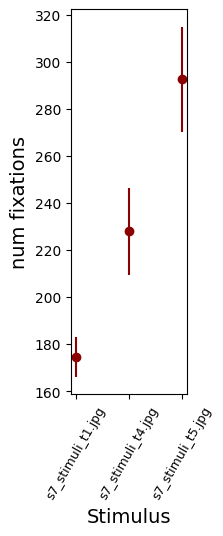

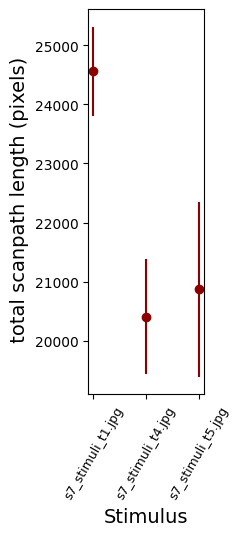

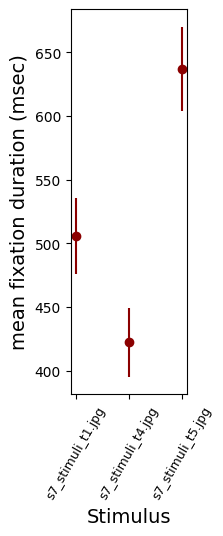

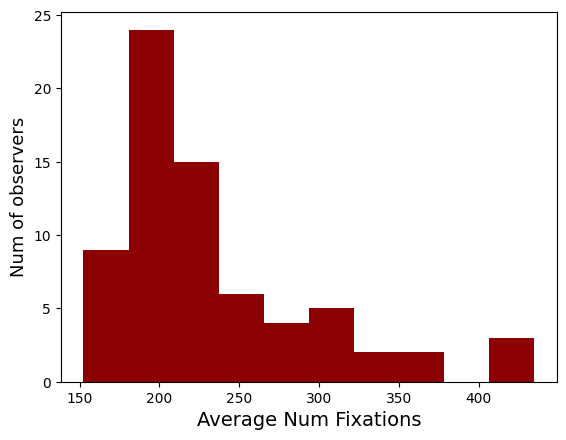

In [6]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1, duration=1)


In [7]:
_,WhichCN=DyslexiaDat.GetGroups('class_id')
WhichCN

Conditions [0 1]


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

---

## Feature extraction

In [8]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [9]:
def GlobalFeature(self, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in self.GetSaccades()[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features  

In [10]:
GlobalFeature_arrays = [GlobalFeature(DyslexiaDat, 0), 
                       GlobalFeature(DyslexiaDat, 1),
                       GlobalFeature(DyslexiaDat, 2)]

---

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Subjects\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def plot_attribution(results, feature_names, n_rois=100, n_local_ft=4, only_global=False):
    attributions = []
    errors = []

    for i in range(len(results)):
        input_tensor = results[i]['X_test']
        target_class = results[i]['y_test']

        att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
        attributions.append(att.squeeze().cpu().detach().numpy())
        errors.append(err.cpu().numpy())

    # Average across folds
    attributions = np.array(attributions)
    attributions = attributions.mean(axis=0)

    n_subjects = attributions.shape[0]

    if only_global:
        global_ = attributions[:, n_rois * n_local_ft : ]

        attribution_matrix = global_.T
    else:
        local  = attributions[:, : n_rois * n_local_ft]
        global_ = attributions[:, n_rois * n_local_ft : ]

        local = local.reshape(n_subjects, n_rois, n_local_ft)

        local_sum = local.sum(axis=1)

        attribution_matrix = np.concatenate([local_sum, global_], axis=1).T

    print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

    # Create visualizations
    print("\n" + "="*60)
    print("FEATURE ANALYSIS")
    print("="*60)

    # Box plot visualization
    visualize_attribution_boxplot(attribution_matrix, feature_names)

---

## TEST FOR STIMULUS 0

#### Test - ROI features

In [ ]:
def vectorize(SimAndFeatureVals, subjects):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 360))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(360, 180)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(180, 90)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(90, 45)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(45, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x) 
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
def run_test(stim, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []    
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False,Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False,  Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, test_subj)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [ ]:
_ = run_test(0)

Using device: cuda
Epoch 0 loss: 0.7256792187690735
Epoch 5 loss: 0.41409799456596375
Epoch 10 loss: 0.3224267363548279
Epoch 15 loss: 0.3161484897136688
Epoch 0 loss: 0.7717154622077942
Epoch 5 loss: 0.4670674502849579
Epoch 10 loss: 0.34466543793678284
Epoch 15 loss: 0.314069539308548
Epoch 0 loss: 0.7823765873908997
Epoch 5 loss: 0.47310909628868103
Epoch 10 loss: 0.3323478698730469
Epoch 15 loss: 0.31371572613716125
Epoch 0 loss: 0.6964259743690491
Epoch 5 loss: 0.44992679357528687
Epoch 10 loss: 0.3301924169063568
Epoch 15 loss: 0.315870076417923
Epoch 0 loss: 0.7105981707572937
Epoch 5 loss: 0.4678977429866791
Epoch 10 loss: 0.3450326919555664
Epoch 15 loss: 0.3194434642791748
Average accuracy: 0.8428571428571429
Standard deviation: 0.11428571428571427
Total confusion matrix:
[[29.  6.]
 [ 5. 30.]]
False positives: 6.0
False negatives: 5.0


In [ ]:
results = run_test(0, momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.7256792187690735
Epoch 5 loss: 0.4510905146598816
Epoch 10 loss: 0.3488277792930603
Epoch 15 loss: 0.3316023349761963
Epoch 0 loss: 0.7717154622077942
Epoch 5 loss: 0.5200030207633972
Epoch 10 loss: 0.3884606957435608
Epoch 15 loss: 0.3287031948566437
Epoch 0 loss: 0.7823765873908997
Epoch 5 loss: 0.5059342384338379
Epoch 10 loss: 0.35667183995246887
Epoch 15 loss: 0.3254952132701874
Epoch 0 loss: 0.6964259743690491
Epoch 5 loss: 0.498644083738327
Epoch 10 loss: 0.3690545856952667
Epoch 15 loss: 0.3424686789512634
Epoch 0 loss: 0.7105981707572937
Epoch 5 loss: 0.512027382850647
Epoch 10 loss: 0.40242907404899597
Epoch 15 loss: 0.3342113792896271
Average accuracy: 0.9
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[31.  4.]
 [ 3. 32.]]
False positives: 4.0
False negatives: 3.0


Approximation Error: -0.0002541056601330638 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


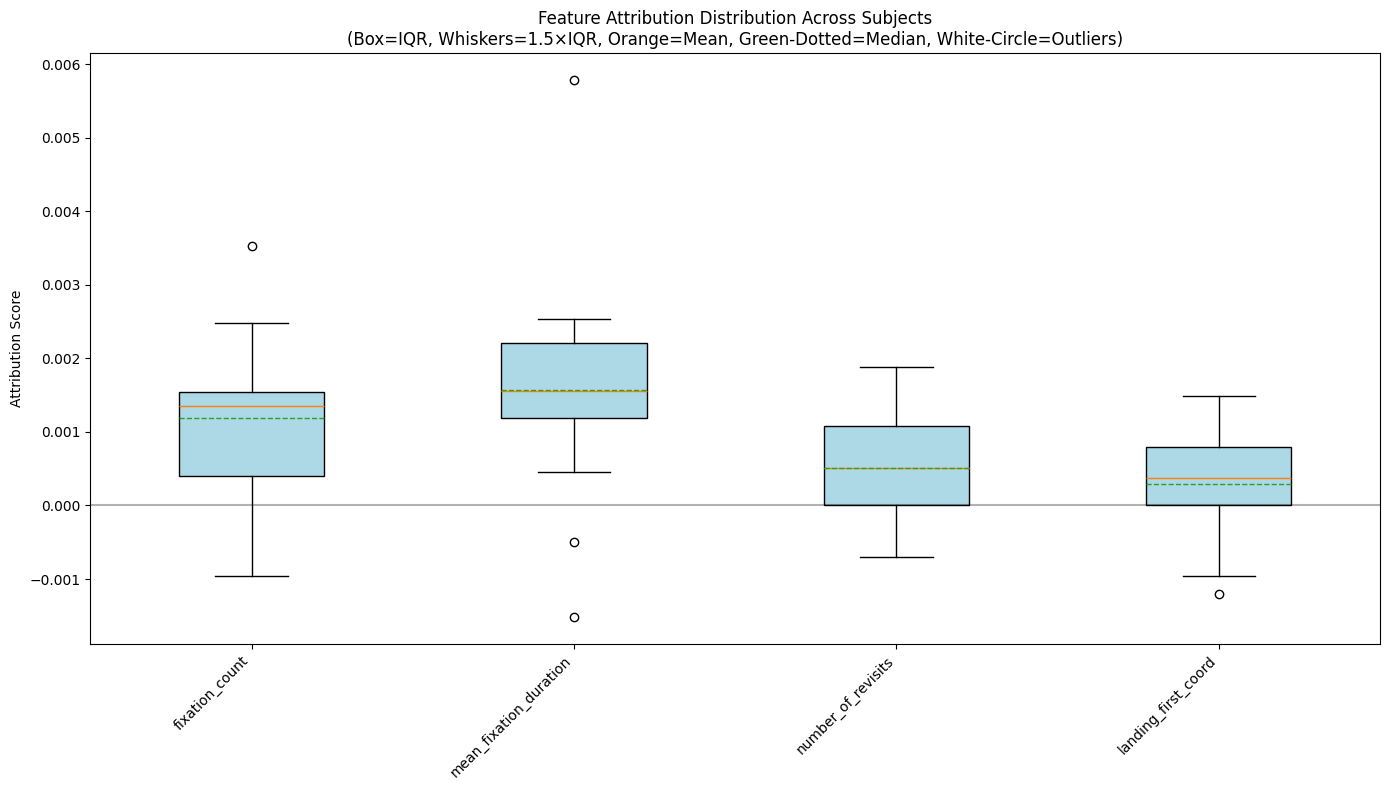


Feature Attribution Summary:
------------------------------------------------------------
fixation_count                : Mean= 0.0012, Std= 0.0010, Min=-0.0010, Max= 0.0035
mean_fixation_duration        : Mean= 0.0016, Std= 0.0016, Min=-0.0015, Max= 0.0058
number_of_revisits            : Mean= 0.0005, Std= 0.0008, Min=-0.0007, Max= 0.0019
landing_first_coord           : Mean= 0.0003, Std= 0.0008, Min=-0.0012, Max= 0.0015


In [ ]:
feature_names = [
    "fixation_count",
    "mean_fixation_duration",
    "number_of_revisits",
    "landing_first_coord",
]

attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)

n_subjects = attributions.shape[0]
n_rois      = 90 
n_local_ft  = 4          

local  = attributions[:, : n_rois * n_local_ft]          # (14, 360)
local = local.reshape(n_subjects, n_rois, n_local_ft)     # (14, 90, 4)

local_mean = local.mean(axis=1)    

attribution_matrix = local_mean.T 

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### First Test - Original Features

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 366))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['total_reading_duration']
        vector_roi[subj][364] = Features['regression']
        vector_roi[subj][365] = Features['progression/regression']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(366, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
def run_test(stim, glob_feature, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })
    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [ ]:
results = run_test(0, GlobalFeature_arrays[0])

Using device: cuda
Epoch 0 loss: 0.7440846562385559
Epoch 5 loss: 0.43323642015457153
Epoch 10 loss: 0.3286284804344177
Epoch 15 loss: 0.31584495306015015
Epoch 0 loss: 0.6790138483047485
Epoch 5 loss: 0.4464281499385834
Epoch 10 loss: 0.33163362741470337
Epoch 15 loss: 0.31470435857772827
Epoch 0 loss: 0.7055031657218933
Epoch 5 loss: 0.41111916303634644
Epoch 10 loss: 0.3202991783618927
Epoch 15 loss: 0.31480687856674194
Epoch 0 loss: 0.6756195425987244
Epoch 5 loss: 0.41592660546302795
Epoch 10 loss: 0.3392844796180725
Epoch 15 loss: 0.3318256735801697
Epoch 0 loss: 0.7574040293693542
Epoch 5 loss: 0.5152752995491028
Epoch 10 loss: 0.3480664789676666
Epoch 15 loss: 0.3168447017669678
Average accuracy: 0.8285714285714286
Standard deviation: 0.1324802642213672
Total confusion matrix:
[[27.  8.]
 [ 4. 31.]]
False positives: 8.0
False negatives: 4.0


In [ ]:
_ = run_test(0, GlobalFeature_arrays[0], momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.7440846562385559
Epoch 5 loss: 0.481346070766449
Epoch 10 loss: 0.362763375043869
Epoch 15 loss: 0.3415836691856384
Epoch 0 loss: 0.6790138483047485
Epoch 5 loss: 0.49252596497535706
Epoch 10 loss: 0.379662424325943
Epoch 15 loss: 0.33513641357421875
Epoch 0 loss: 0.7055031657218933
Epoch 5 loss: 0.45519575476646423
Epoch 10 loss: 0.3451521098613739
Epoch 15 loss: 0.3269476890563965
Epoch 0 loss: 0.6756195425987244
Epoch 5 loss: 0.4560665786266327
Epoch 10 loss: 0.37290939688682556
Epoch 15 loss: 0.3305041491985321
Epoch 0 loss: 0.7574040293693542
Epoch 5 loss: 0.5491456389427185
Epoch 10 loss: 0.38523489236831665
Epoch 15 loss: 0.34675332903862
Average accuracy: 0.8142857142857143
Standard deviation: 0.14708043058552855
Total confusion matrix:
[[28.  7.]
 [ 6. 29.]]
False positives: 7.0
False negatives: 6.0


Approximation Error: -0.00016006018267944455 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


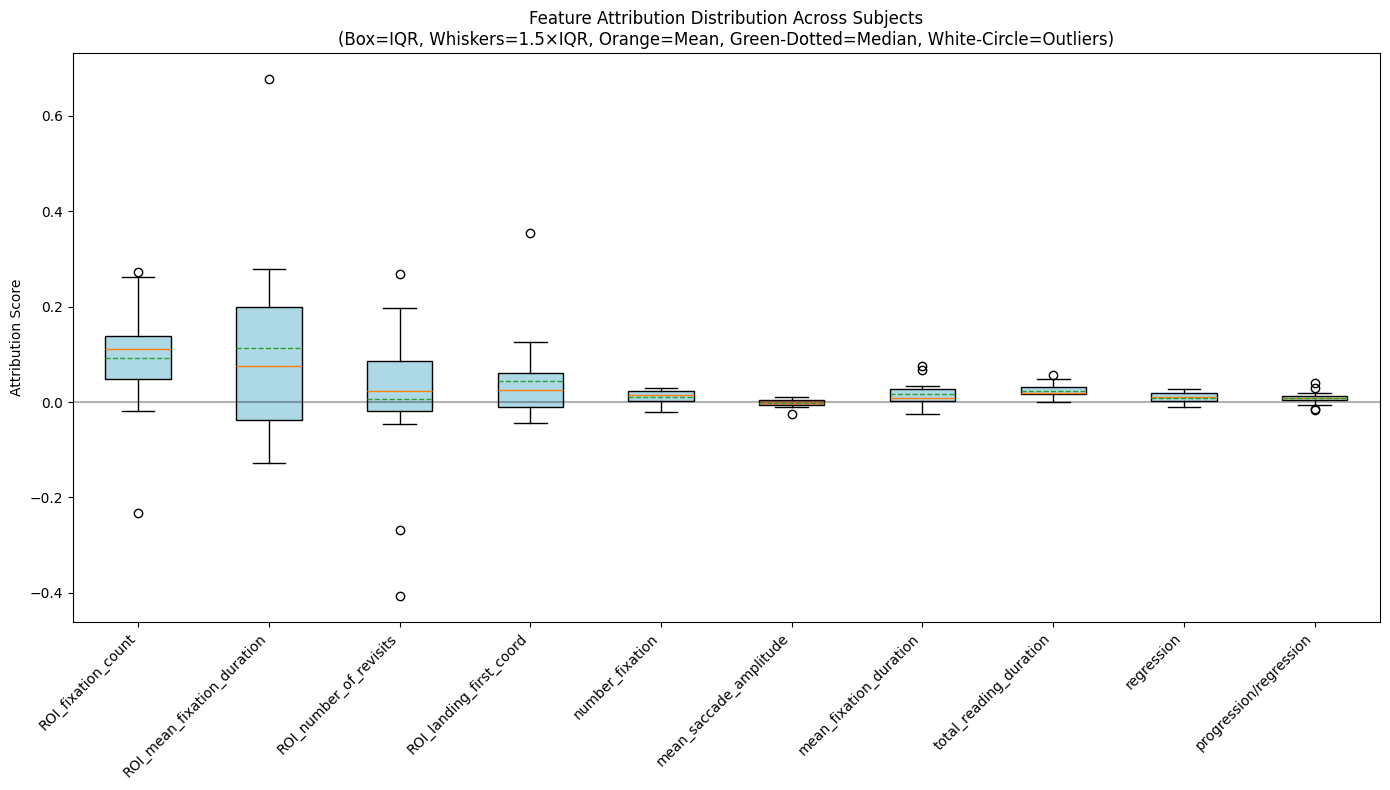


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0923, Std= 0.1212, Min=-0.2319, Max= 0.2734
ROI_mean_fixation_duration    : Mean= 0.1131, Std= 0.1979, Min=-0.1283, Max= 0.6775
ROI_number_of_revisits        : Mean= 0.0071, Std= 0.1649, Min=-0.4067, Max= 0.2683
ROI_landing_first_coord       : Mean= 0.0451, Std= 0.0973, Min=-0.0444, Max= 0.3553
number_fixation               : Mean= 0.0115, Std= 0.0141, Min=-0.0220, Max= 0.0285
mean_saccade_amplitude        : Mean=-0.0015, Std= 0.0090, Min=-0.0246, Max= 0.0113
mean_fixation_duration        : Mean= 0.0168, Std= 0.0267, Min=-0.0243, Max= 0.0765
total_reading_duration        : Mean= 0.0239, Std= 0.0156, Min=-0.0003, Max= 0.0571
regression                    : Mean= 0.0092, Std= 0.0120, Min=-0.0112, Max= 0.0268
progression/regression        : Mean= 0.0080, Std= 0.0149, Min=-0.0172, Max= 0.0407


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression"
]

plot_attribution(results, feature_names, n_rois=90, n_local_ft=4, only_global=False)

Approximation Error: -0.00016006018267944455 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


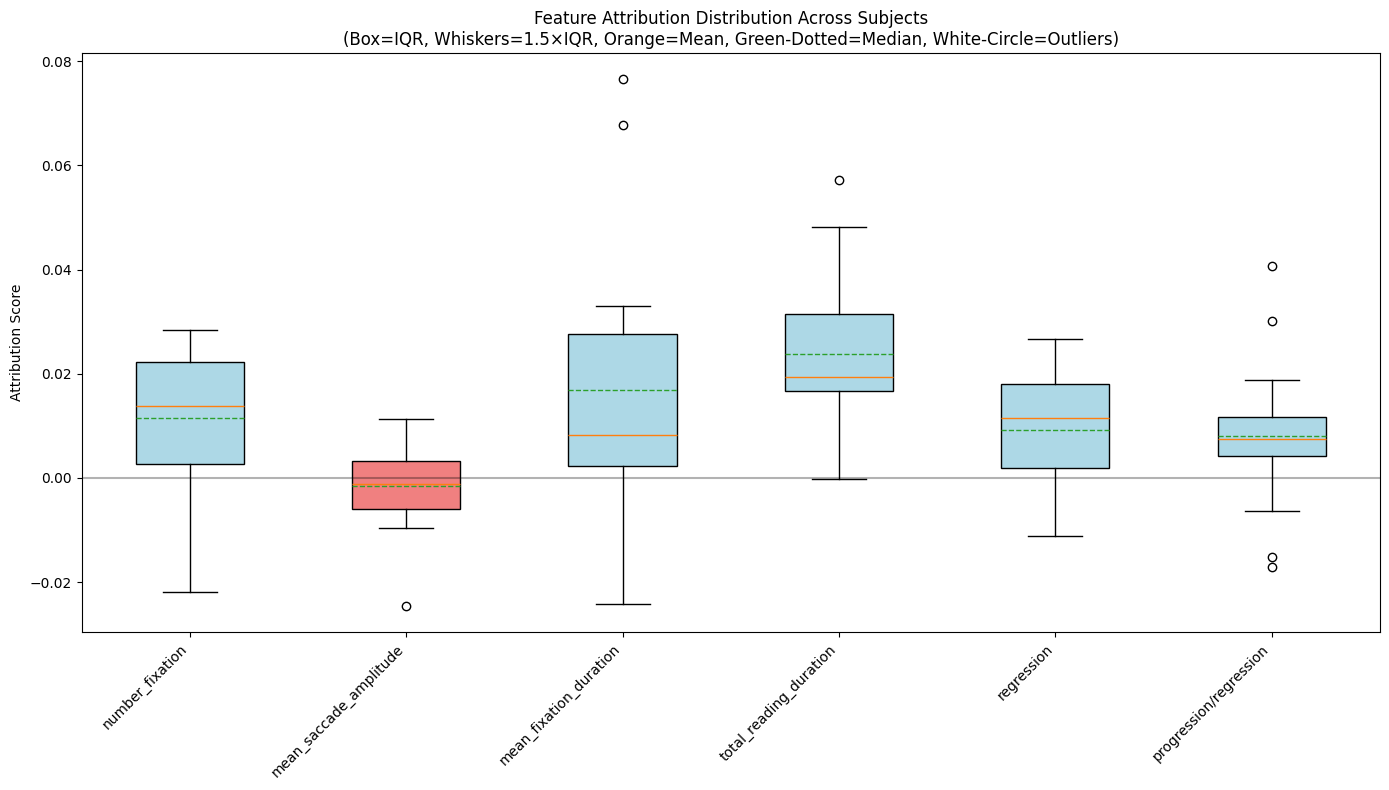


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0115, Std= 0.0141, Min=-0.0220, Max= 0.0285
mean_saccade_amplitude        : Mean=-0.0015, Std= 0.0090, Min=-0.0246, Max= 0.0113
mean_fixation_duration        : Mean= 0.0168, Std= 0.0267, Min=-0.0243, Max= 0.0765
total_reading_duration        : Mean= 0.0239, Std= 0.0156, Min=-0.0003, Max= 0.0571
regression                    : Mean= 0.0092, Std= 0.0120, Min=-0.0112, Max= 0.0268
progression/regression        : Mean= 0.0080, Std= 0.0149, Min=-0.0172, Max= 0.0407


In [ ]:
plot_attribution(results, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 365))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_fixation_duration']
        vector_roi[subj][362] = Features['total_reading_duration']
        vector_roi[subj][363] = Features['regression']
        vector_roi[subj][364] = Features['progression/regression']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(365, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
_ = run_test(0, GlobalFeature_arrays[0])
results = run_test(0, GlobalFeature_arrays[0], momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.7195414304733276
Epoch 5 loss: 0.40334653854370117
Epoch 10 loss: 0.33414721488952637
Epoch 15 loss: 0.31425073742866516
Epoch 0 loss: 0.6944730877876282
Epoch 5 loss: 0.4990585446357727
Epoch 10 loss: 0.339825302362442
Epoch 15 loss: 0.32428961992263794
Epoch 0 loss: 0.6830037236213684
Epoch 5 loss: 0.41531863808631897
Epoch 10 loss: 0.3209710121154785
Epoch 15 loss: 0.3141065239906311
Epoch 0 loss: 0.711534321308136
Epoch 5 loss: 0.44489744305610657
Epoch 10 loss: 0.32442575693130493
Epoch 15 loss: 0.3149207532405853
Epoch 0 loss: 0.7445463538169861
Epoch 5 loss: 0.40532657504081726
Epoch 10 loss: 0.3292287290096283
Epoch 15 loss: 0.32881492376327515
Average accuracy: 0.8857142857142858
Standard deviation: 0.09689042833036098
Total confusion matrix:
[[31.  4.]
 [ 4. 31.]]
False positives: 4.0
False negatives: 4.0
Using device: cuda
Epoch 0 loss: 0.7195414304733276
Epoch 5 loss: 0.44439810514450073
Epoch 10 loss: 0.35843273997306824
Epoch 15 loss: 0.

Approximation Error: 0.00018395078950561583 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


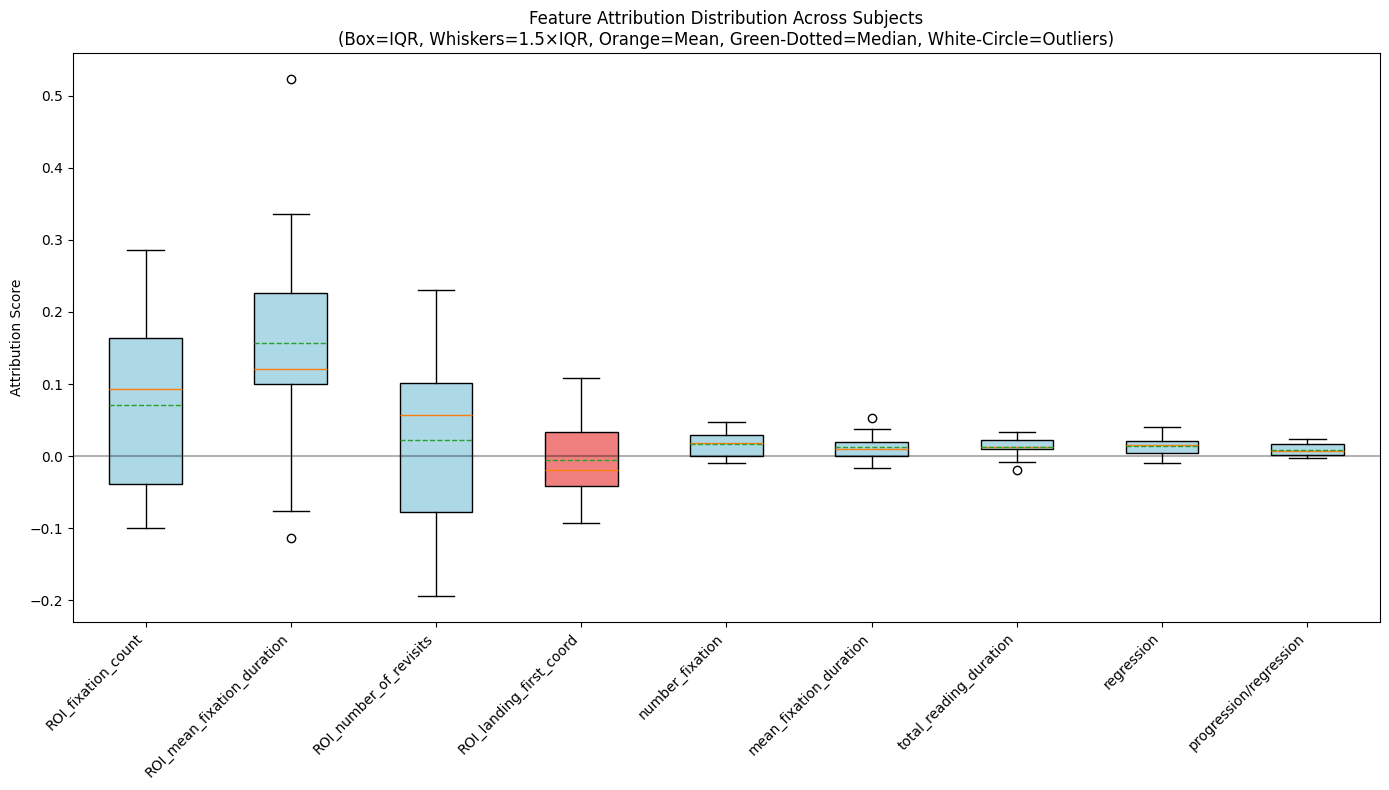


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0712, Std= 0.1136, Min=-0.1001, Max= 0.2864
ROI_mean_fixation_duration    : Mean= 0.1570, Std= 0.1547, Min=-0.1134, Max= 0.5235
ROI_number_of_revisits        : Mean= 0.0220, Std= 0.1200, Min=-0.1942, Max= 0.2311
ROI_landing_first_coord       : Mean=-0.0057, Std= 0.0568, Min=-0.0933, Max= 0.1087
number_fixation               : Mean= 0.0163, Std= 0.0166, Min=-0.0100, Max= 0.0470
mean_fixation_duration        : Mean= 0.0125, Std= 0.0180, Min=-0.0159, Max= 0.0526
total_reading_duration        : Mean= 0.0128, Std= 0.0142, Min=-0.0193, Max= 0.0331
regression                    : Mean= 0.0135, Std= 0.0133, Min=-0.0092, Max= 0.0401
progression/regression        : Mean= 0.0089, Std= 0.0086, Min=-0.0030, Max= 0.0236


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression"
]

plot_attribution(results, feature_names, n_rois=90, n_local_ft=4, only_global=False)

Approximation Error: 0.00018395078950561583 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


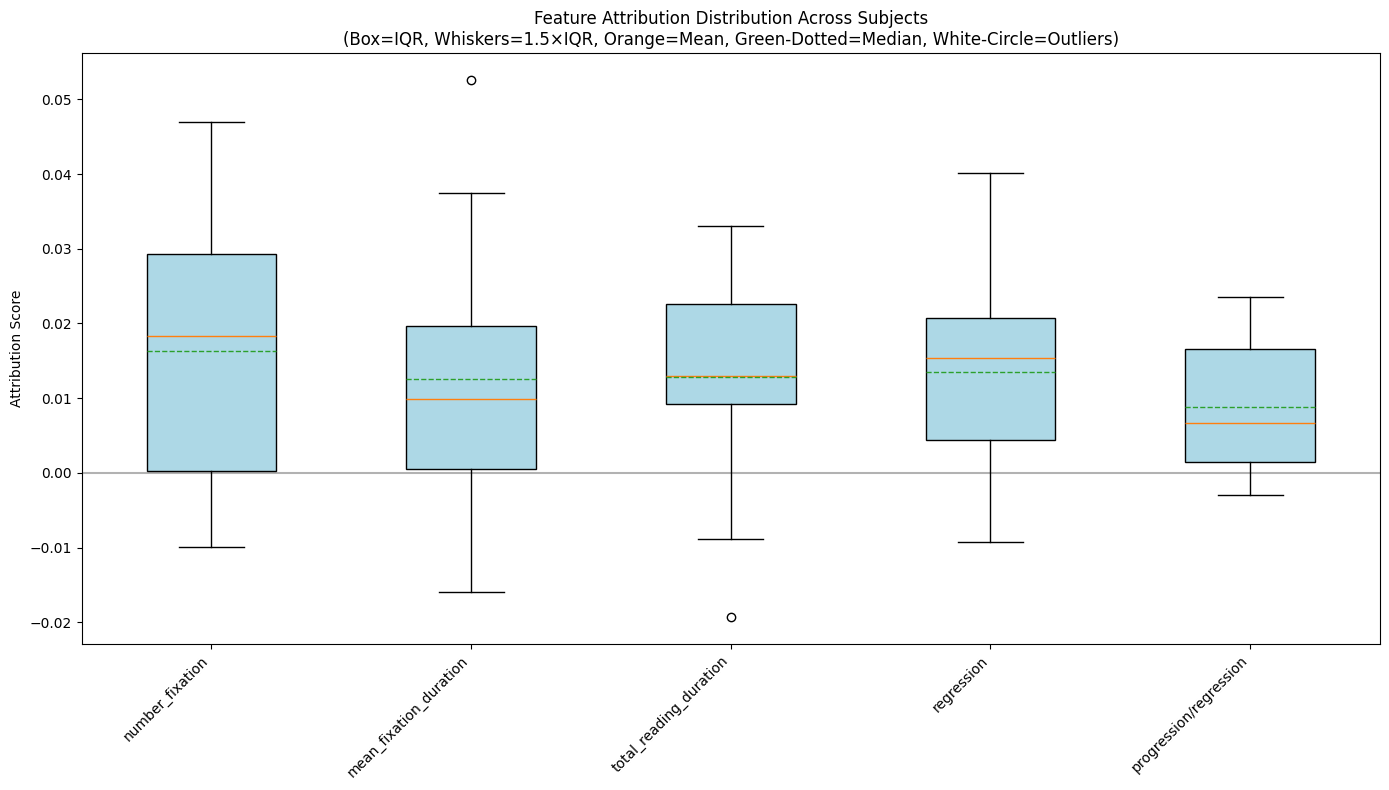


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0163, Std= 0.0166, Min=-0.0100, Max= 0.0470
mean_fixation_duration        : Mean= 0.0125, Std= 0.0180, Min=-0.0159, Max= 0.0526
total_reading_duration        : Mean= 0.0128, Std= 0.0142, Min=-0.0193, Max= 0.0331
regression                    : Mean= 0.0135, Std= 0.0133, Min=-0.0092, Max= 0.0401
progression/regression        : Mean= 0.0089, Std= 0.0086, Min=-0.0030, Max= 0.0236


In [ ]:
plot_attribution(results, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

#### Second Test - Original and Additional Features

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 369))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['std_saccade_amplitude']
        vector_roi[subj][363] = Features['mean_fixation_duration']
        vector_roi[subj][364] = Features['std_fixation_duration']
        vector_roi[subj][365] = Features['total_reading_duration']
        vector_roi[subj][366] = Features['regression']
        vector_roi[subj][367] = Features['progression/regression']
        vector_roi[subj][368] = Features['fixation_entropy']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(369, 185)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(185, 93)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(93, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
results = run_test(0, GlobalFeature_arrays[0])

Using device: cuda
Epoch 0 loss: 0.7168903350830078
Epoch 5 loss: 0.4560030400753021
Epoch 10 loss: 0.33503463864326477
Epoch 15 loss: 0.3207111954689026
Epoch 0 loss: 0.7363992929458618
Epoch 5 loss: 0.4391687214374542
Epoch 10 loss: 0.32699981331825256
Epoch 15 loss: 0.31399425864219666
Epoch 0 loss: 0.7211319208145142
Epoch 5 loss: 0.43141254782676697
Epoch 10 loss: 0.3242725729942322
Epoch 15 loss: 0.31528332829475403
Epoch 0 loss: 0.6843170523643494
Epoch 5 loss: 0.442554235458374
Epoch 10 loss: 0.31955862045288086
Epoch 15 loss: 0.3177971839904785
Epoch 0 loss: 0.6879178285598755
Epoch 5 loss: 0.47275176644325256
Epoch 10 loss: 0.34189659357070923
Epoch 15 loss: 0.31725555658340454
Average accuracy: 0.8857142857142858
Standard deviation: 0.05714285714285717
Total confusion matrix:
[[31.  4.]
 [ 4. 31.]]
False positives: 4.0
False negatives: 4.0


In [ ]:
_ = run_test(0, GlobalFeature_arrays[0], momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.7168903350830078
Epoch 5 loss: 0.4909265339374542
Epoch 10 loss: 0.37125447392463684
Epoch 15 loss: 0.34341979026794434
Epoch 0 loss: 0.7363992929458618
Epoch 5 loss: 0.4846995770931244
Epoch 10 loss: 0.37076419591903687
Epoch 15 loss: 0.32700470089912415
Epoch 0 loss: 0.7211319208145142
Epoch 5 loss: 0.47245174646377563
Epoch 10 loss: 0.3616420328617096
Epoch 15 loss: 0.3381834030151367
Epoch 0 loss: 0.6843170523643494
Epoch 5 loss: 0.49033525586128235
Epoch 10 loss: 0.35976019501686096
Epoch 15 loss: 0.3421250879764557
Epoch 0 loss: 0.6879178285598755
Epoch 5 loss: 0.5216353535652161
Epoch 10 loss: 0.39509740471839905
Epoch 15 loss: 0.35152190923690796
Average accuracy: 0.8714285714285713
Standard deviation: 0.06998542122237654
Total confusion matrix:
[[32.  3.]
 [ 6. 29.]]
False positives: 3.0
False negatives: 6.0


Approximation Error: -0.00046871814993210137 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


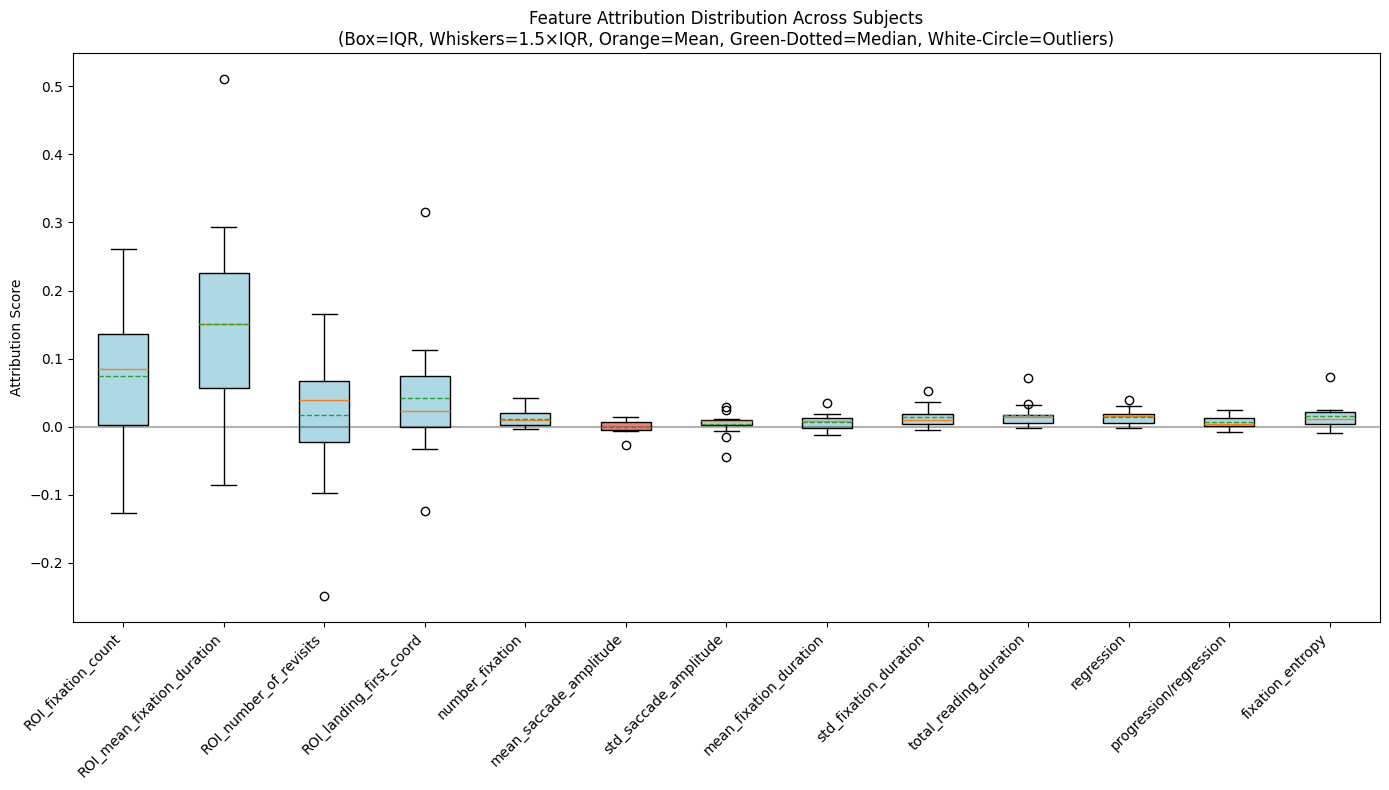


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0752, Std= 0.1056, Min=-0.1270, Max= 0.2610
ROI_mean_fixation_duration    : Mean= 0.1513, Std= 0.1473, Min=-0.0850, Max= 0.5107
ROI_number_of_revisits        : Mean= 0.0166, Std= 0.1010, Min=-0.2486, Max= 0.1651
ROI_landing_first_coord       : Mean= 0.0422, Std= 0.0947, Min=-0.1243, Max= 0.3160
number_fixation               : Mean= 0.0120, Std= 0.0123, Min=-0.0040, Max= 0.0423
mean_saccade_amplitude        : Mean=-0.0003, Std= 0.0100, Min=-0.0264, Max= 0.0138
std_saccade_amplitude         : Mean= 0.0037, Std= 0.0171, Min=-0.0451, Max= 0.0289
mean_fixation_duration        : Mean= 0.0073, Std= 0.0114, Min=-0.0119, Max= 0.0355
std_fixation_duration         : Mean= 0.0146, Std= 0.0154, Min=-0.0055, Max= 0.0517
total_reading_duration        : Mean= 0.0175, Std= 0.0183, Min=-0.0017, Max= 0.0722
regression                    : Mean= 0.0148, Std= 0.0110, Min=-0.002

In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy"
]

plot_attribution(results, feature_names, n_rois=90, n_local_ft=4, only_global=False)

Approximation Error: -0.00046871814993210137 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


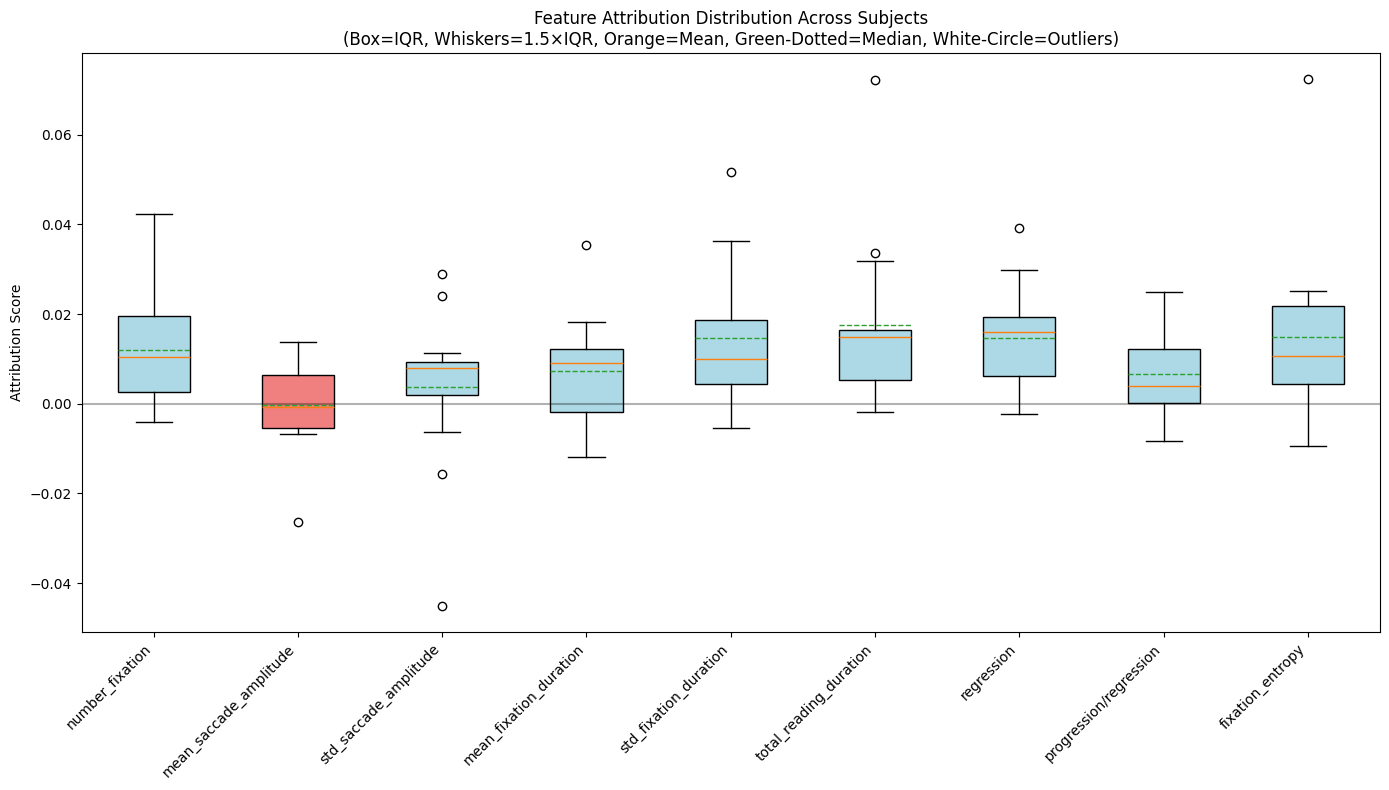


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0120, Std= 0.0123, Min=-0.0040, Max= 0.0423
mean_saccade_amplitude        : Mean=-0.0003, Std= 0.0100, Min=-0.0264, Max= 0.0138
std_saccade_amplitude         : Mean= 0.0037, Std= 0.0171, Min=-0.0451, Max= 0.0289
mean_fixation_duration        : Mean= 0.0073, Std= 0.0114, Min=-0.0119, Max= 0.0355
std_fixation_duration         : Mean= 0.0146, Std= 0.0154, Min=-0.0055, Max= 0.0517
total_reading_duration        : Mean= 0.0175, Std= 0.0183, Min=-0.0017, Max= 0.0722
regression                    : Mean= 0.0148, Std= 0.0110, Min=-0.0024, Max= 0.0393
progression/regression        : Mean= 0.0066, Std= 0.0092, Min=-0.0084, Max= 0.0250
fixation_entropy              : Mean= 0.0150, Std= 0.0187, Min=-0.0095, Max= 0.0724


In [ ]:
plot_attribution(results, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

#### Third Test - Original Features + Similarity Measure (Average)

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 368))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['total_reading_duration']
        vector_roi[subj][364] = Features['regression']
        vector_roi[subj][365] = Features['progression/regression']
        vector_roi[subj][366] = SimsVals[subj][0][0][0]
        vector_roi[subj][367] = SimsVals[subj][0][0][1]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(368, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
def run_test(stim, method, glob_feature, thr=0, match=False, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)

    results = []    
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, method=method,Thr=thr, match=match, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, method=method, Thr=thr, match=match, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.71662437915802
Epoch 5 loss: 0.46967288851737976
Epoch 10 loss: 0.3425831198692322
Epoch 15 loss: 0.31459763646125793
Epoch 0 loss: 0.7006482481956482
Epoch 5 loss: 0.41662970185279846
Epoch 10 loss: 0.3379998207092285
Epoch 15 loss: 0.31842756271362305
Epoch 0 loss: 0.7649812698364258
Epoch 5 loss: 0.38233187794685364
Epoch 10 loss: 0.3159042298793793
Epoch 15 loss: 0.3177749216556549
Epoch 0 loss: 0.7602903246879578
Epoch 5 loss: 0.413361132144928
Epoch 10 loss: 0.34364965558052063
Epoch 15 loss: 0.33555731177330017
Epoch 0 loss: 0.7289974093437195
Epoch 5 loss: 0.45443907380104065
Epoch 10 loss: 0.34972837567329407
Epoch 15 loss: 0.3170781433582306
Average accuracy: 0.8714285714285716
Standard deviation: 0.13093073414159542
Total confusion matrix:
[[30.  5.]
 [ 4. 31.]]
False positives: 5.0
False negatives: 4.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7166980504989

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
r1=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
r2=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
r3=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
r4=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.71662437915802
Epoch 5 loss: 0.5180566906929016
Epoch 10 loss: 0.3982682228088379
Epoch 15 loss: 0.3308558762073517
Epoch 0 loss: 0.7006482481956482
Epoch 5 loss: 0.4519488513469696
Epoch 10 loss: 0.3883264362812042
Epoch 15 loss: 0.3410319685935974
Epoch 0 loss: 0.7649812698364258
Epoch 5 loss: 0.416496604681015
Epoch 10 loss: 0.33879390358924866
Epoch 15 loss: 0.333172470331192
Epoch 0 loss: 0.7602903246879578
Epoch 5 loss: 0.4543803036212921
Epoch 10 loss: 0.3757994472980499
Epoch 15 loss: 0.3415549695491791
Epoch 0 loss: 0.7289974093437195
Epoch 5 loss: 0.49630117416381836
Epoch 10 loss: 0.42135360836982727
Epoch 15 loss: 0.34592145681381226
Average accuracy: 0.8714285714285716
Standard deviation: 0.1228903609577518
Total confusion matrix:
[[29.  6.]
 [ 3. 32.]]
False positives: 6.0
False negatives: 3.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7166980504989624
Epo

Approximation Error: -0.00026925280690193176 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


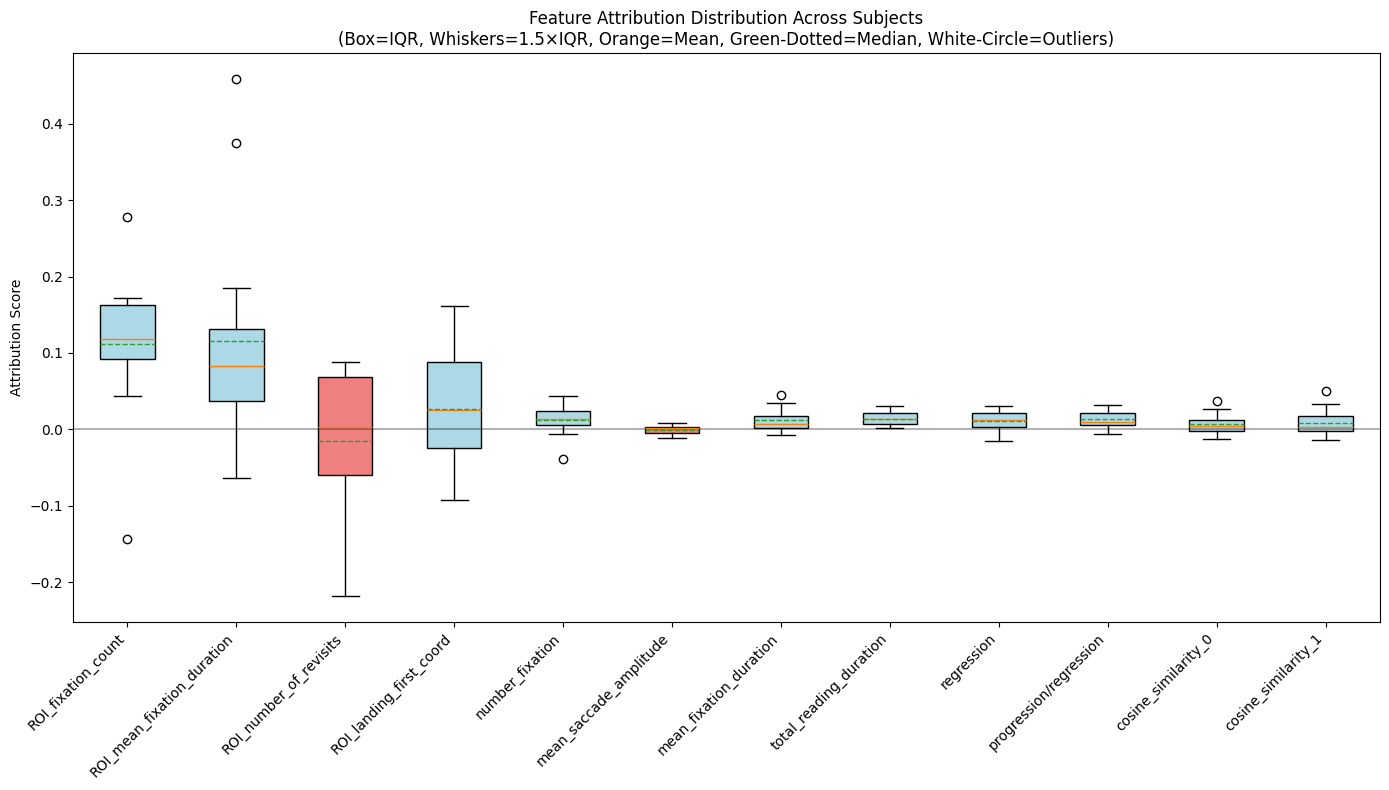


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.1118, Std= 0.0900, Min=-0.1441, Max= 0.2778
ROI_mean_fixation_duration    : Mean= 0.1158, Std= 0.1376, Min=-0.0640, Max= 0.4589
ROI_number_of_revisits        : Mean=-0.0152, Std= 0.0956, Min=-0.2182, Max= 0.0888
ROI_landing_first_coord       : Mean= 0.0273, Std= 0.0751, Min=-0.0929, Max= 0.1619
number_fixation               : Mean= 0.0121, Std= 0.0199, Min=-0.0392, Max= 0.0443
mean_saccade_amplitude        : Mean=-0.0005, Std= 0.0063, Min=-0.0119, Max= 0.0088
mean_fixation_duration        : Mean= 0.0119, Std= 0.0141, Min=-0.0075, Max= 0.0446
total_reading_duration        : Mean= 0.0141, Std= 0.0087, Min= 0.0019, Max= 0.0308
regression                    : Mean= 0.0114, Std= 0.0126, Min=-0.0147, Max= 0.0305
progression/regression        : Mean= 0.0129, Std= 0.0103, Min=-0.0056, Max= 0.0316
cosine_similarity_0           : Mean= 0.0064, Std= 0.0134, Min=-0.013

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


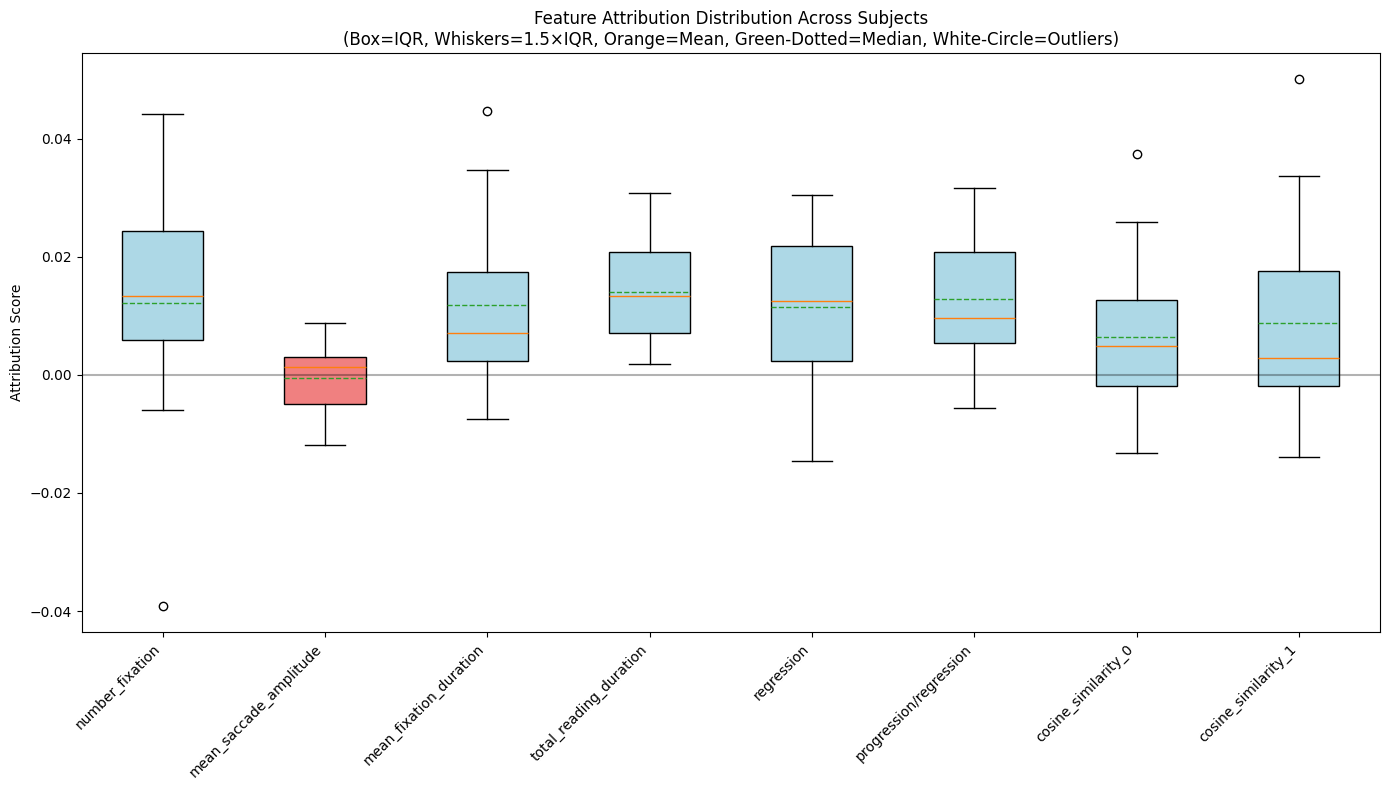


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0121, Std= 0.0199, Min=-0.0392, Max= 0.0443
mean_saccade_amplitude        : Mean=-0.0005, Std= 0.0063, Min=-0.0119, Max= 0.0088
mean_fixation_duration        : Mean= 0.0119, Std= 0.0141, Min=-0.0075, Max= 0.0446
total_reading_duration        : Mean= 0.0141, Std= 0.0087, Min= 0.0019, Max= 0.0308
regression                    : Mean= 0.0114, Std= 0.0126, Min=-0.0147, Max= 0.0305
progression/regression        : Mean= 0.0129, Std= 0.0103, Min=-0.0056, Max= 0.0316
cosine_similarity_0           : Mean= 0.0064, Std= 0.0134, Min=-0.0133, Max= 0.0375
cosine_similarity_1           : Mean= 0.0088, Std= 0.0169, Min=-0.0138, Max= 0.0500


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "cosine_similarity_0",
    "cosine_similarity_1"
]
plot_attribution(r1, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r1, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -9.445505565963686e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


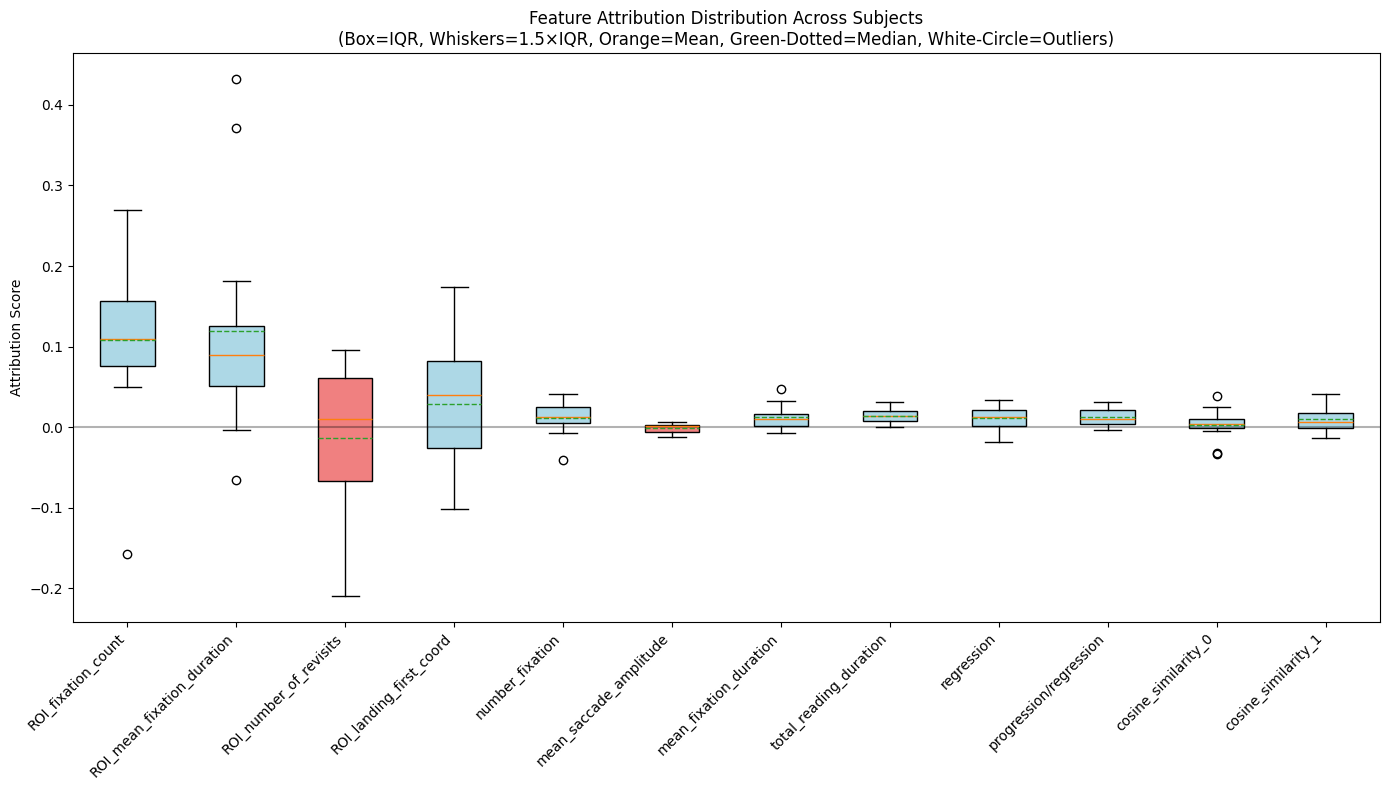


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.1079, Std= 0.0926, Min=-0.1574, Max= 0.2700
ROI_mean_fixation_duration    : Mean= 0.1189, Std= 0.1290, Min=-0.0658, Max= 0.4322
ROI_number_of_revisits        : Mean=-0.0135, Std= 0.0944, Min=-0.2096, Max= 0.0959
ROI_landing_first_coord       : Mean= 0.0289, Std= 0.0815, Min=-0.1022, Max= 0.1737
number_fixation               : Mean= 0.0119, Std= 0.0202, Min=-0.0414, Max= 0.0415
mean_saccade_amplitude        : Mean=-0.0012, Std= 0.0064, Min=-0.0128, Max= 0.0068
mean_fixation_duration        : Mean= 0.0123, Std= 0.0144, Min=-0.0071, Max= 0.0474
total_reading_duration        : Mean= 0.0141, Std= 0.0088, Min= 0.0006, Max= 0.0308
regression                    : Mean= 0.0117, Std= 0.0133, Min=-0.0180, Max= 0.0332
progression/regression        : Mean= 0.0126, Std= 0.0104, Min=-0.0042, Max= 0.0307
cosine_similarity_0           : Mean= 0.0031, Std= 0.0186, Min=-0.032

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


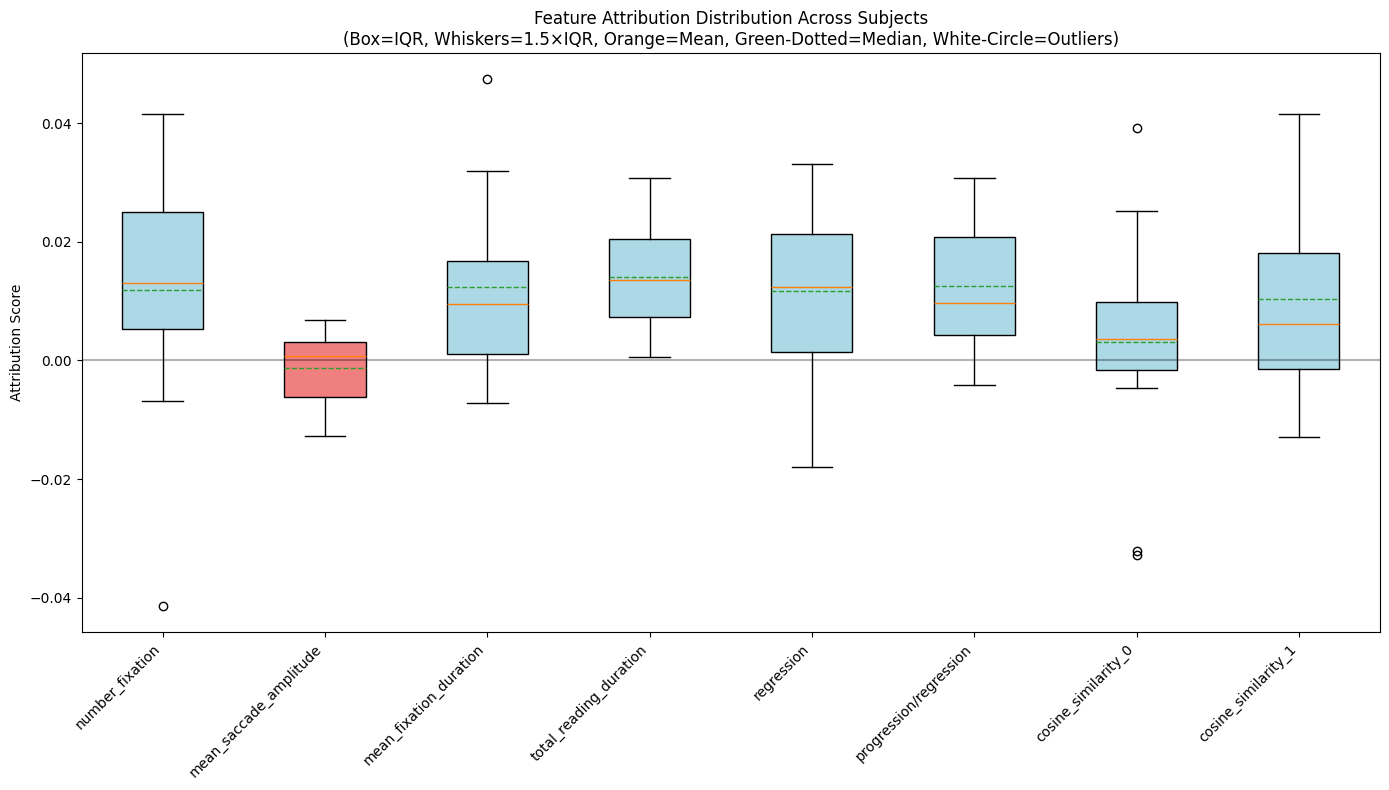


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0119, Std= 0.0202, Min=-0.0414, Max= 0.0415
mean_saccade_amplitude        : Mean=-0.0012, Std= 0.0064, Min=-0.0128, Max= 0.0068
mean_fixation_duration        : Mean= 0.0123, Std= 0.0144, Min=-0.0071, Max= 0.0474
total_reading_duration        : Mean= 0.0141, Std= 0.0088, Min= 0.0006, Max= 0.0308
regression                    : Mean= 0.0117, Std= 0.0133, Min=-0.0180, Max= 0.0332
progression/regression        : Mean= 0.0126, Std= 0.0104, Min=-0.0042, Max= 0.0307
cosine_similarity_0           : Mean= 0.0031, Std= 0.0186, Min=-0.0329, Max= 0.0392
cosine_similarity_1           : Mean= 0.0104, Std= 0.0166, Min=-0.0130, Max= 0.0416


In [ ]:
plot_attribution(r2, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r2, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -0.00013037706958130002 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


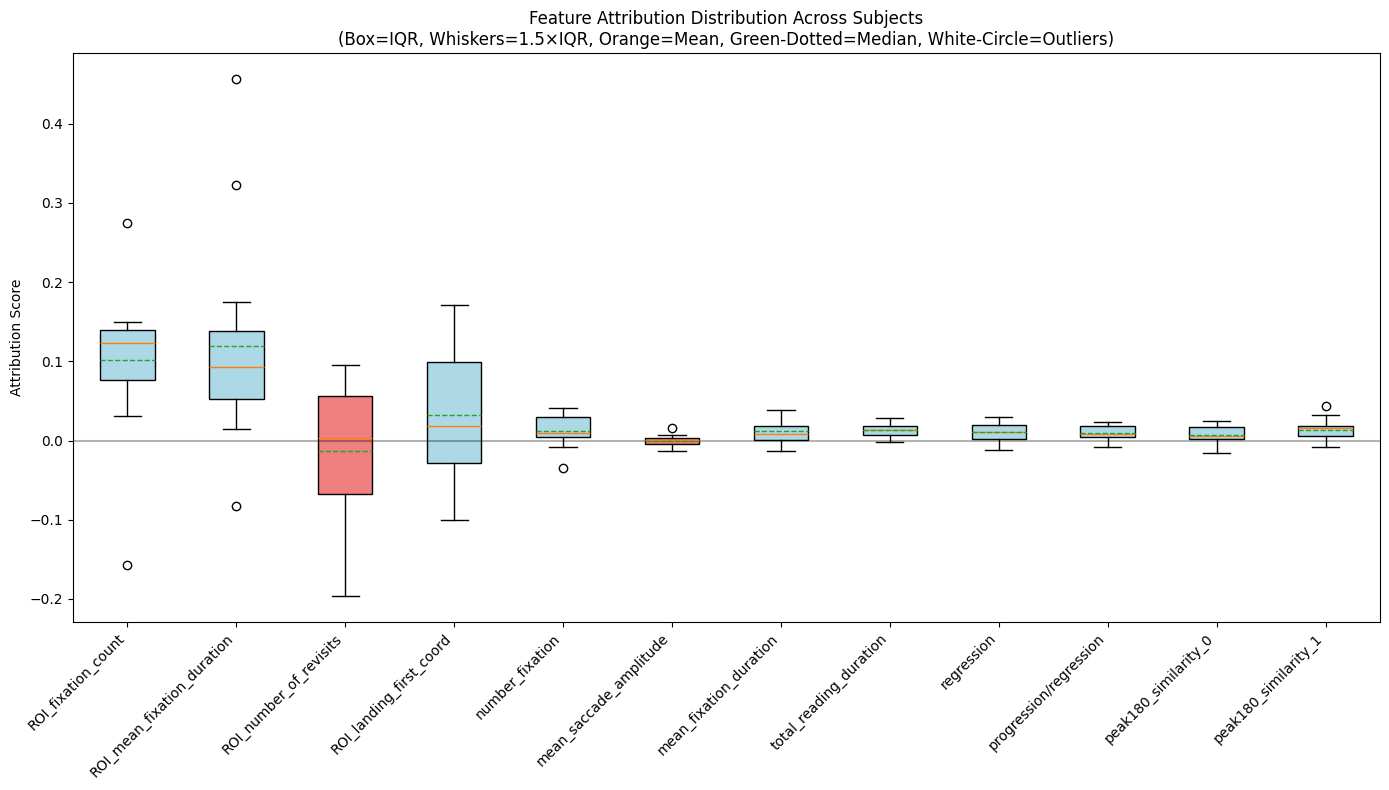


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.1012, Std= 0.0903, Min=-0.1572, Max= 0.2743
ROI_mean_fixation_duration    : Mean= 0.1195, Std= 0.1277, Min=-0.0833, Max= 0.4564
ROI_number_of_revisits        : Mean=-0.0132, Std= 0.0918, Min=-0.1962, Max= 0.0950
ROI_landing_first_coord       : Mean= 0.0326, Std= 0.0779, Min=-0.1001, Max= 0.1707
number_fixation               : Mean= 0.0122, Std= 0.0199, Min=-0.0346, Max= 0.0406
mean_saccade_amplitude        : Mean=-0.0002, Std= 0.0075, Min=-0.0129, Max= 0.0159
mean_fixation_duration        : Mean= 0.0115, Std= 0.0143, Min=-0.0134, Max= 0.0384
total_reading_duration        : Mean= 0.0128, Std= 0.0085, Min=-0.0023, Max= 0.0283
regression                    : Mean= 0.0108, Std= 0.0120, Min=-0.0126, Max= 0.0294
progression/regression        : Mean= 0.0096, Std= 0.0086, Min=-0.0078, Max= 0.0228
peak180_similarity_0          : Mean= 0.0070, Std= 0.0112, Min=-0.016

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


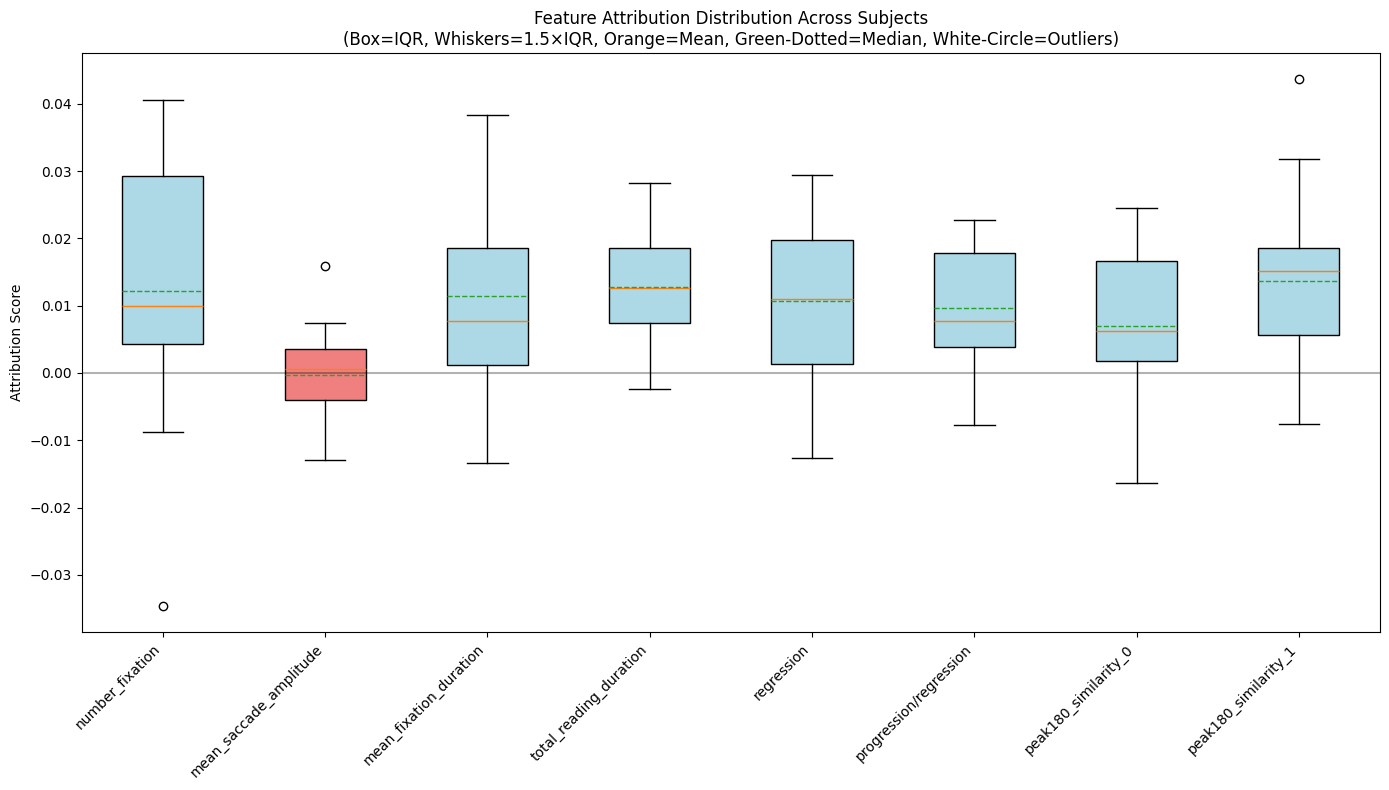


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0122, Std= 0.0199, Min=-0.0346, Max= 0.0406
mean_saccade_amplitude        : Mean=-0.0002, Std= 0.0075, Min=-0.0129, Max= 0.0159
mean_fixation_duration        : Mean= 0.0115, Std= 0.0143, Min=-0.0134, Max= 0.0384
total_reading_duration        : Mean= 0.0128, Std= 0.0085, Min=-0.0023, Max= 0.0283
regression                    : Mean= 0.0108, Std= 0.0120, Min=-0.0126, Max= 0.0294
progression/regression        : Mean= 0.0096, Std= 0.0086, Min=-0.0078, Max= 0.0228
peak180_similarity_0          : Mean= 0.0070, Std= 0.0112, Min=-0.0164, Max= 0.0246
peak180_similarity_1          : Mean= 0.0137, Std= 0.0131, Min=-0.0076, Max= 0.0436


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "peak180_similarity_0",
    "peak180_similarity_1"
]
plot_attribution(r3, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r3, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -0.00023380496713798493 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


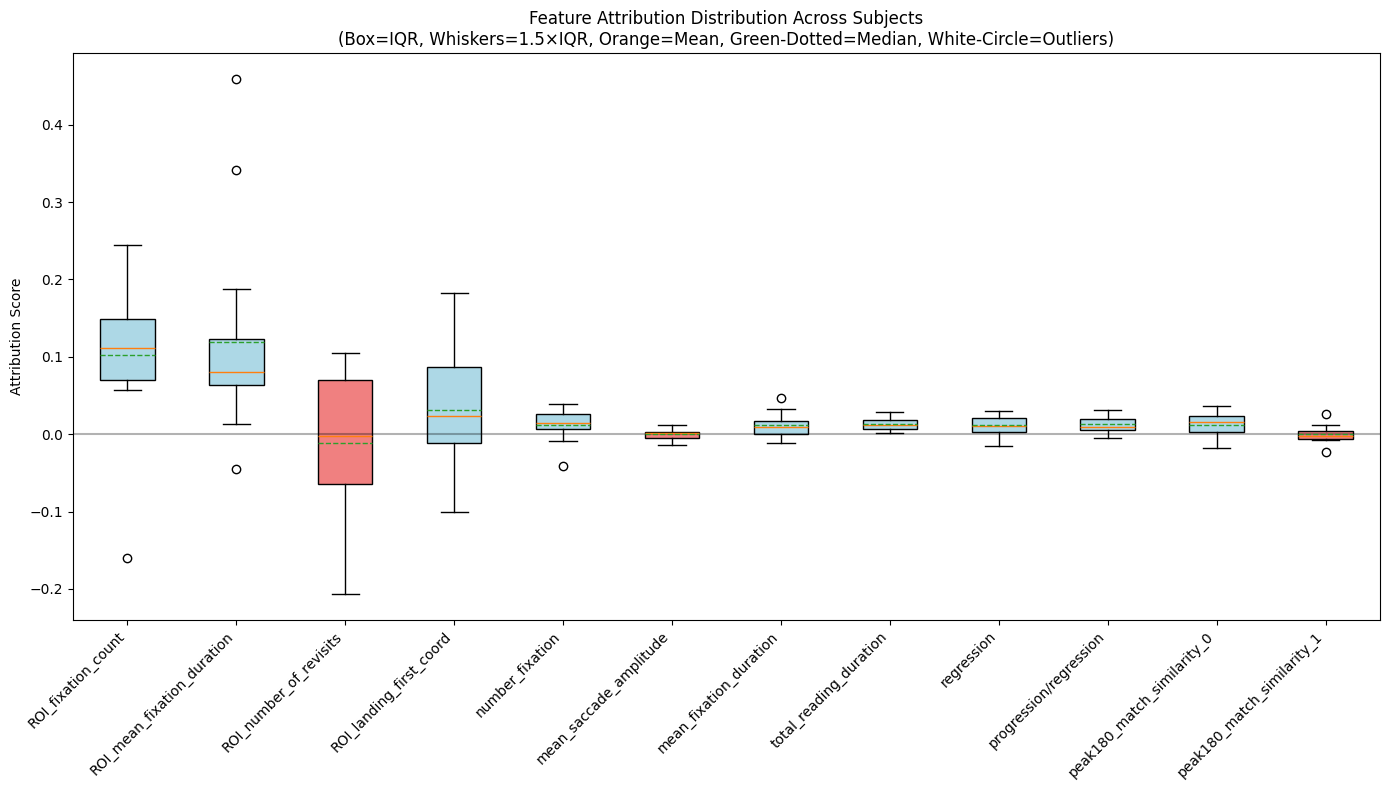


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.1023, Std= 0.0887, Min=-0.1601, Max= 0.2448
ROI_mean_fixation_duration    : Mean= 0.1194, Std= 0.1284, Min=-0.0455, Max= 0.4592
ROI_number_of_revisits        : Mean=-0.0109, Std= 0.0919, Min=-0.2065, Max= 0.1047
ROI_landing_first_coord       : Mean= 0.0306, Std= 0.0794, Min=-0.1006, Max= 0.1819
number_fixation               : Mean= 0.0118, Std= 0.0198, Min=-0.0411, Max= 0.0388
mean_saccade_amplitude        : Mean=-0.0002, Std= 0.0062, Min=-0.0142, Max= 0.0122
mean_fixation_duration        : Mean= 0.0121, Std= 0.0151, Min=-0.0118, Max= 0.0465
total_reading_duration        : Mean= 0.0132, Std= 0.0087, Min= 0.0018, Max= 0.0286
regression                    : Mean= 0.0113, Std= 0.0122, Min=-0.0157, Max= 0.0296
progression/regression        : Mean= 0.0126, Std= 0.0102, Min=-0.0047, Max= 0.0317
peak180_match_similarity_0    : Mean= 0.0118, Std= 0.0156, Min=-0.017

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


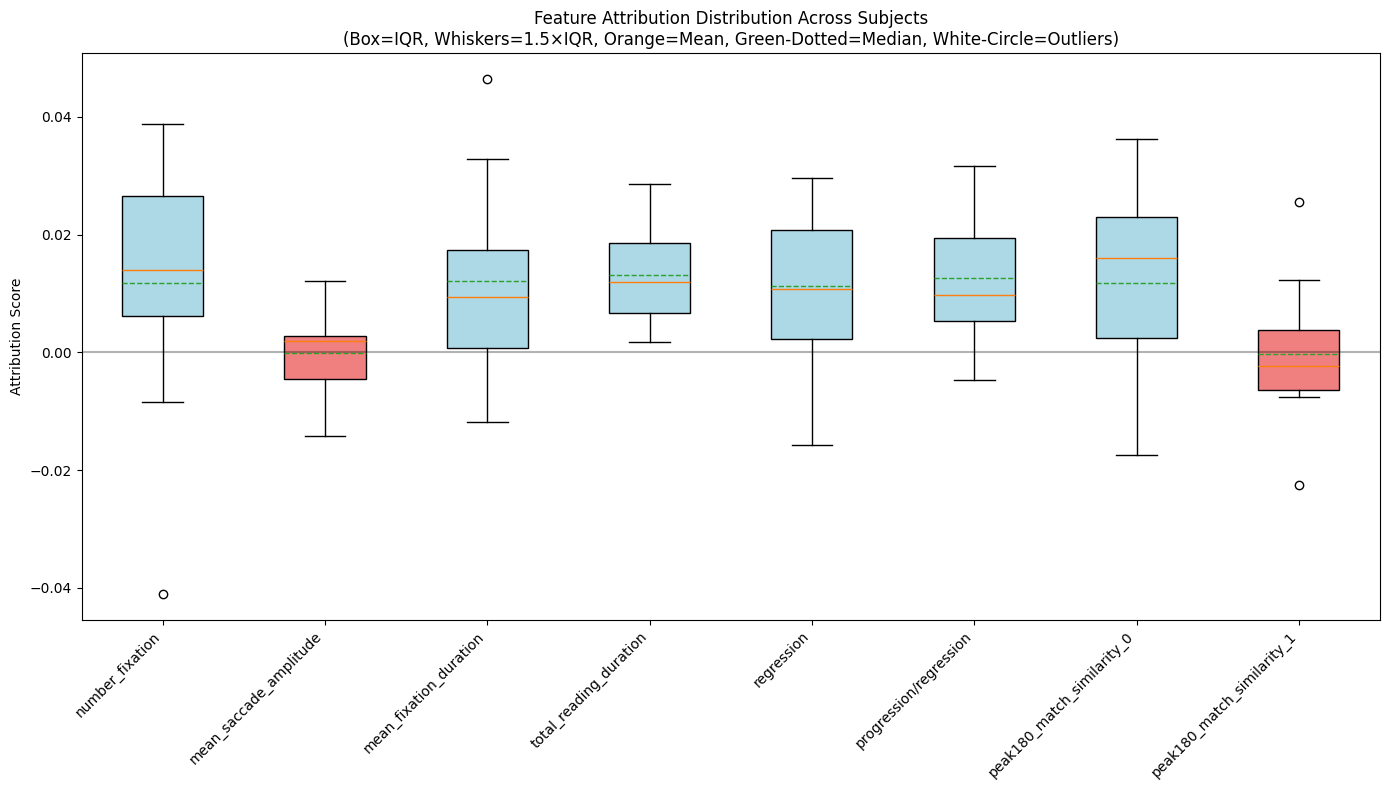


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0118, Std= 0.0198, Min=-0.0411, Max= 0.0388
mean_saccade_amplitude        : Mean=-0.0002, Std= 0.0062, Min=-0.0142, Max= 0.0122
mean_fixation_duration        : Mean= 0.0121, Std= 0.0151, Min=-0.0118, Max= 0.0465
total_reading_duration        : Mean= 0.0132, Std= 0.0087, Min= 0.0018, Max= 0.0286
regression                    : Mean= 0.0113, Std= 0.0122, Min=-0.0157, Max= 0.0296
progression/regression        : Mean= 0.0126, Std= 0.0102, Min=-0.0047, Max= 0.0317
peak180_match_similarity_0    : Mean= 0.0118, Std= 0.0156, Min=-0.0175, Max= 0.0363
peak180_match_similarity_1    : Mean=-0.0004, Std= 0.0109, Min=-0.0226, Max= 0.0255


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "peak180_match_similarity_0",
    "peak180_match_similarity_1"
]
plot_attribution(r4, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r4, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

#### Fourth Test - Original Features + Similarity Measure (Average and Standard Deviation)

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 370))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['total_reading_duration']
        vector_roi[subj][364] = Features['regression']
        vector_roi[subj][365] = Features['progression/regression']
        vector_roi[subj][366] = SimsVals[subj][0][0][0]
        vector_roi[subj][367] = SimsVals[subj][0][0][1]
        vector_roi[subj][368] = SimsVals[subj][0][0][2]
        vector_roi[subj][369] = SimsVals[subj][0][0][3]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(370, 185)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(185, 93)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(93, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
r1=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
r2=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
r3=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
r4=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7030038833618164
Epoch 5 loss: 0.445514053106308
Epoch 10 loss: 0.33334681391716003
Epoch 15 loss: 0.3145008087158203
Epoch 0 loss: 0.7030926942825317
Epoch 5 loss: 0.47124019265174866
Epoch 10 loss: 0.3282148241996765
Epoch 15 loss: 0.31565412878990173
Epoch 0 loss: 0.7062736749649048
Epoch 5 loss: 0.3684362769126892
Epoch 10 loss: 0.32465532422065735
Epoch 15 loss: 0.3136824071407318
Epoch 0 loss: 0.7154024839401245
Epoch 5 loss: 0.40474632382392883
Epoch 10 loss: 0.3418046534061432
Epoch 15 loss: 0.3286733031272888
Epoch 0 loss: 0.724746584892273
Epoch 5 loss: 0.47225221991539
Epoch 10 loss: 0.34862732887268066
Epoch 15 loss: 0.3167865574359894
Average accuracy: 0.8428571428571429
Standard deviation: 0.1228903609577518
Total confusion matrix:
[[27.  8.]
 [ 3. 32.]]
False positives: 8.0
False negatives: 3.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7036653161048889
E

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7030038833618164
Epoch 5 loss: 0.4915480613708496
Epoch 10 loss: 0.3583678603172302
Epoch 15 loss: 0.3338339626789093
Epoch 0 loss: 0.7030926942825317
Epoch 5 loss: 0.5151556730270386
Epoch 10 loss: 0.3756313920021057
Epoch 15 loss: 0.3355925381183624
Epoch 0 loss: 0.7062736749649048
Epoch 5 loss: 0.39637306332588196
Epoch 10 loss: 0.3465098738670349
Epoch 15 loss: 0.3206011950969696
Epoch 0 loss: 0.7154024839401245
Epoch 5 loss: 0.4449252188205719
Epoch 10 loss: 0.3707122802734375
Epoch 15 loss: 0.3414214551448822
Epoch 0 loss: 0.724746584892273
Epoch 5 loss: 0.5111140608787537
Epoch 10 loss: 0.39083054661750793
Epoch 15 loss: 0.34478309750556946
Average accuracy: 0.8714285714285716
Standard deviation: 0.0832993127835043
Total confusion matrix:
[[31.  4.]
 [ 5. 30.]]
False positives: 4.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7036653161048889
E

Approximation Error: -0.00012323771079536527 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


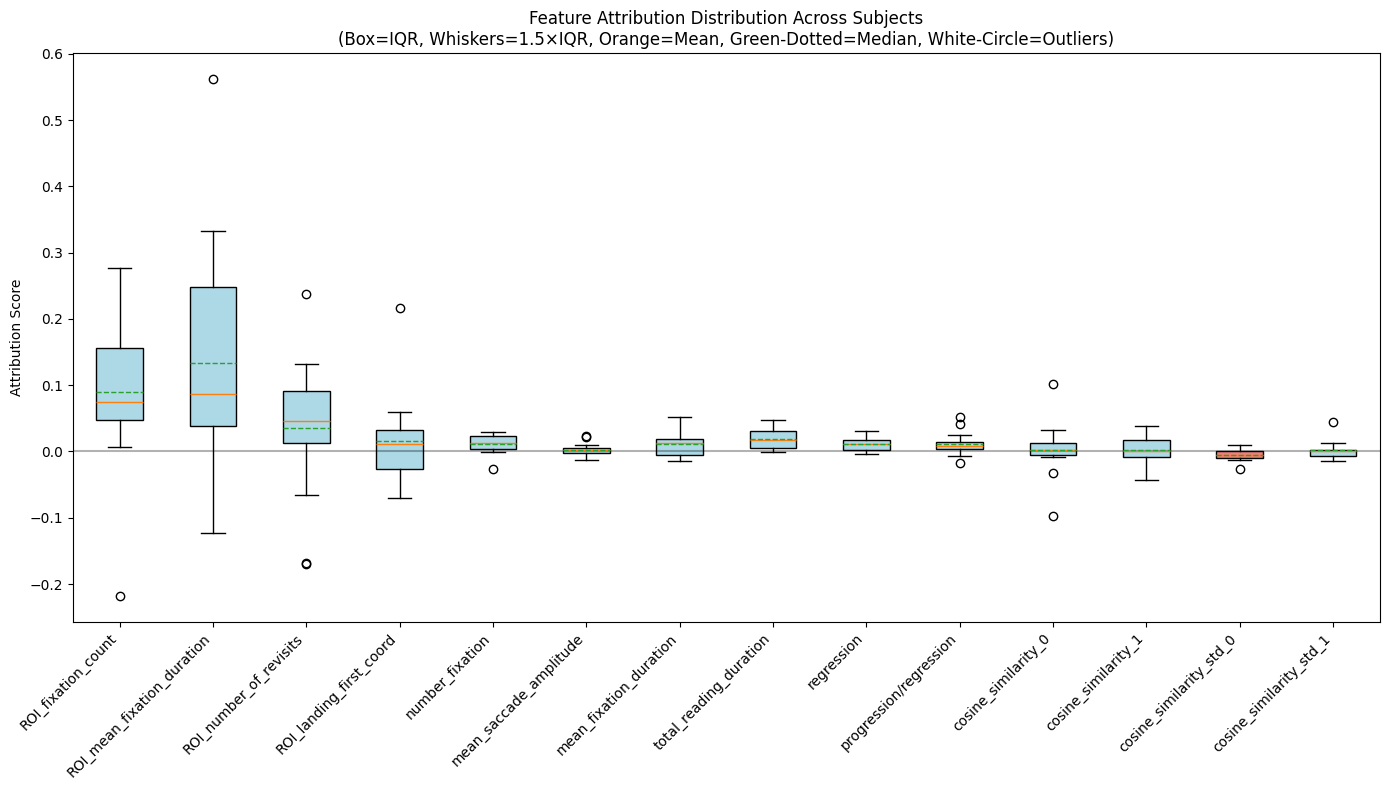


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0901, Std= 0.1162, Min=-0.2180, Max= 0.2772
ROI_mean_fixation_duration    : Mean= 0.1329, Std= 0.1747, Min=-0.1236, Max= 0.5620
ROI_number_of_revisits        : Mean= 0.0354, Std= 0.1073, Min=-0.1698, Max= 0.2370
ROI_landing_first_coord       : Mean= 0.0153, Std= 0.0676, Min=-0.0698, Max= 0.2165
number_fixation               : Mean= 0.0116, Std= 0.0142, Min=-0.0269, Max= 0.0287
mean_saccade_amplitude        : Mean= 0.0026, Std= 0.0103, Min=-0.0129, Max= 0.0241
mean_fixation_duration        : Mean= 0.0113, Std= 0.0180, Min=-0.0139, Max= 0.0517
total_reading_duration        : Mean= 0.0184, Std= 0.0142, Min=-0.0004, Max= 0.0477
regression                    : Mean= 0.0112, Std= 0.0102, Min=-0.0031, Max= 0.0314
progression/regression        : Mean= 0.0116, Std= 0.0176, Min=-0.0179, Max= 0.0522
cosine_similarity_0           : Mean= 0.0026, Std= 0.0402, Min=-0.096

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


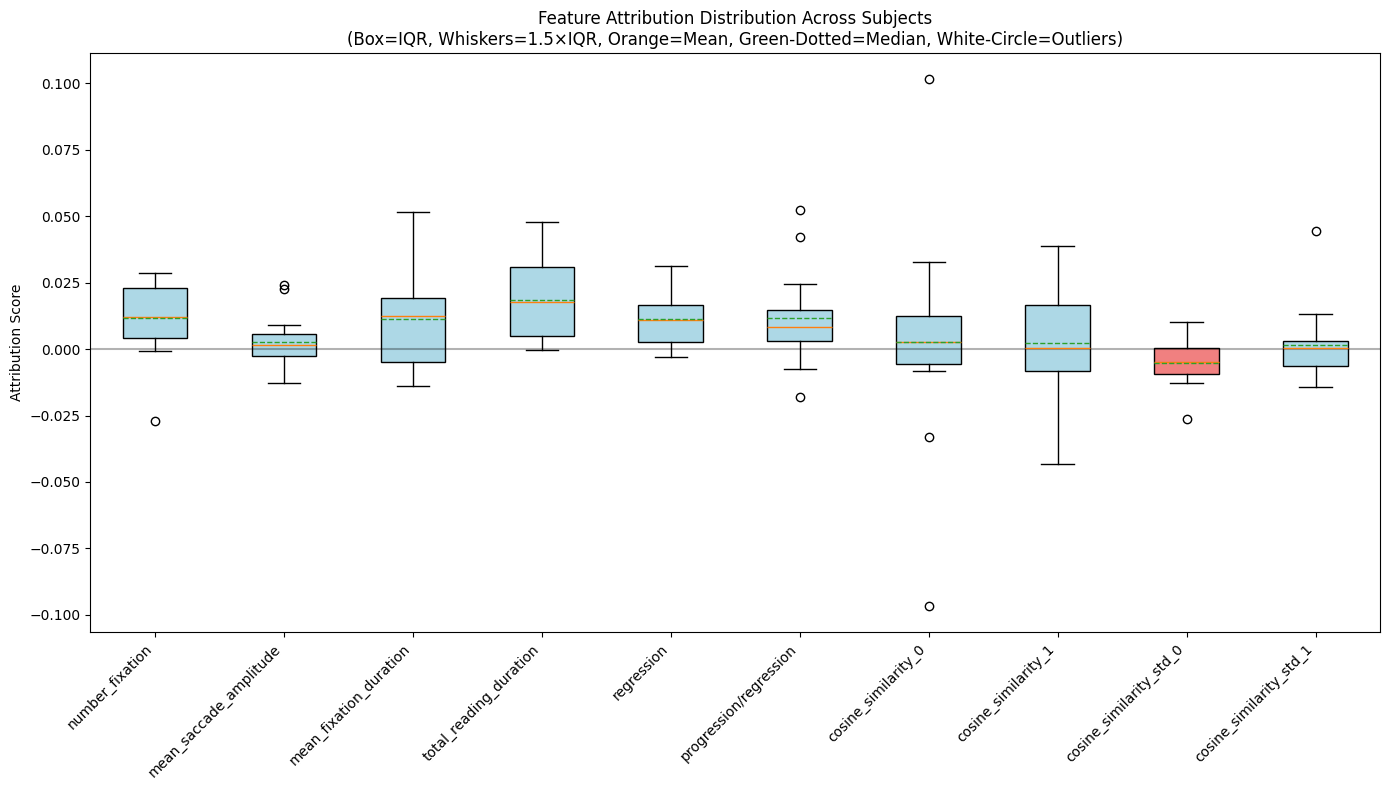


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0116, Std= 0.0142, Min=-0.0269, Max= 0.0287
mean_saccade_amplitude        : Mean= 0.0026, Std= 0.0103, Min=-0.0129, Max= 0.0241
mean_fixation_duration        : Mean= 0.0113, Std= 0.0180, Min=-0.0139, Max= 0.0517
total_reading_duration        : Mean= 0.0184, Std= 0.0142, Min=-0.0004, Max= 0.0477
regression                    : Mean= 0.0112, Std= 0.0102, Min=-0.0031, Max= 0.0314
progression/regression        : Mean= 0.0116, Std= 0.0176, Min=-0.0179, Max= 0.0522
cosine_similarity_0           : Mean= 0.0026, Std= 0.0402, Min=-0.0967, Max= 0.1015
cosine_similarity_1           : Mean= 0.0025, Std= 0.0206, Min=-0.0432, Max= 0.0389
cosine_similarity_std_0       : Mean=-0.0052, Std= 0.0085, Min=-0.0263, Max= 0.0101
cosine_similarity_std_1       : Mean= 0.0017, Std= 0.0136, Min=-0.0144, Max= 0.0443


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "cosine_similarity_0",
    "cosine_similarity_1",
    "cosine_similarity_std_0",
    "cosine_similarity_std_1"
]
plot_attribution(r1, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r1, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -0.00023528507153969258 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


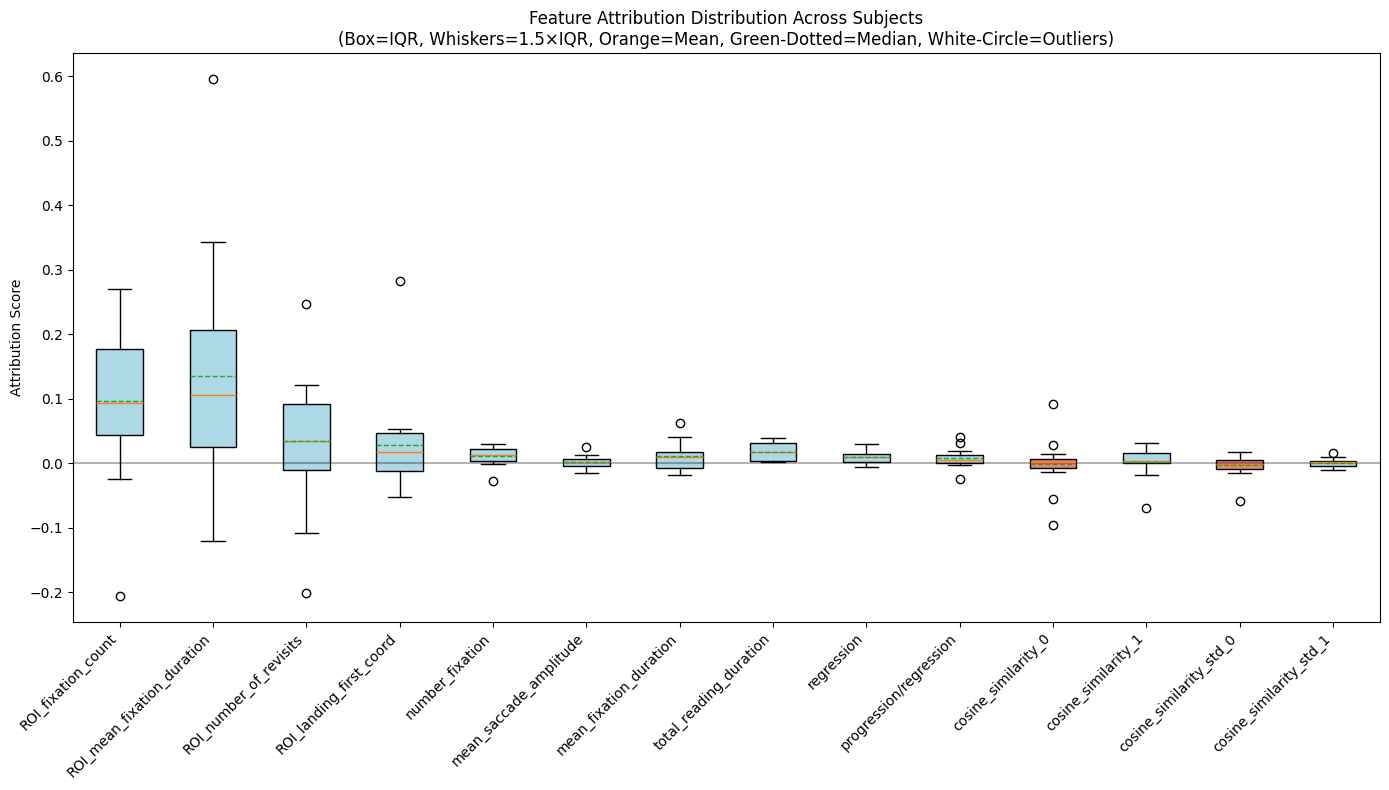


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0963, Std= 0.1188, Min=-0.2057, Max= 0.2704
ROI_mean_fixation_duration    : Mean= 0.1359, Std= 0.1766, Min=-0.1205, Max= 0.5960
ROI_number_of_revisits        : Mean= 0.0349, Std= 0.1039, Min=-0.2004, Max= 0.2466
ROI_landing_first_coord       : Mean= 0.0285, Std= 0.0784, Min=-0.0519, Max= 0.2822
number_fixation               : Mean= 0.0112, Std= 0.0142, Min=-0.0268, Max= 0.0299
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0104, Min=-0.0155, Max= 0.0248
mean_fixation_duration        : Mean= 0.0115, Std= 0.0212, Min=-0.0184, Max= 0.0619
total_reading_duration        : Mean= 0.0181, Std= 0.0135, Min= 0.0023, Max= 0.0388
regression                    : Mean= 0.0095, Std= 0.0095, Min=-0.0060, Max= 0.0293
progression/regression        : Mean= 0.0079, Std= 0.0152, Min=-0.0237, Max= 0.0414
cosine_similarity_0           : Mean=-0.0014, Std= 0.0396, Min=-0.095

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


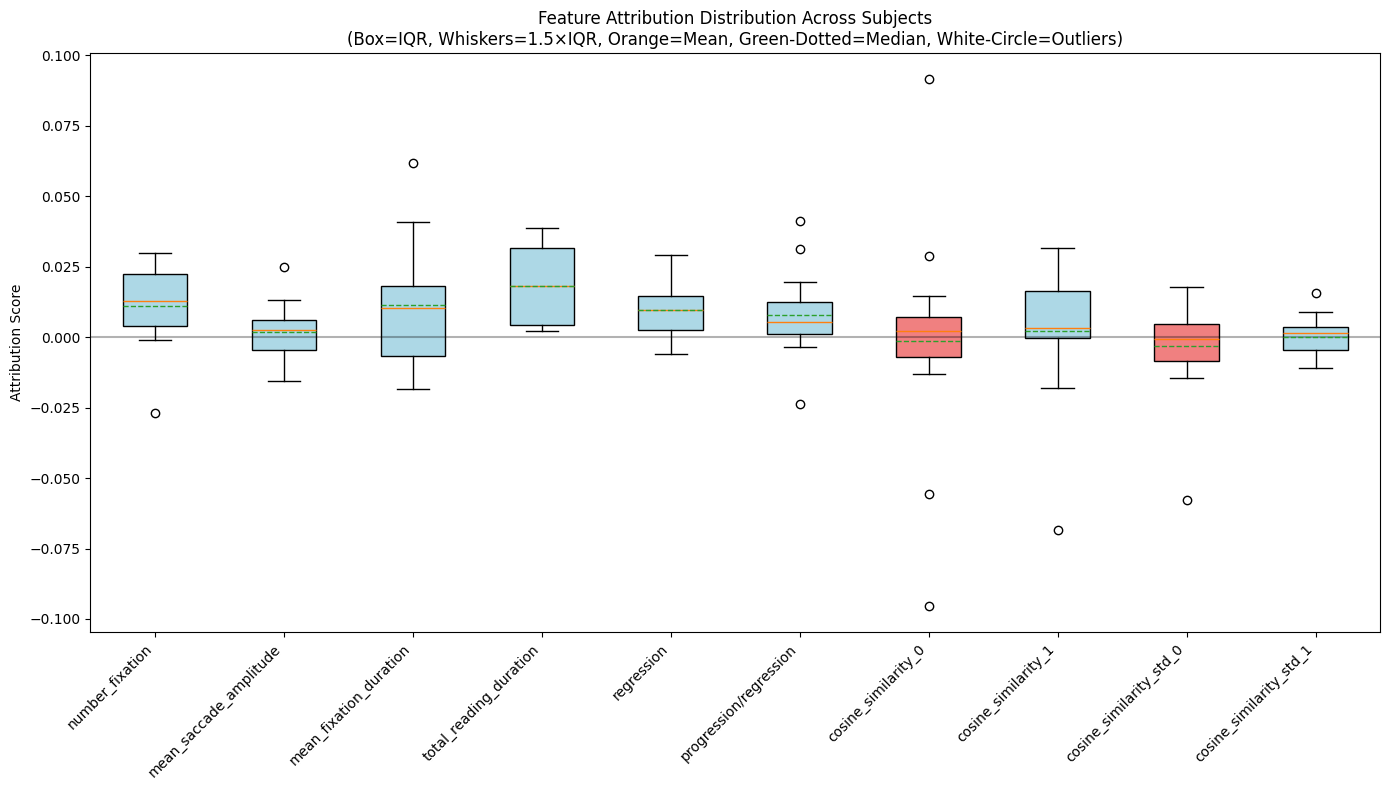


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0112, Std= 0.0142, Min=-0.0268, Max= 0.0299
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0104, Min=-0.0155, Max= 0.0248
mean_fixation_duration        : Mean= 0.0115, Std= 0.0212, Min=-0.0184, Max= 0.0619
total_reading_duration        : Mean= 0.0181, Std= 0.0135, Min= 0.0023, Max= 0.0388
regression                    : Mean= 0.0095, Std= 0.0095, Min=-0.0060, Max= 0.0293
progression/regression        : Mean= 0.0079, Std= 0.0152, Min=-0.0237, Max= 0.0414
cosine_similarity_0           : Mean=-0.0014, Std= 0.0396, Min=-0.0954, Max= 0.0915
cosine_similarity_1           : Mean= 0.0021, Std= 0.0236, Min=-0.0686, Max= 0.0316
cosine_similarity_std_0       : Mean=-0.0032, Std= 0.0178, Min=-0.0578, Max= 0.0180
cosine_similarity_std_1       : Mean= 0.0002, Std= 0.0071, Min=-0.0108, Max= 0.0158


In [ ]:
plot_attribution(r2, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r2, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -0.0002666912041604519 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


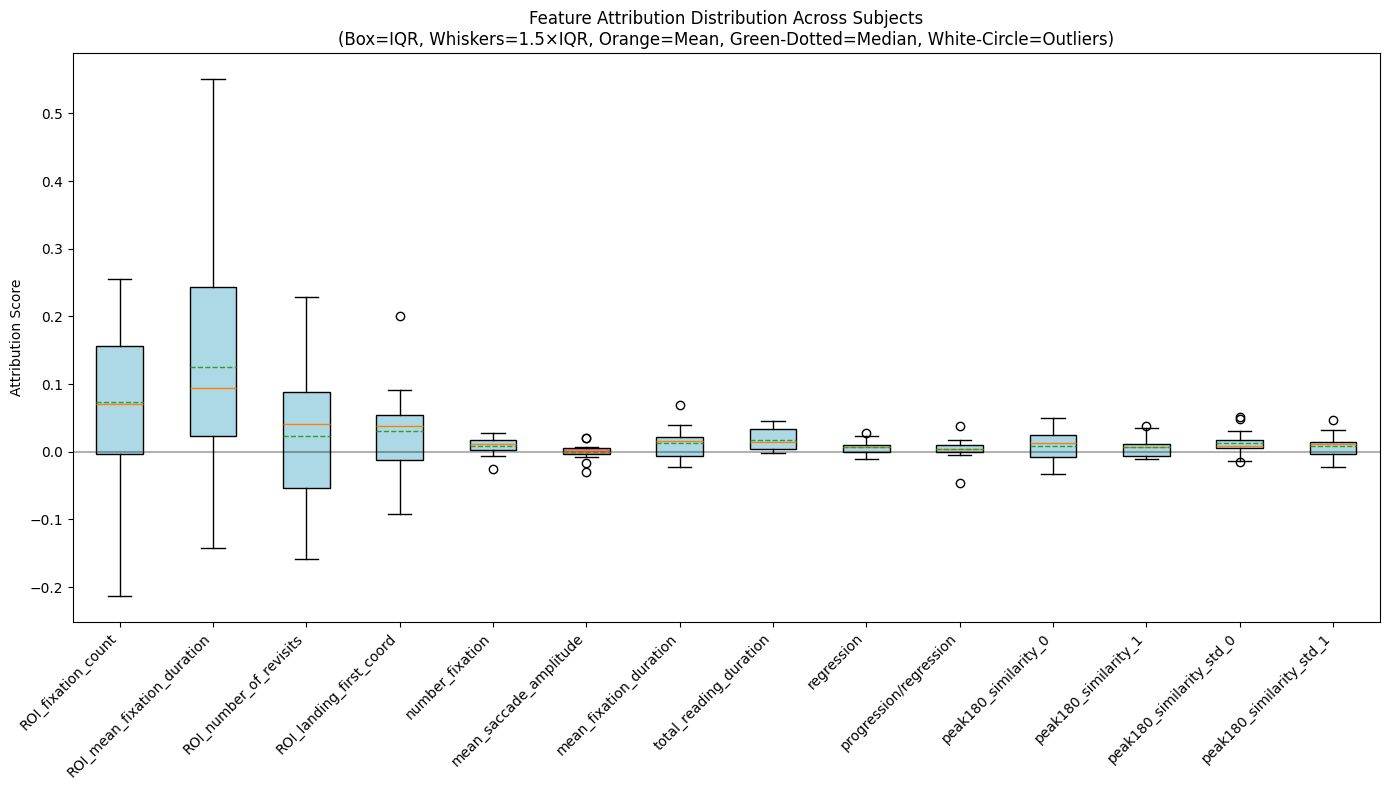


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0729, Std= 0.1271, Min=-0.2129, Max= 0.2560
ROI_mean_fixation_duration    : Mean= 0.1254, Std= 0.1771, Min=-0.1421, Max= 0.5509
ROI_number_of_revisits        : Mean= 0.0226, Std= 0.1037, Min=-0.1584, Max= 0.2280
ROI_landing_first_coord       : Mean= 0.0310, Std= 0.0681, Min=-0.0915, Max= 0.2005
number_fixation               : Mean= 0.0088, Std= 0.0130, Min=-0.0257, Max= 0.0277
mean_saccade_amplitude        : Mean=-0.0001, Std= 0.0126, Min=-0.0304, Max= 0.0211
mean_fixation_duration        : Mean= 0.0129, Std= 0.0233, Min=-0.0222, Max= 0.0687
total_reading_duration        : Mean= 0.0179, Std= 0.0149, Min=-0.0018, Max= 0.0449
regression                    : Mean= 0.0072, Std= 0.0108, Min=-0.0102, Max= 0.0284
progression/regression        : Mean= 0.0037, Std= 0.0173, Min=-0.0462, Max= 0.0377
peak180_similarity_0          : Mean= 0.0087, Std= 0.0239, Min=-0.032

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


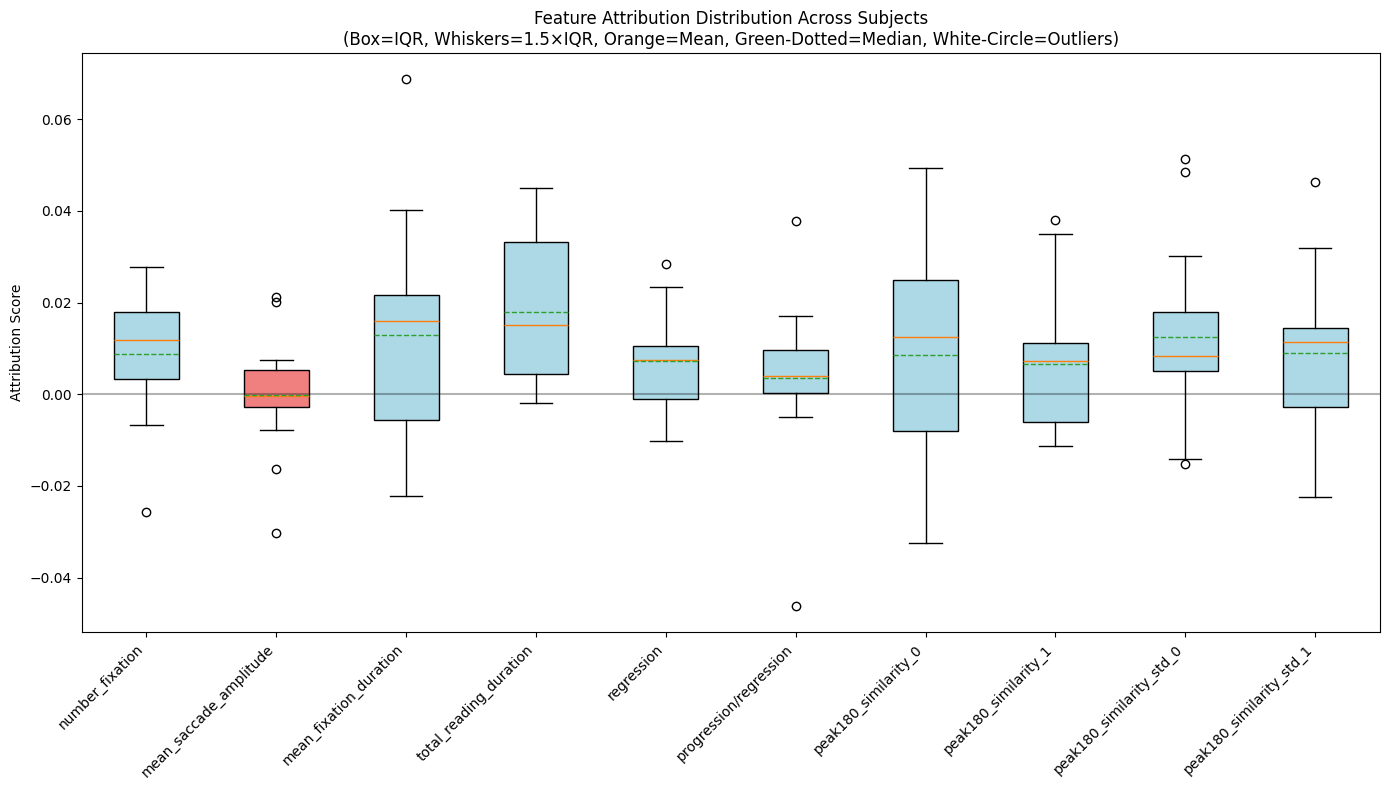


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0088, Std= 0.0130, Min=-0.0257, Max= 0.0277
mean_saccade_amplitude        : Mean=-0.0001, Std= 0.0126, Min=-0.0304, Max= 0.0211
mean_fixation_duration        : Mean= 0.0129, Std= 0.0233, Min=-0.0222, Max= 0.0687
total_reading_duration        : Mean= 0.0179, Std= 0.0149, Min=-0.0018, Max= 0.0449
regression                    : Mean= 0.0072, Std= 0.0108, Min=-0.0102, Max= 0.0284
progression/regression        : Mean= 0.0037, Std= 0.0173, Min=-0.0462, Max= 0.0377
peak180_similarity_0          : Mean= 0.0087, Std= 0.0239, Min=-0.0325, Max= 0.0493
peak180_similarity_1          : Mean= 0.0065, Std= 0.0150, Min=-0.0114, Max= 0.0381
peak180_similarity_std_0      : Mean= 0.0124, Std= 0.0191, Min=-0.0152, Max= 0.0513
peak180_similarity_std_1      : Mean= 0.0090, Std= 0.0174, Min=-0.0224, Max= 0.0463


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "peak180_similarity_0",
    "peak180_similarity_1",
    "peak180_similarity_std_0",
    "peak180_similarity_std_1"
]
plot_attribution(r3, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r3, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -0.0003176659229211509 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


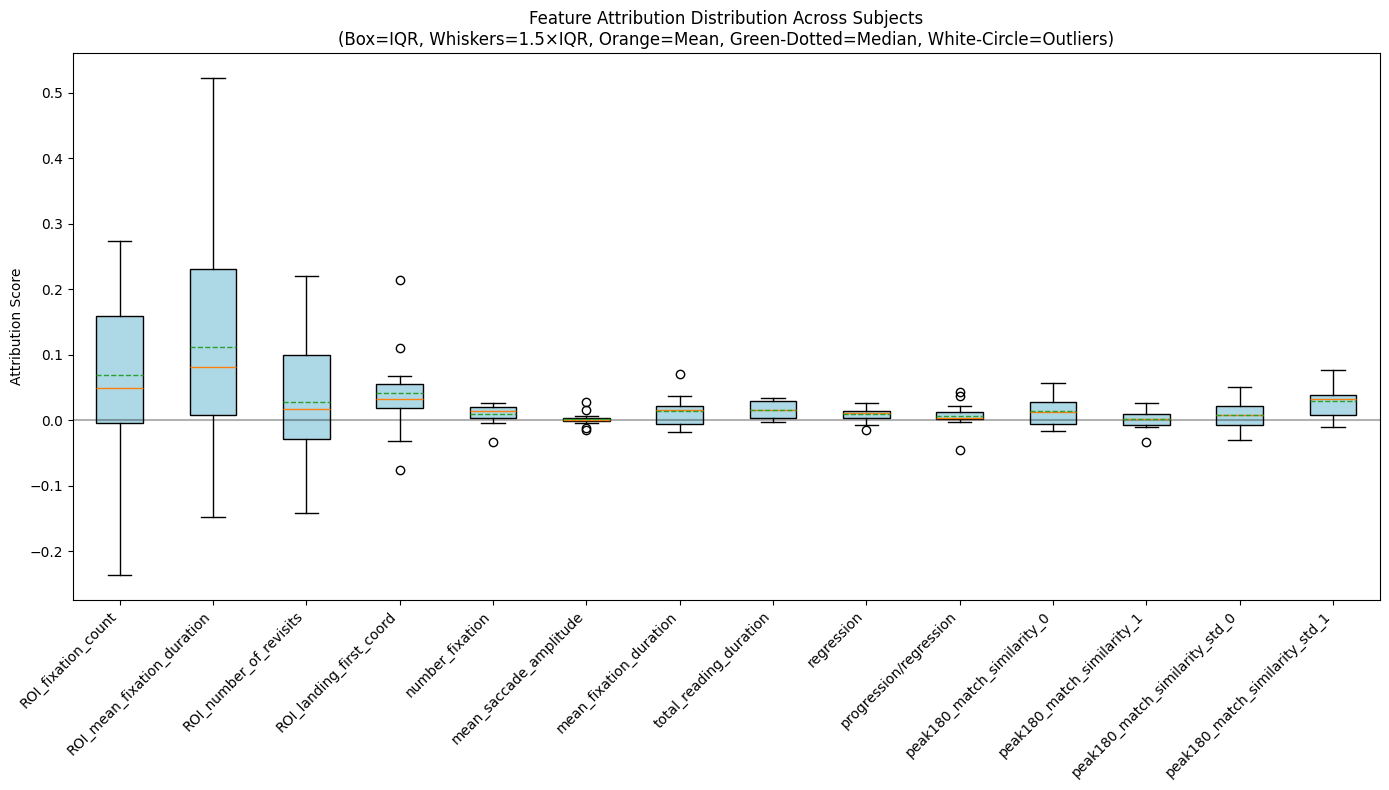


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0687, Std= 0.1283, Min=-0.2359, Max= 0.2736
ROI_mean_fixation_duration    : Mean= 0.1114, Std= 0.1716, Min=-0.1473, Max= 0.5229
ROI_number_of_revisits        : Mean= 0.0285, Std= 0.0933, Min=-0.1410, Max= 0.2201
ROI_landing_first_coord       : Mean= 0.0411, Std= 0.0637, Min=-0.0756, Max= 0.2137
number_fixation               : Mean= 0.0096, Std= 0.0150, Min=-0.0327, Max= 0.0268
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0100, Min=-0.0150, Max= 0.0273
mean_fixation_duration        : Mean= 0.0139, Std= 0.0225, Min=-0.0186, Max= 0.0701
total_reading_duration        : Mean= 0.0161, Std= 0.0133, Min=-0.0025, Max= 0.0348
regression                    : Mean= 0.0090, Std= 0.0113, Min=-0.0145, Max= 0.0266
progression/regression        : Mean= 0.0068, Std= 0.0200, Min=-0.0460, Max= 0.0435
peak180_match_similarity_0    : Mean= 0.0149, Std= 0.0224, Min=-0.016

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


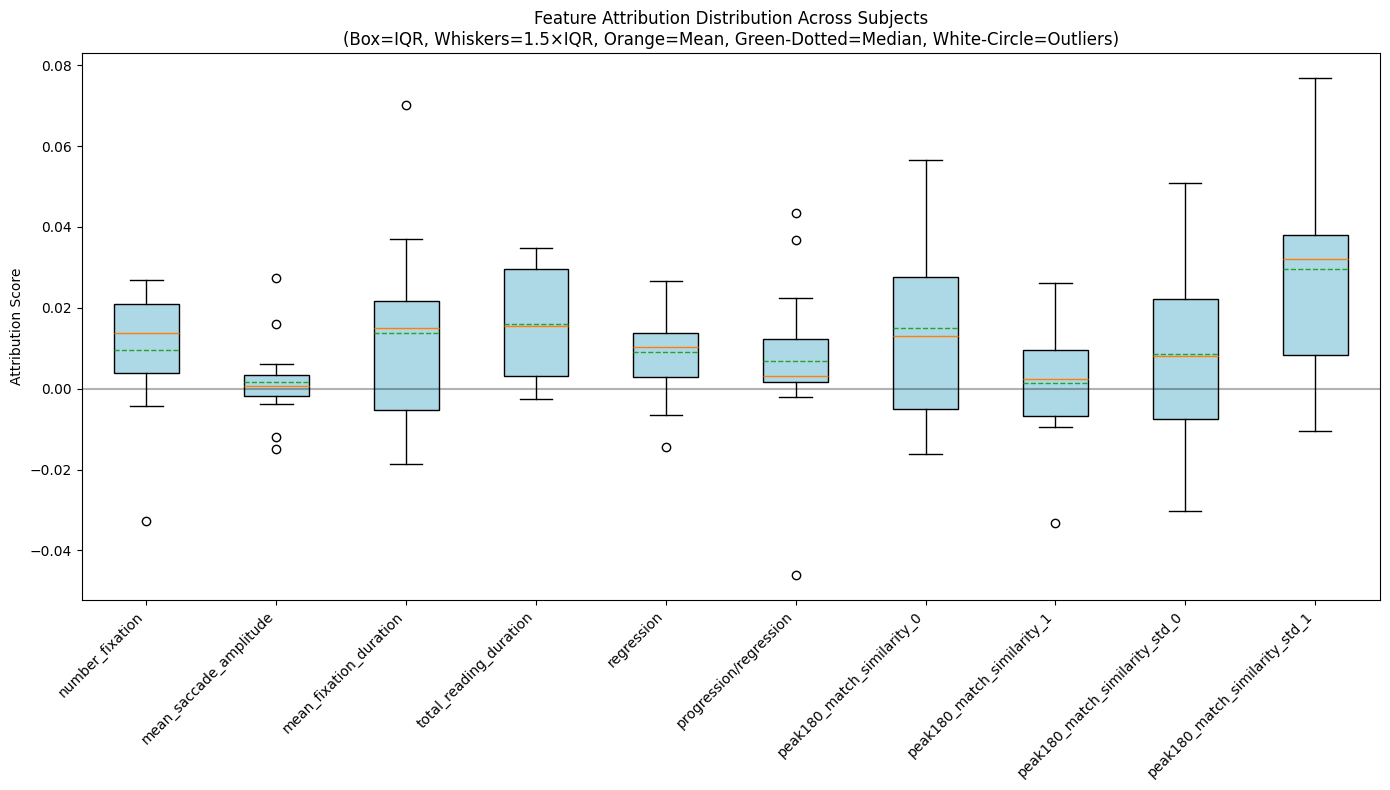


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0096, Std= 0.0150, Min=-0.0327, Max= 0.0268
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0100, Min=-0.0150, Max= 0.0273
mean_fixation_duration        : Mean= 0.0139, Std= 0.0225, Min=-0.0186, Max= 0.0701
total_reading_duration        : Mean= 0.0161, Std= 0.0133, Min=-0.0025, Max= 0.0348
regression                    : Mean= 0.0090, Std= 0.0113, Min=-0.0145, Max= 0.0266
progression/regression        : Mean= 0.0068, Std= 0.0200, Min=-0.0460, Max= 0.0435
peak180_match_similarity_0    : Mean= 0.0149, Std= 0.0224, Min=-0.0161, Max= 0.0566
peak180_match_similarity_1    : Mean= 0.0013, Std= 0.0136, Min=-0.0331, Max= 0.0262
peak180_match_similarity_std_0: Mean= 0.0086, Std= 0.0204, Min=-0.0302, Max= 0.0509
peak180_match_similarity_std_1: Mean= 0.0295, Std= 0.0265, Min=-0.0105, Max= 0.0768


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "peak180_match_similarity_0",
    "peak180_match_similarity_1",
    "peak180_match_similarity_std_0",
    "peak180_match_similarity_std_1"
]
plot_attribution(r4, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r4, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

#### Fifth Test - Original Features + Similarity Measure (Without Mean Saccade Amplitude)

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 367))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_fixation_duration']
        vector_roi[subj][362] = Features['total_reading_duration']
        vector_roi[subj][363] = Features['regression']
        vector_roi[subj][364] = Features['progression/regression']
        vector_roi[subj][365] = SimsVals[subj][0][0][0] 
        vector_roi[subj][366] = SimsVals[subj][0][0][1]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(367, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.721455454826355
Epoch 5 loss: 0.43937206268310547
Epoch 10 loss: 0.34290483593940735
Epoch 15 loss: 0.32471126317977905
Epoch 0 loss: 0.7138363718986511
Epoch 5 loss: 0.4265865385532379
Epoch 10 loss: 0.3433068096637726
Epoch 15 loss: 0.3252883553504944
Epoch 0 loss: 0.6738865971565247
Epoch 5 loss: 0.4154708683490753
Epoch 10 loss: 0.3212285041809082
Epoch 15 loss: 0.31704404950141907
Epoch 0 loss: 0.6904247999191284
Epoch 5 loss: 0.40994343161582947
Epoch 10 loss: 0.35304951667785645
Epoch 15 loss: 0.3243925869464874
Epoch 0 loss: 0.7080955505371094
Epoch 5 loss: 0.46817901730537415
Epoch 10 loss: 0.34919247031211853
Epoch 15 loss: 0.3174736499786377
Average accuracy: 0.8857142857142858
Standard deviation: 0.08571428571428573
Total confusion matrix:
[[29.  6.]
 [ 2. 33.]]
False positives: 6.0
False negatives: 2.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.721610903739

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
r1=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
r2=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
r3=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
r4=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.721455454826355
Epoch 5 loss: 0.4828953742980957
Epoch 10 loss: 0.3699699938297272
Epoch 15 loss: 0.3442760109901428
Epoch 0 loss: 0.7138363718986511
Epoch 5 loss: 0.47827044129371643
Epoch 10 loss: 0.378739595413208
Epoch 15 loss: 0.37090232968330383
Epoch 0 loss: 0.6738865971565247
Epoch 5 loss: 0.4409245550632477
Epoch 10 loss: 0.36377424001693726
Epoch 15 loss: 0.3329135775566101
Epoch 0 loss: 0.6904247999191284
Epoch 5 loss: 0.44484737515449524
Epoch 10 loss: 0.38632795214653015
Epoch 15 loss: 0.3430077135562897
Epoch 0 loss: 0.7080955505371094
Epoch 5 loss: 0.5213766694068909
Epoch 10 loss: 0.41072043776512146
Epoch 15 loss: 0.3350103497505188
Average accuracy: 0.9142857142857143
Standard deviation: 0.028571428571428602
Total confusion matrix:
[[32.  3.]
 [ 3. 32.]]
False positives: 3.0
False negatives: 3.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.72161090373992

Approximation Error: -0.00019967534171883017 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


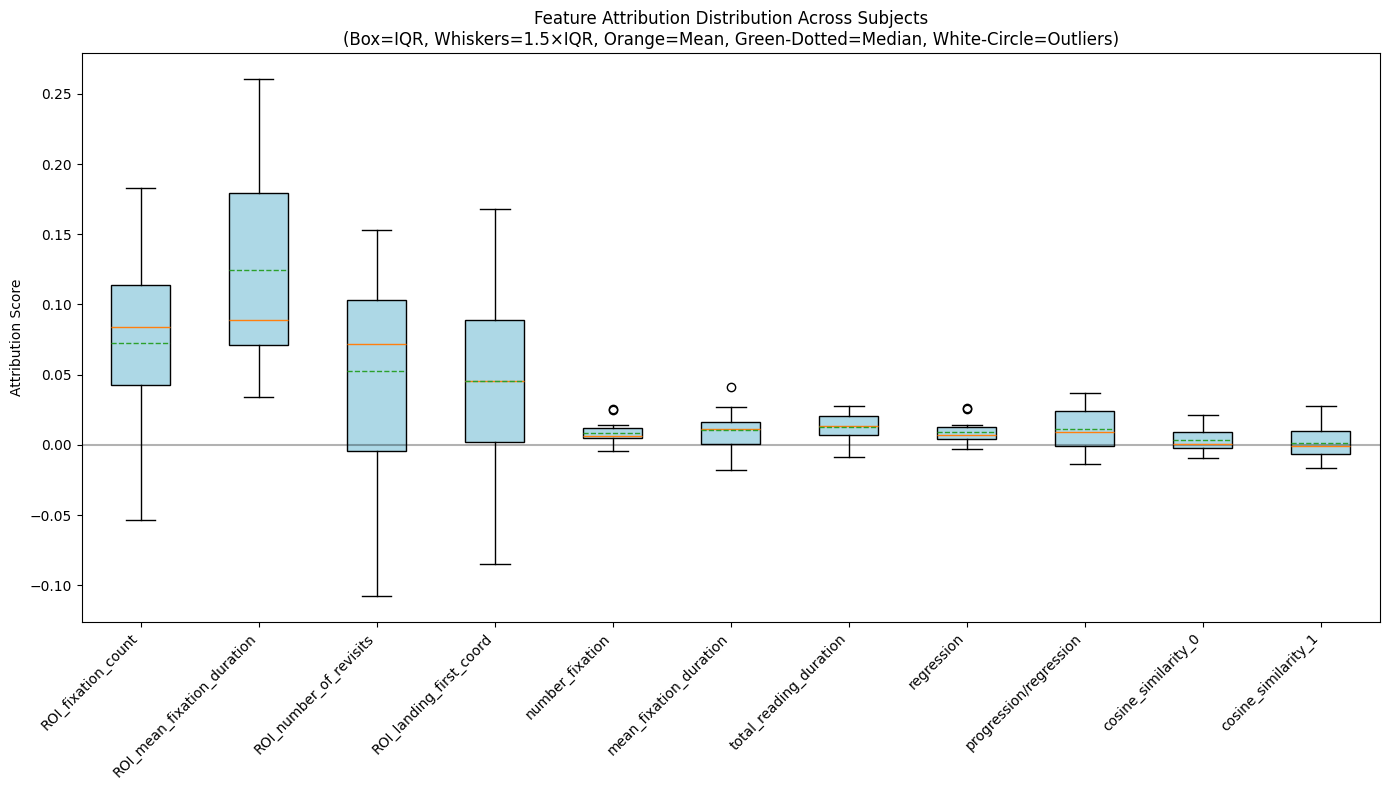


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0723, Std= 0.0731, Min=-0.0532, Max= 0.1828
ROI_mean_fixation_duration    : Mean= 0.1244, Std= 0.0718, Min= 0.0342, Max= 0.2605
ROI_number_of_revisits        : Mean= 0.0524, Std= 0.0697, Min=-0.1075, Max= 0.1527
ROI_landing_first_coord       : Mean= 0.0457, Std= 0.0735, Min=-0.0847, Max= 0.1678
number_fixation               : Mean= 0.0086, Std= 0.0081, Min=-0.0046, Max= 0.0253
mean_fixation_duration        : Mean= 0.0105, Std= 0.0139, Min=-0.0181, Max= 0.0415
total_reading_duration        : Mean= 0.0128, Std= 0.0100, Min=-0.0083, Max= 0.0280
regression                    : Mean= 0.0092, Std= 0.0081, Min=-0.0033, Max= 0.0266
progression/regression        : Mean= 0.0112, Std= 0.0156, Min=-0.0135, Max= 0.0369
cosine_similarity_0           : Mean= 0.0032, Std= 0.0095, Min=-0.0093, Max= 0.0212
cosine_similarity_1           : Mean= 0.0010, Std= 0.0118, Min=-0.016

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


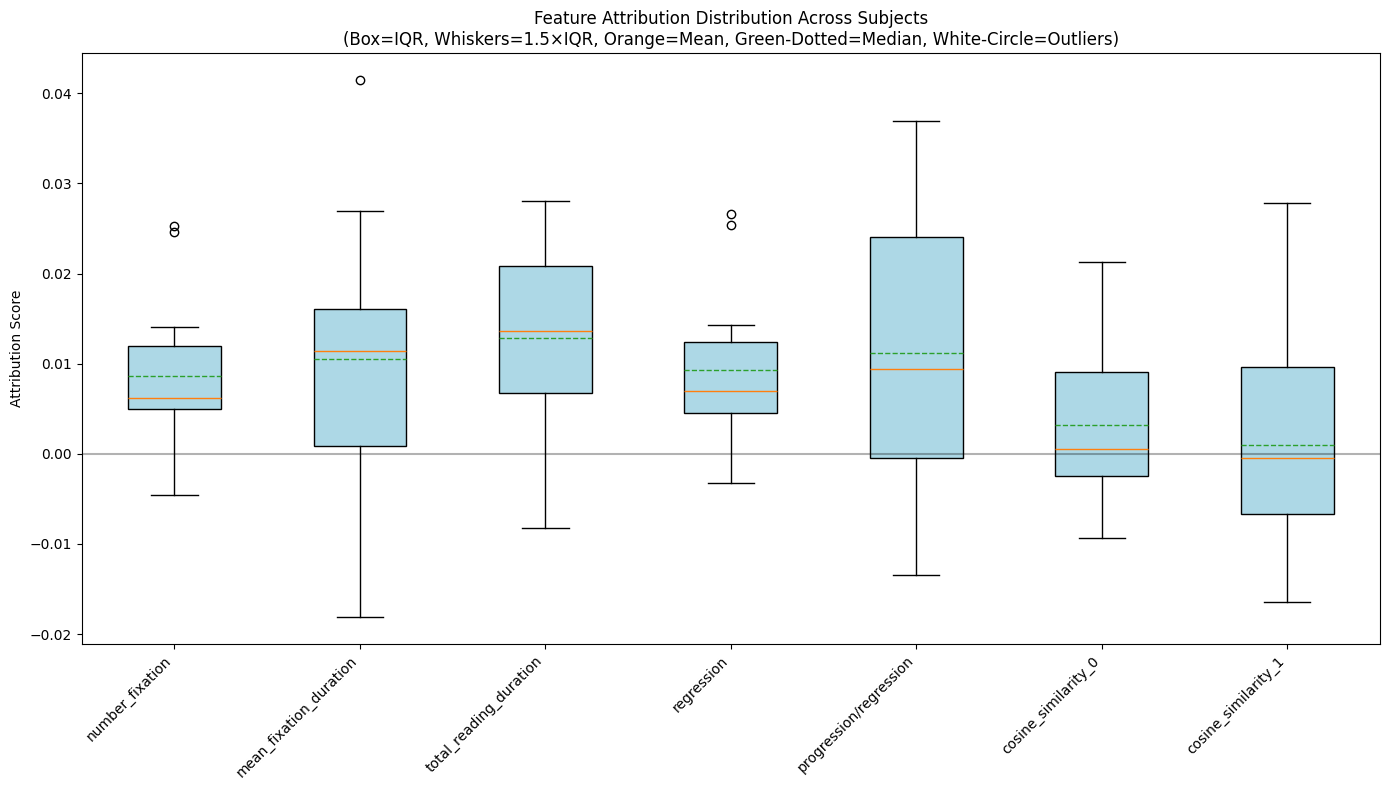


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0086, Std= 0.0081, Min=-0.0046, Max= 0.0253
mean_fixation_duration        : Mean= 0.0105, Std= 0.0139, Min=-0.0181, Max= 0.0415
total_reading_duration        : Mean= 0.0128, Std= 0.0100, Min=-0.0083, Max= 0.0280
regression                    : Mean= 0.0092, Std= 0.0081, Min=-0.0033, Max= 0.0266
progression/regression        : Mean= 0.0112, Std= 0.0156, Min=-0.0135, Max= 0.0369
cosine_similarity_0           : Mean= 0.0032, Std= 0.0095, Min=-0.0093, Max= 0.0212
cosine_similarity_1           : Mean= 0.0010, Std= 0.0118, Min=-0.0164, Max= 0.0279


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "cosine_similarity_0",
    "cosine_similarity_1",
]
plot_attribution(r1, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r1, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: 0.0001522368547739461 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


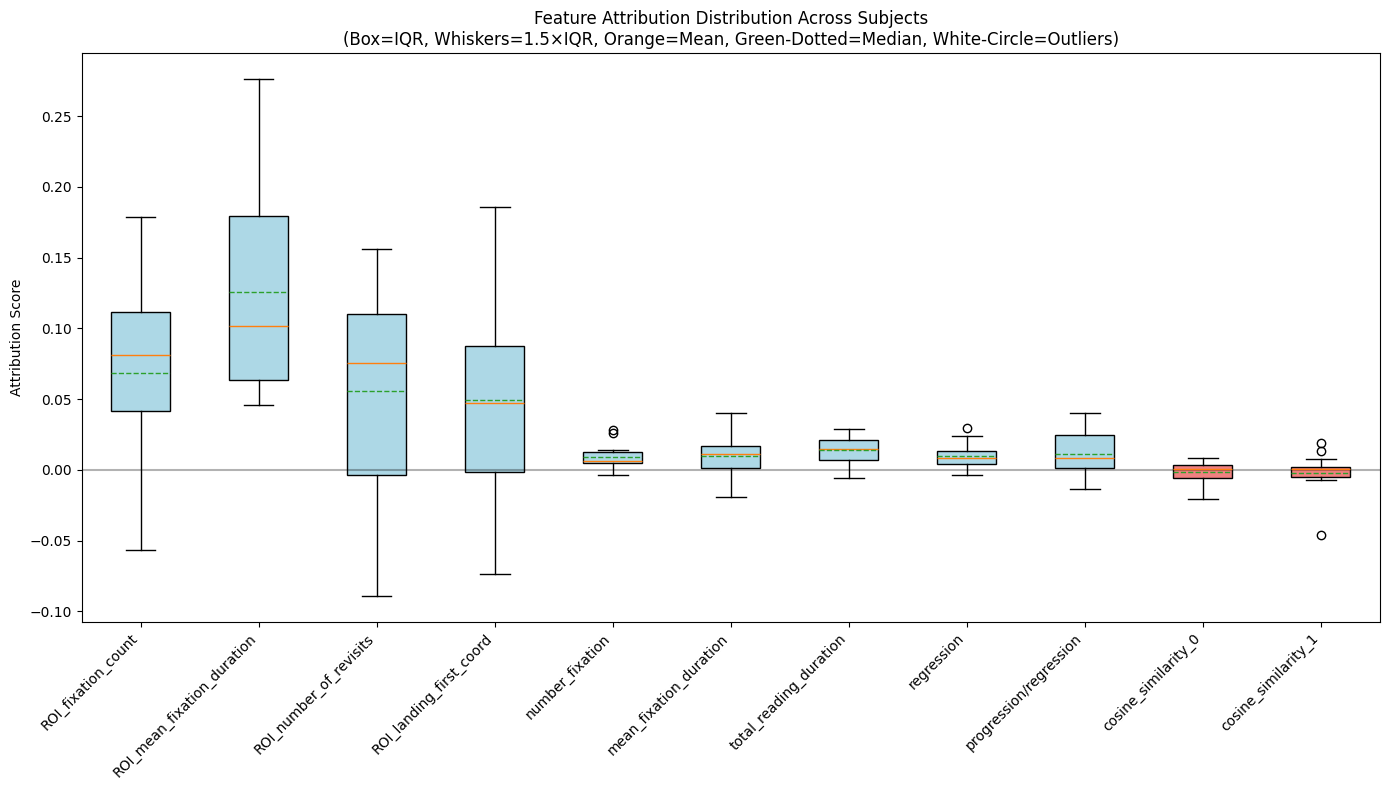


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0684, Std= 0.0745, Min=-0.0565, Max= 0.1786
ROI_mean_fixation_duration    : Mean= 0.1255, Std= 0.0729, Min= 0.0460, Max= 0.2762
ROI_number_of_revisits        : Mean= 0.0554, Std= 0.0672, Min=-0.0891, Max= 0.1557
ROI_landing_first_coord       : Mean= 0.0494, Std= 0.0743, Min=-0.0738, Max= 0.1860
number_fixation               : Mean= 0.0087, Std= 0.0087, Min=-0.0038, Max= 0.0279
mean_fixation_duration        : Mean= 0.0098, Std= 0.0138, Min=-0.0190, Max= 0.0399
total_reading_duration        : Mean= 0.0138, Std= 0.0101, Min=-0.0056, Max= 0.0288
regression                    : Mean= 0.0096, Std= 0.0085, Min=-0.0040, Max= 0.0298
progression/regression        : Mean= 0.0115, Std= 0.0156, Min=-0.0139, Max= 0.0398
cosine_similarity_0           : Mean=-0.0016, Std= 0.0076, Min=-0.0204, Max= 0.0085
cosine_similarity_1           : Mean=-0.0020, Std= 0.0142, Min=-0.046

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


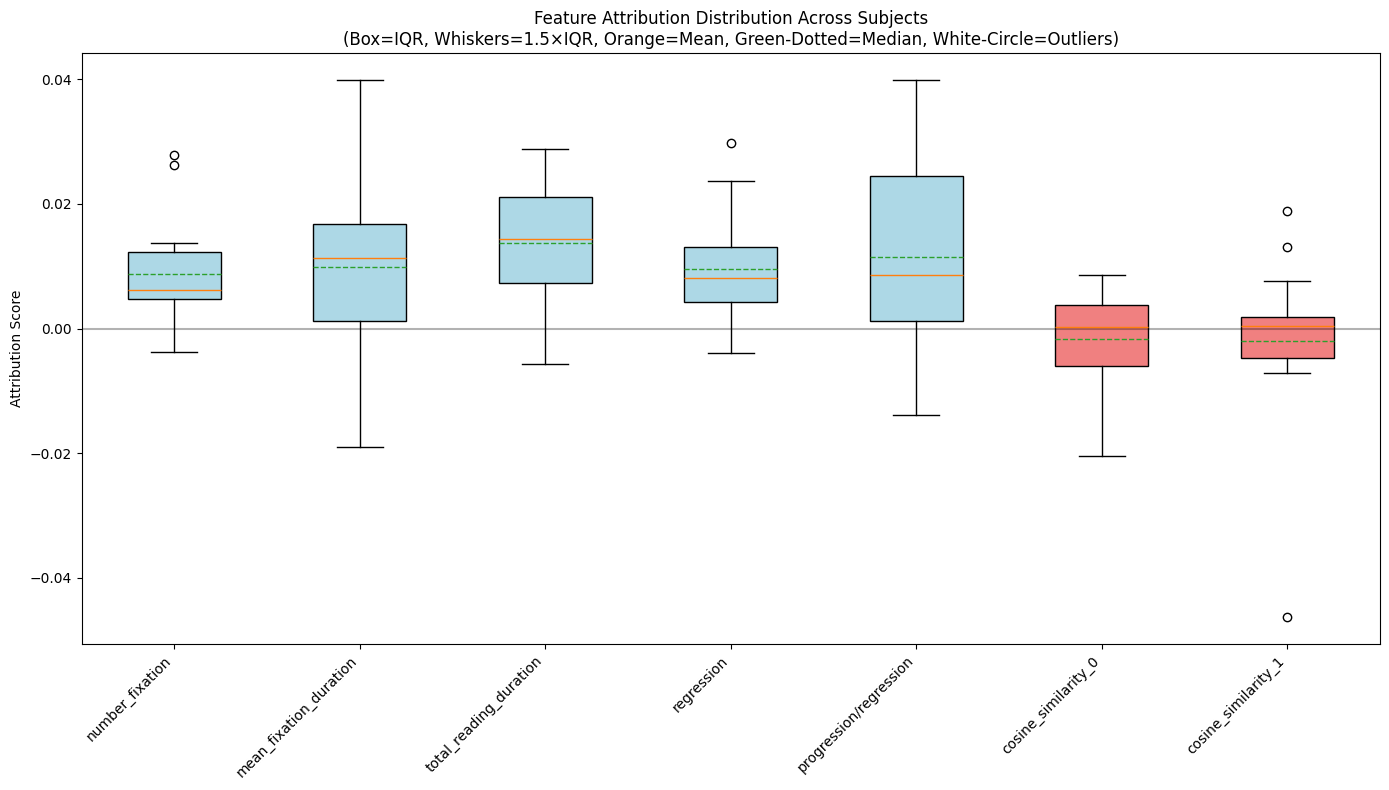


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0087, Std= 0.0087, Min=-0.0038, Max= 0.0279
mean_fixation_duration        : Mean= 0.0098, Std= 0.0138, Min=-0.0190, Max= 0.0399
total_reading_duration        : Mean= 0.0138, Std= 0.0101, Min=-0.0056, Max= 0.0288
regression                    : Mean= 0.0096, Std= 0.0085, Min=-0.0040, Max= 0.0298
progression/regression        : Mean= 0.0115, Std= 0.0156, Min=-0.0139, Max= 0.0398
cosine_similarity_0           : Mean=-0.0016, Std= 0.0076, Min=-0.0204, Max= 0.0085
cosine_similarity_1           : Mean=-0.0020, Std= 0.0142, Min=-0.0463, Max= 0.0189


In [ ]:
plot_attribution(r2, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r2, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: -0.0003992242563981563 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


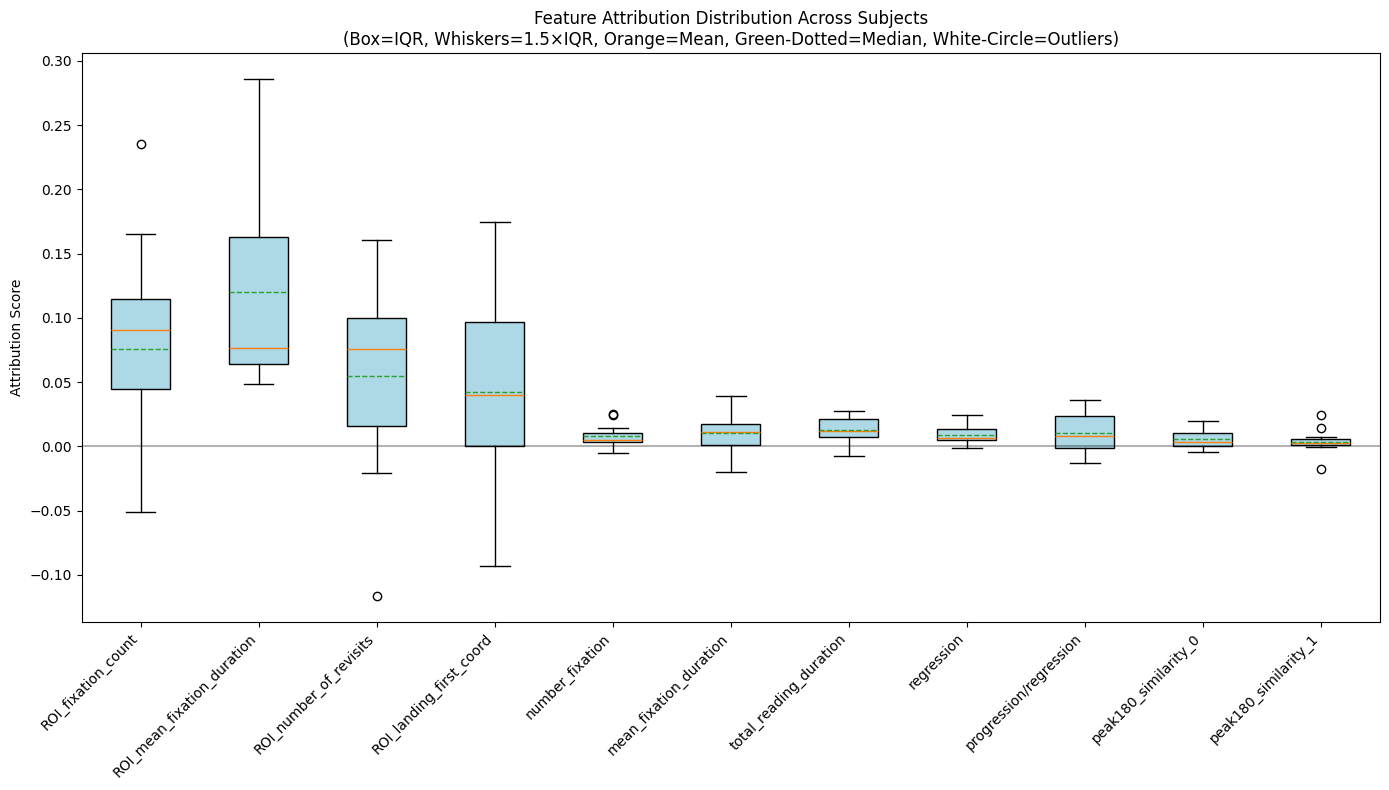


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0758, Std= 0.0767, Min=-0.0511, Max= 0.2351
ROI_mean_fixation_duration    : Mean= 0.1201, Std= 0.0771, Min= 0.0486, Max= 0.2860
ROI_number_of_revisits        : Mean= 0.0547, Std= 0.0682, Min=-0.1165, Max= 0.1610
ROI_landing_first_coord       : Mean= 0.0422, Std= 0.0723, Min=-0.0933, Max= 0.1744
number_fixation               : Mean= 0.0078, Std= 0.0082, Min=-0.0052, Max= 0.0250
mean_fixation_duration        : Mean= 0.0107, Std= 0.0140, Min=-0.0203, Max= 0.0394
total_reading_duration        : Mean= 0.0127, Std= 0.0098, Min=-0.0075, Max= 0.0275
regression                    : Mean= 0.0090, Std= 0.0076, Min=-0.0015, Max= 0.0245
progression/regression        : Mean= 0.0103, Std= 0.0157, Min=-0.0128, Max= 0.0359
peak180_similarity_0          : Mean= 0.0053, Std= 0.0072, Min=-0.0041, Max= 0.0196
peak180_similarity_1          : Mean= 0.0036, Std= 0.0089, Min=-0.017

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


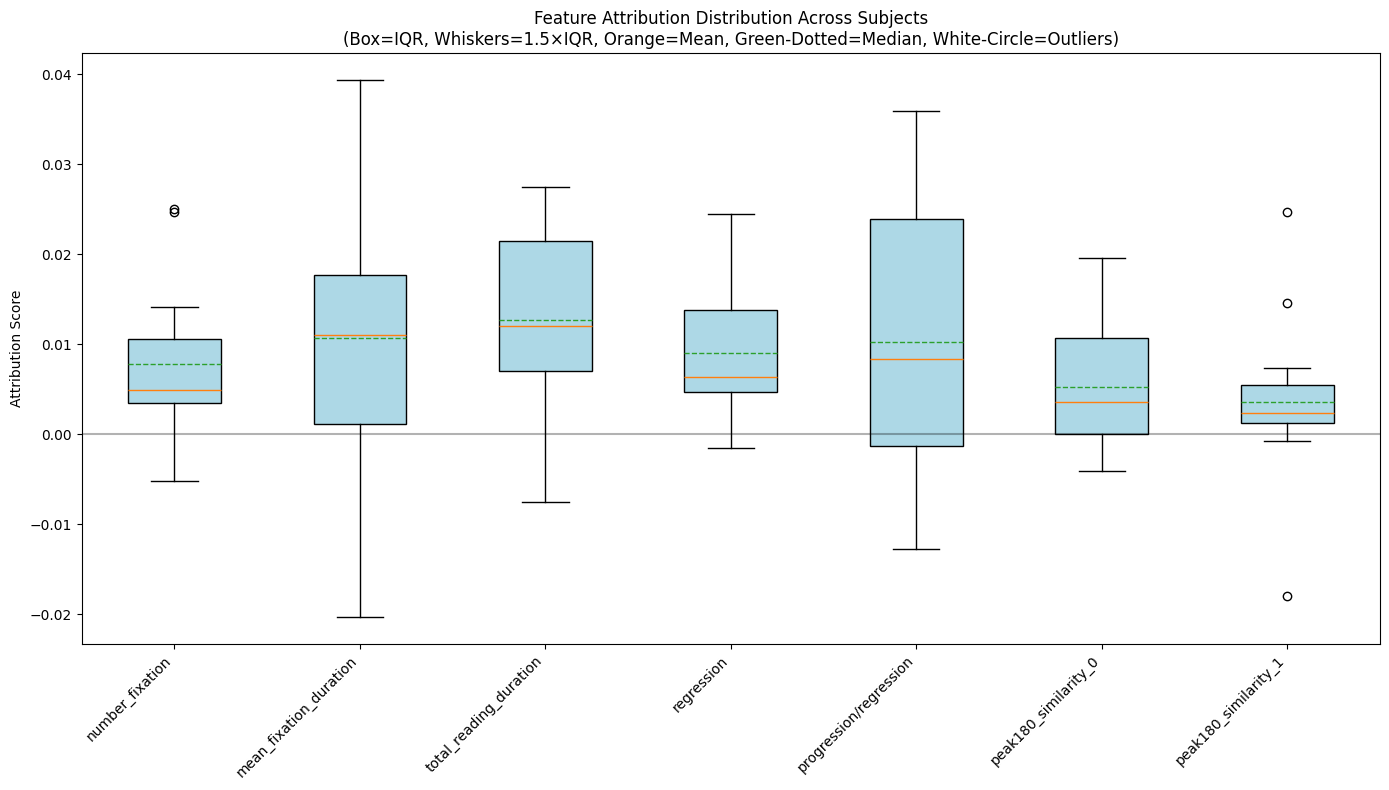


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0078, Std= 0.0082, Min=-0.0052, Max= 0.0250
mean_fixation_duration        : Mean= 0.0107, Std= 0.0140, Min=-0.0203, Max= 0.0394
total_reading_duration        : Mean= 0.0127, Std= 0.0098, Min=-0.0075, Max= 0.0275
regression                    : Mean= 0.0090, Std= 0.0076, Min=-0.0015, Max= 0.0245
progression/regression        : Mean= 0.0103, Std= 0.0157, Min=-0.0128, Max= 0.0359
peak180_similarity_0          : Mean= 0.0053, Std= 0.0072, Min=-0.0041, Max= 0.0196
peak180_similarity_1          : Mean= 0.0036, Std= 0.0089, Min=-0.0179, Max= 0.0247


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "peak180_similarity_0",
    "peak180_similarity_1",
]
plot_attribution(r3, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r3, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

Approximation Error: 9.424835297977552e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


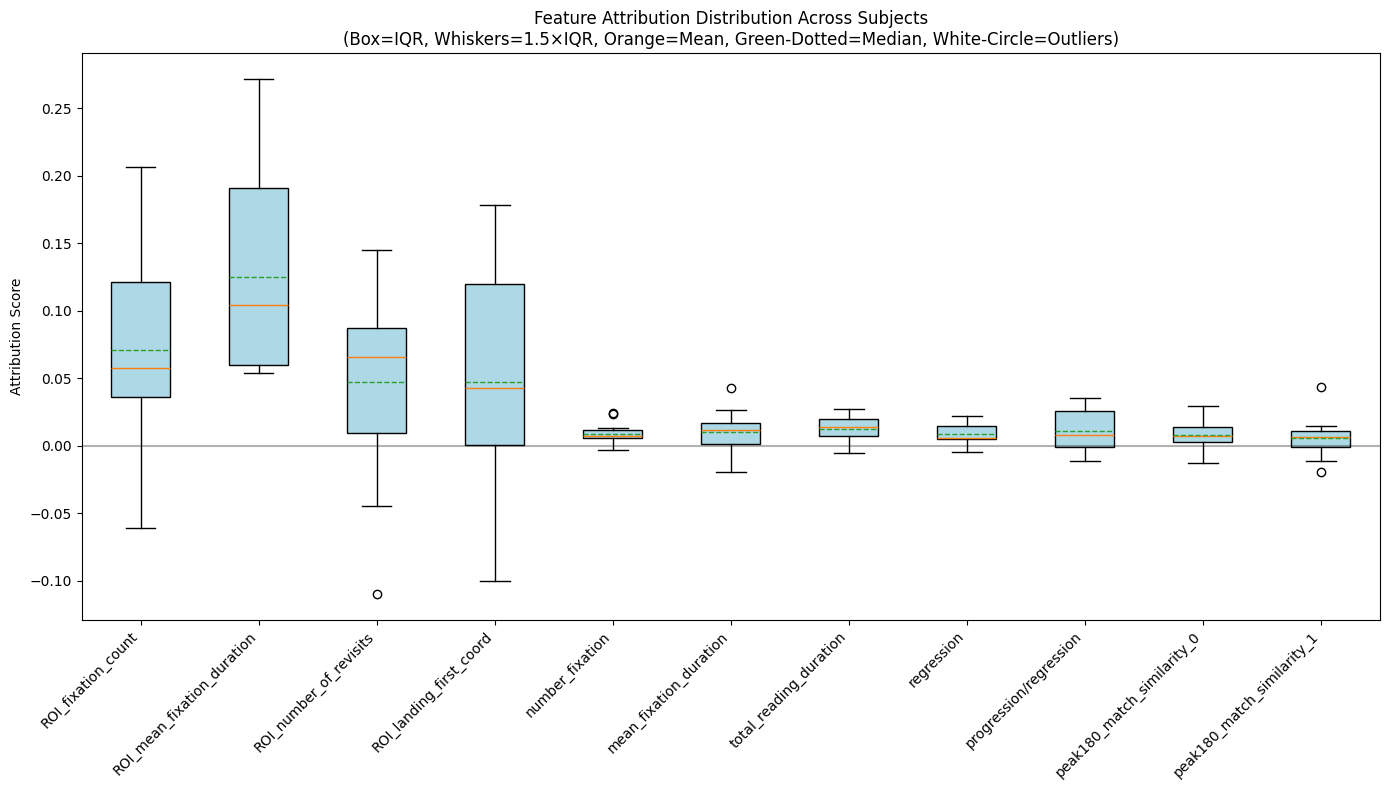


Feature Attribution Summary:
------------------------------------------------------------
ROI_fixation_count            : Mean= 0.0705, Std= 0.0812, Min=-0.0614, Max= 0.2066
ROI_mean_fixation_duration    : Mean= 0.1250, Std= 0.0747, Min= 0.0537, Max= 0.2717
ROI_number_of_revisits        : Mean= 0.0471, Std= 0.0672, Min=-0.1099, Max= 0.1447
ROI_landing_first_coord       : Mean= 0.0472, Std= 0.0835, Min=-0.1001, Max= 0.1781
number_fixation               : Mean= 0.0089, Std= 0.0073, Min=-0.0030, Max= 0.0244
mean_fixation_duration        : Mean= 0.0102, Std= 0.0142, Min=-0.0193, Max= 0.0425
total_reading_duration        : Mean= 0.0126, Std= 0.0092, Min=-0.0053, Max= 0.0272
regression                    : Mean= 0.0087, Std= 0.0070, Min=-0.0045, Max= 0.0216
progression/regression        : Mean= 0.0105, Std= 0.0151, Min=-0.0118, Max= 0.0355
peak180_match_similarity_0    : Mean= 0.0081, Std= 0.0101, Min=-0.0131, Max= 0.0296
peak180_match_similarity_1    : Mean= 0.0058, Std= 0.0141, Min=-0.019

C:\Users\Utente\AppData\Local\Temp\ipykernel_190792\3956322028.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


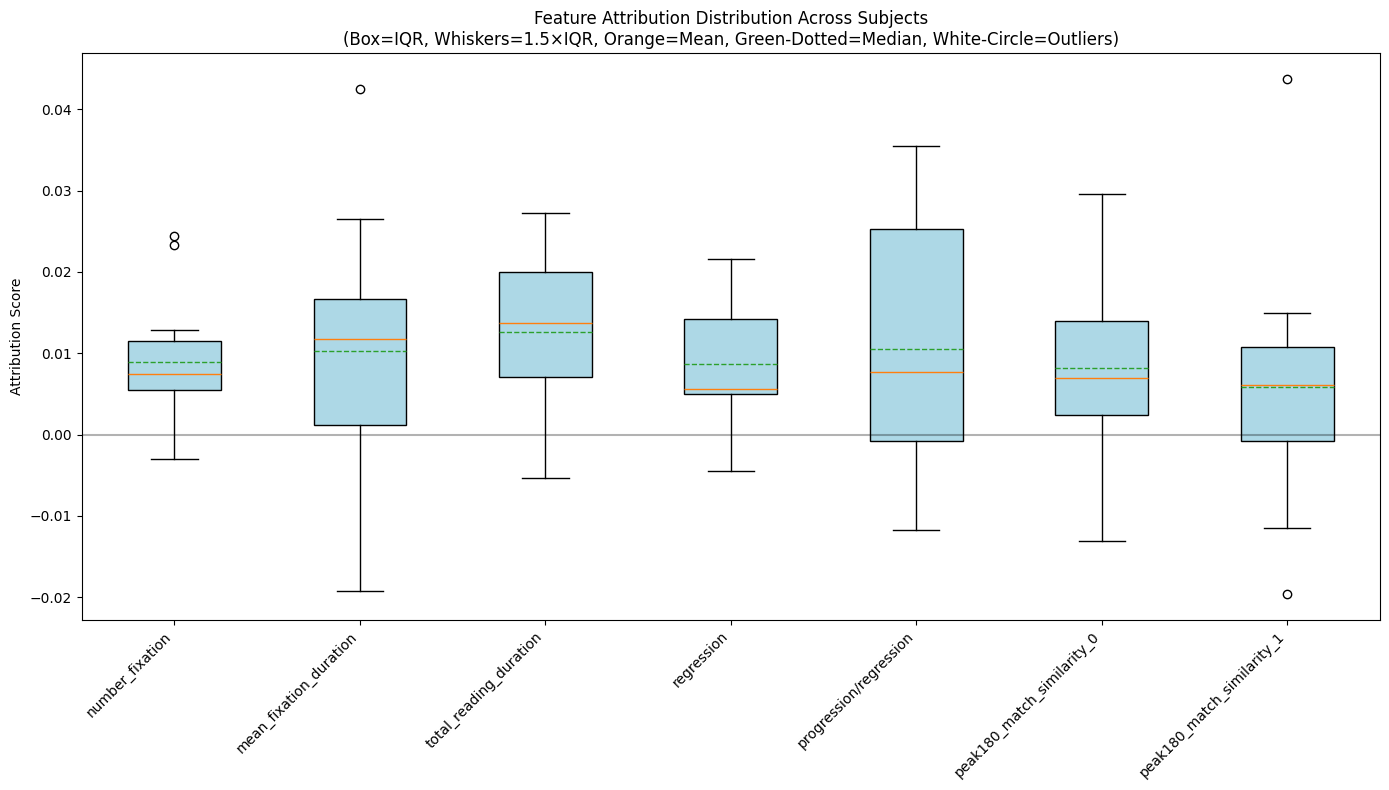


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0089, Std= 0.0073, Min=-0.0030, Max= 0.0244
mean_fixation_duration        : Mean= 0.0102, Std= 0.0142, Min=-0.0193, Max= 0.0425
total_reading_duration        : Mean= 0.0126, Std= 0.0092, Min=-0.0053, Max= 0.0272
regression                    : Mean= 0.0087, Std= 0.0070, Min=-0.0045, Max= 0.0216
progression/regression        : Mean= 0.0105, Std= 0.0151, Min=-0.0118, Max= 0.0355
peak180_match_similarity_0    : Mean= 0.0081, Std= 0.0101, Min=-0.0131, Max= 0.0296
peak180_match_similarity_1    : Mean= 0.0058, Std= 0.0141, Min=-0.0196, Max= 0.0437


In [ ]:
feature_names = [
    "ROI_fixation_count",
    "ROI_mean_fixation_duration",
    "ROI_number_of_revisits",
    "ROI_landing_first_coord",
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "peak180_match_similarity_0",
    "peak180_match_similarity_1",
]
plot_attribution(r4, feature_names, n_rois=90, n_local_ft=4, only_global=False)
plot_attribution(r4, feature_names[4:], n_rois=90, n_local_ft=4, only_global=True)

#### Sixth Test - Original Features + Similarity Measure (Average and Standard Deviation, but without Mean Saccade Amplitude)

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 372))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][359] = Features['number_fixation']
        vector_roi[subj][360] = Features['mean_saccade_amplitude']
        vector_roi[subj][361] = Features['std_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['std_fixation_duration']
        vector_roi[subj][364] = Features['total_reading_duration']
        vector_roi[subj][365] = Features['regression']
        vector_roi[subj][366] = Features['progression/regression']
        vector_roi[subj][367] = Features['fixation_entropy']
        vector_roi[subj][368] = SimsVals[subj][0][0][0] 
        vector_roi[subj][369] = SimsVals[subj][0][0][1]
        vector_roi[subj][370] = SimsVals[subj][0][0][2] 
        vector_roi[subj][371] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(372, 186)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(186, 93)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(93, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6839805245399475
Epoch 5 loss: 0.39954811334609985
Epoch 10 loss: 0.32899215817451477
Epoch 15 loss: 0.3150494396686554
Epoch 0 loss: 0.7108755707740784
Epoch 5 loss: 0.4594421982765198
Epoch 10 loss: 0.3440859615802765
Epoch 15 loss: 0.3141469955444336
Epoch 0 loss: 0.7450230717658997
Epoch 5 loss: 0.4428107738494873
Epoch 10 loss: 0.33307451009750366
Epoch 15 loss: 0.3154987692832947
Epoch 0 loss: 0.6971968412399292
Epoch 5 loss: 0.4041437804698944
Epoch 10 loss: 0.3403577208518982
Epoch 15 loss: 0.3214757740497589
Epoch 0 loss: 0.7316243052482605
Epoch 5 loss: 0.4155689775943756
Epoch 10 loss: 0.31976571679115295
Epoch 15 loss: 0.3136970102787018
Average accuracy: 0.8714285714285716
Standard deviation: 0.11428571428571428
Total confusion matrix:
[[30.  5.]
 [ 4. 31.]]
False positives: 5.0
False negatives: 4.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.683606982231140

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
r1=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
r2=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
r3=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
r4=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6839805245399475
Epoch 5 loss: 0.4327665865421295
Epoch 10 loss: 0.36281251907348633
Epoch 15 loss: 0.33304521441459656
Epoch 0 loss: 0.7108755707740784
Epoch 5 loss: 0.49642881751060486
Epoch 10 loss: 0.3863705098628998
Epoch 15 loss: 0.3282806873321533
Epoch 0 loss: 0.7450230717658997
Epoch 5 loss: 0.48258548974990845
Epoch 10 loss: 0.3688298761844635
Epoch 15 loss: 0.3360374867916107
Epoch 0 loss: 0.6971968412399292
Epoch 5 loss: 0.43921953439712524
Epoch 10 loss: 0.372873455286026
Epoch 15 loss: 0.3450157642364502
Epoch 0 loss: 0.7316243052482605
Epoch 5 loss: 0.45451292395591736
Epoch 10 loss: 0.35533738136291504
Epoch 15 loss: 0.32804542779922485
Average accuracy: 0.8428571428571429
Standard deviation: 0.1456862718169367
Total confusion matrix:
[[29.  6.]
 [ 5. 30.]]
False positives: 6.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.6836069822311

#### Last Test - All Features

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 373))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['std_saccade_amplitude']
        vector_roi[subj][363] = Features['mean_fixation_duration']
        vector_roi[subj][364] = Features['std_fixation_duration']
        vector_roi[subj][365] = Features['total_reading_duration']
        vector_roi[subj][366] = Features['regression']
        vector_roi[subj][367] = Features['progression/regression']
        vector_roi[subj][368] = Features['fixation_entropy']
        vector_roi[subj][369] = SimsVals[subj][0][0][0] 
        vector_roi[subj][370] = SimsVals[subj][0][0][1]
        vector_roi[subj][371] = SimsVals[subj][0][0][2] 
        vector_roi[subj][372] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(373, 187)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(187, 94)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(94, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.674537181854248
Epoch 5 loss: 0.40734249353408813
Epoch 10 loss: 0.32094621658325195
Epoch 15 loss: 0.3148271441459656
Epoch 0 loss: 0.7332841157913208
Epoch 5 loss: 0.4800128638744354
Epoch 10 loss: 0.3482448160648346
Epoch 15 loss: 0.31914177536964417
Epoch 0 loss: 0.7239794731140137
Epoch 5 loss: 0.3849654197692871
Epoch 10 loss: 0.3270835876464844
Epoch 15 loss: 0.31378287076950073
Epoch 0 loss: 0.750365674495697
Epoch 5 loss: 0.4075693190097809
Epoch 10 loss: 0.3347587585449219
Epoch 15 loss: 0.331592321395874
Epoch 0 loss: 0.7096362709999084
Epoch 5 loss: 0.43846431374549866
Epoch 10 loss: 0.331001341342926
Epoch 15 loss: 0.316173791885376
Average accuracy: 0.8428571428571427
Standard deviation: 0.09476070829586856
Total confusion matrix:
[[29.  6.]
 [ 5. 30.]]
False positives: 6.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.6748843789100647
Ep

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
_=run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
_=run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.674537181854248
Epoch 5 loss: 0.4488830268383026
Epoch 10 loss: 0.34554508328437805
Epoch 15 loss: 0.32447686791419983
Epoch 0 loss: 0.7332841157913208
Epoch 5 loss: 0.5212292075157166
Epoch 10 loss: 0.38983631134033203
Epoch 15 loss: 0.34109553694725037
Epoch 0 loss: 0.7239794731140137
Epoch 5 loss: 0.4177919030189514
Epoch 10 loss: 0.35122019052505493
Epoch 15 loss: 0.32246580719947815
Epoch 0 loss: 0.750365674495697
Epoch 5 loss: 0.44726482033729553
Epoch 10 loss: 0.35101938247680664
Epoch 15 loss: 0.3390350043773651
Epoch 0 loss: 0.7096362709999084
Epoch 5 loss: 0.47986099123954773
Epoch 10 loss: 0.3672284185886383
Epoch 15 loss: 0.33469125628471375
Average accuracy: 0.8285714285714285
Standard deviation: 0.1324802642213672
Total confusion matrix:
[[28.  7.]
 [ 5. 30.]]
False positives: 7.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.674884378910

---

## Task 2 and Task 3

#### First Test - Original Features

In [13]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, _ = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 406))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_fixation_duration']
        vector_roi[subj][402] = Features['total_reading_duration']
        vector_roi[subj][403] = Features['mean_saccade_amplitude']
        vector_roi[subj][404] = Features['regression']
        vector_roi[subj][405] = Features['progression/regression']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [14]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(406, 203)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(203, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [15]:
def run_test(stim, glob_feature, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)

    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [ ]:
print("Task 1  (momentum=0.8):")
run_test(1, GlobalFeature_arrays[1])
print("Task 1  (momentum=0.5):")
run_test(1, GlobalFeature_arrays[1], momentum=0.5)

Task 1  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.6776185035705566
Epoch 5 loss: 0.42668530344963074
Epoch 10 loss: 0.3231607973575592
Epoch 15 loss: 0.31590598821640015
Epoch 0 loss: 0.6976766586303711
Epoch 5 loss: 0.4610789120197296
Epoch 10 loss: 0.3356412947177887
Epoch 15 loss: 0.3190266191959381
Epoch 0 loss: 0.7875522971153259
Epoch 5 loss: 0.45056986808776855
Epoch 10 loss: 0.33190611004829407
Epoch 15 loss: 0.31391921639442444
Epoch 0 loss: 0.6891302466392517
Epoch 5 loss: 0.44710949063301086
Epoch 10 loss: 0.3284843862056732
Epoch 15 loss: 0.3151308596134186
Epoch 0 loss: 0.7149211764335632
Epoch 5 loss: 0.3941482901573181
Epoch 10 loss: 0.3223595917224884
Epoch 15 loss: 0.320951908826828
Average accuracy: 0.9285714285714285
Standard deviation: 0.09035079029052513
Total confusion matrix:
[[33.  2.]
 [ 3. 32.]]
False positives: 2.0
False negatives: 3.0
Task 1  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.6776185035705566
Epoch 5 loss: 0.46694159507751465
Epoch 

In [ ]:
print("Task 2  (momentum=0.8):")
run_test(2, GlobalFeature_arrays[2])
print("Task 2  (momentum=0.5):")
run_test(2, GlobalFeature_arrays[2], momentum=0.5)

Task 2  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.658878743648529
Epoch 5 loss: 0.40098491311073303
Epoch 10 loss: 0.32347288727760315
Epoch 15 loss: 0.3144230246543884
Epoch 0 loss: 0.7155347466468811
Epoch 5 loss: 0.4569001793861389
Epoch 10 loss: 0.3378913998603821
Epoch 15 loss: 0.3186623156070709
Epoch 0 loss: 0.7886418700218201
Epoch 5 loss: 0.40782660245895386
Epoch 10 loss: 0.3231256306171417
Epoch 15 loss: 0.3134722113609314
Epoch 0 loss: 0.6802528500556946
Epoch 5 loss: 0.4525275230407715
Epoch 10 loss: 0.33031579852104187
Epoch 15 loss: 0.3160386085510254
Epoch 0 loss: 0.7262266874313354
Epoch 5 loss: 0.41399654746055603
Epoch 10 loss: 0.3345986008644104
Epoch 15 loss: 0.3150331974029541
Average accuracy: 0.8285714285714286
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[28.  7.]
 [ 5. 30.]]
False positives: 7.0
False negatives: 5.0
Task 2  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.658878743648529
Epoch 5 loss: 0.4377555251121521
Epoch 10 

#### Second Test - Original and Additional Features

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, _ = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 410))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][401] = Features['number_fixation']
        vector_roi[subj][402] = Features['mean_saccade_amplitude']
        vector_roi[subj][403] = Features['std_saccade_amplitude']
        vector_roi[subj][404] = Features['mean_fixation_duration']
        vector_roi[subj][405] = Features['std_fixation_duration']
        vector_roi[subj][406] = Features['total_reading_duration']
        vector_roi[subj][407] = Features['regression']
        vector_roi[subj][408] = Features['progression/regression']
        vector_roi[subj][409] = Features['fixation_entropy']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(410, 205)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(205, 103)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(103, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
print("Task 1  (momentum=0.8):")
run_test(1, GlobalFeature_arrays[1])
print("Task 1  (momentum=0.5):")
run_test(1, GlobalFeature_arrays[1], momentum=0.5)

Task 1  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.7012428641319275
Epoch 5 loss: 0.41442158818244934
Epoch 10 loss: 0.3387365937232971
Epoch 15 loss: 0.32406195998191833
Epoch 0 loss: 0.7254723906517029
Epoch 5 loss: 0.46885475516319275
Epoch 10 loss: 0.3464008867740631
Epoch 15 loss: 0.3204529285430908
Epoch 0 loss: 0.6842478513717651
Epoch 5 loss: 0.3902015686035156
Epoch 10 loss: 0.3341287076473236
Epoch 15 loss: 0.3169715404510498
Epoch 0 loss: 0.7399515509605408
Epoch 5 loss: 0.435066282749176
Epoch 10 loss: 0.3195982873439789
Epoch 15 loss: 0.31992053985595703
Epoch 0 loss: 0.6620532274246216
Epoch 5 loss: 0.42195838689804077
Epoch 10 loss: 0.33707544207572937
Epoch 15 loss: 0.3179689347743988
Average accuracy: 0.8571428571428571
Standard deviation: 0.07824607964359517
Total confusion matrix:
[[33.  2.]
 [ 8. 27.]]
False positives: 2.0
False negatives: 8.0
Task 1  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.7012428641319275
Epoch 5 loss: 0.45537057518959045
Epoch 

In [ ]:
print("Task 2  (momentum=0.8):")
run_test(2, GlobalFeature_arrays[2])
print("Task 2  (momentum=0.5):")
run_test(2, GlobalFeature_arrays[2], momentum=0.5)

Task 2  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.7078171372413635
Epoch 5 loss: 0.4057348668575287
Epoch 10 loss: 0.33609309792518616
Epoch 15 loss: 0.3214377760887146
Epoch 0 loss: 0.7080500721931458
Epoch 5 loss: 0.43435171246528625
Epoch 10 loss: 0.3465792238712311
Epoch 15 loss: 0.3274844288825989
Epoch 0 loss: 0.676122784614563
Epoch 5 loss: 0.3854614794254303
Epoch 10 loss: 0.3313845694065094
Epoch 15 loss: 0.3154796063899994
Epoch 0 loss: 0.6909675598144531
Epoch 5 loss: 0.4341519773006439
Epoch 10 loss: 0.3492743968963623
Epoch 15 loss: 0.3181726038455963
Epoch 0 loss: 0.6952552795410156
Epoch 5 loss: 0.4496171474456787
Epoch 10 loss: 0.3405328392982483
Epoch 15 loss: 0.31468766927719116
Average accuracy: 0.8142857142857143
Standard deviation: 0.13248026422136722
Total confusion matrix:
[[29.  6.]
 [ 7. 28.]]
False positives: 6.0
False negatives: 7.0
Task 2  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.7078171372413635
Epoch 5 loss: 0.4361553192138672
Epoch 10 l

#### Third Test - Original Features + Similarity Measure (Average)

In [13]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 408))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_saccade_amplitude']
        vector_roi[subj][402] = Features['mean_fixation_duration']
        vector_roi[subj][403] = Features['total_reading_duration']
        vector_roi[subj][404] = Features['regression']
        vector_roi[subj][405] = Features['progression/regression']
        vector_roi[subj][406] = SimsVals[subj][0][0][0] 
        vector_roi[subj][407] = SimsVals[subj][0][0][1]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [14]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(408, 204)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(204, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [15]:
def run_test(stim, method, glob_feature, thr=0, match=False, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
        
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, method=method,Thr=thr, match=match, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, method=method, Thr=thr, match=match, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7356953024864197
Epoch 5 loss: 0.45457229018211365
Epoch 10 loss: 0.33569836616516113
Epoch 15 loss: 0.31565341353416443
Epoch 0 loss: 0.7227458357810974
Epoch 5 loss: 0.42921969294548035
Epoch 10 loss: 0.3223302662372589
Epoch 15 loss: 0.31660982966423035
Epoch 0 loss: 0.7506752014160156
Epoch 5 loss: 0.3959800601005554
Epoch 10 loss: 0.325014591217041
Epoch 15 loss: 0.3137114346027374
Epoch 0 loss: 0.6772388815879822
Epoch 5 loss: 0.44892337918281555
Epoch 10 loss: 0.32728180289268494
Epoch 15 loss: 0.31509527564048767
Epoch 0 loss: 0.6930109262466431
Epoch 5 loss: 0.4017047882080078
Epoch 10 loss: 0.32365867495536804
Epoch 15 loss: 0.3165956437587738
Average accuracy: 0.8571428571428571
Standard deviation: 0.06388765649999402
Total confusion matrix:
[[32.  3.]
 [ 7. 28.]]
False positives: 3.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.73570007085

In [ ]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7356953024864197
Epoch 5 loss: 0.4928271174430847
Epoch 10 loss: 0.39163365960121155
Epoch 15 loss: 0.3412759304046631
Epoch 0 loss: 0.7227458357810974
Epoch 5 loss: 0.47080665826797485
Epoch 10 loss: 0.3554990887641907
Epoch 15 loss: 0.3413366973400116
Epoch 0 loss: 0.7506752014160156
Epoch 5 loss: 0.4354252815246582
Epoch 10 loss: 0.35104432702064514
Epoch 15 loss: 0.3241520822048187
Epoch 0 loss: 0.6772388815879822
Epoch 5 loss: 0.4796835482120514
Epoch 10 loss: 0.36029356718063354
Epoch 15 loss: 0.33445996046066284
Epoch 0 loss: 0.6930109262466431
Epoch 5 loss: 0.4352538287639618
Epoch 10 loss: 0.3548159897327423
Epoch 15 loss: 0.34439951181411743
Average accuracy: 0.8571428571428571
Standard deviation: 0.09035079029052513
Total confusion matrix:
[[31.  4.]
 [ 6. 29.]]
False positives: 4.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
E

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7350316643714905
Epoch 5 loss: 0.4604898989200592
Epoch 10 loss: 0.3404412269592285
Epoch 15 loss: 0.32851913571357727
Epoch 0 loss: 0.7153964638710022
Epoch 5 loss: 0.4109949469566345
Epoch 10 loss: 0.3397054970264435
Epoch 15 loss: 0.321870893239975
Epoch 0 loss: 0.7413808107376099
Epoch 5 loss: 0.40507206320762634
Epoch 10 loss: 0.326657235622406
Epoch 15 loss: 0.3138897716999054
Epoch 0 loss: 0.6796501874923706
Epoch 5 loss: 0.4005887806415558
Epoch 10 loss: 0.33182263374328613
Epoch 15 loss: 0.31516095995903015
Epoch 0 loss: 0.7126724123954773
Epoch 5 loss: 0.42481571435928345
Epoch 10 loss: 0.35406121611595154
Epoch 15 loss: 0.3277422785758972
Average accuracy: 0.8142857142857143
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[29.  6.]
 [ 7. 28.]]
False positives: 6.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.736605942249298

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7350316643714905
Epoch 5 loss: 0.4939611554145813
Epoch 10 loss: 0.38227733969688416
Epoch 15 loss: 0.34547632932662964
Epoch 0 loss: 0.7153964638710022
Epoch 5 loss: 0.44744399189949036
Epoch 10 loss: 0.3592102825641632
Epoch 15 loss: 0.3445228636264801
Epoch 0 loss: 0.7413808107376099
Epoch 5 loss: 0.4509933292865753
Epoch 10 loss: 0.3630383312702179
Epoch 15 loss: 0.3282059133052826
Epoch 0 loss: 0.6796501874923706
Epoch 5 loss: 0.43175819516181946
Epoch 10 loss: 0.3552987277507782
Epoch 15 loss: 0.32990798354148865
Epoch 0 loss: 0.7126724123954773
Epoch 5 loss: 0.4604826867580414
Epoch 10 loss: 0.3891759514808655
Epoch 15 loss: 0.3471686542034149
Average accuracy: 0.8285714285714286
Standard deviation: 0.1324802642213672
Total confusion matrix:
[[30.  5.]
 [ 7. 28.]]
False positives: 5.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.736605942249298

#### Fourth Test - Original Features + Similarity Measure (Average and Standard Deviation)

In [ ]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 410))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_saccade_amplitude']
        vector_roi[subj][402] = Features['mean_fixation_duration']
        vector_roi[subj][403] = Features['total_reading_duration']
        vector_roi[subj][404] = Features['regression']
        vector_roi[subj][405] = Features['progression/regression']
        vector_roi[subj][406] = SimsVals[subj][0][0][0] 
        vector_roi[subj][407] = SimsVals[subj][0][0][1]
        vector_roi[subj][408] = SimsVals[subj][0][0][2]
        vector_roi[subj][409] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(408, 204)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(204, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(410, 205)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(205, 103)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(103, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6902850270271301
Epoch 5 loss: 0.42120715975761414
Epoch 10 loss: 0.3476193845272064
Epoch 15 loss: 0.3244335949420929
Epoch 0 loss: 0.7444642186164856
Epoch 5 loss: 0.4552640914916992
Epoch 10 loss: 0.3343859016895294
Epoch 15 loss: 0.3190162479877472
Epoch 0 loss: 0.7040570378303528
Epoch 5 loss: 0.3981224596500397
Epoch 10 loss: 0.33532094955444336
Epoch 15 loss: 0.3188609182834625
Epoch 0 loss: 0.7432899475097656
Epoch 5 loss: 0.43523842096328735
Epoch 10 loss: 0.31918928027153015
Epoch 15 loss: 0.3179593086242676
Epoch 0 loss: 0.6637240052223206
Epoch 5 loss: 0.42394787073135376
Epoch 10 loss: 0.33562421798706055
Epoch 15 loss: 0.31633251905441284
Average accuracy: 0.8857142857142858
Standard deviation: 0.07284313590846837
Total confusion matrix:
[[33.  2.]
 [ 6. 29.]]
False positives: 2.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.690577626228

In [ ]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.6902850270271301
Epoch 5 loss: 0.459658682346344
Epoch 10 loss: 0.3804038465023041
Epoch 15 loss: 0.3565366566181183
Epoch 0 loss: 0.7444642186164856
Epoch 5 loss: 0.49796709418296814
Epoch 10 loss: 0.3774559795856476
Epoch 15 loss: 0.34954434633255005
Epoch 0 loss: 0.7040570378303528
Epoch 5 loss: 0.4248383343219757
Epoch 10 loss: 0.3578179180622101
Epoch 15 loss: 0.3356558382511139
Epoch 0 loss: 0.7432899475097656
Epoch 5 loss: 0.4729054868221283
Epoch 10 loss: 0.34815385937690735
Epoch 15 loss: 0.3322542607784271
Epoch 0 loss: 0.6637240052223206
Epoch 5 loss: 0.462399959564209
Epoch 10 loss: 0.3749253749847412
Epoch 15 loss: 0.3438933193683624
Average accuracy: 0.8857142857142858
Standard deviation: 0.07284313590846837
Total confusion matrix:
[[33.  2.]
 [ 6. 29.]]
False positives: 2.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoch 

In [ ]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7023297548294067
Epoch 5 loss: 0.40645846724510193
Epoch 10 loss: 0.3337710201740265
Epoch 15 loss: 0.3224119544029236
Epoch 0 loss: 0.7159985303878784
Epoch 5 loss: 0.42832639813423157
Epoch 10 loss: 0.3510320484638214
Epoch 15 loss: 0.33217382431030273
Epoch 0 loss: 0.694678008556366
Epoch 5 loss: 0.3962559998035431
Epoch 10 loss: 0.3324102759361267
Epoch 15 loss: 0.3159317374229431
Epoch 0 loss: 0.7016255259513855
Epoch 5 loss: 0.44257721304893494
Epoch 10 loss: 0.344344824552536
Epoch 15 loss: 0.3155929744243622
Epoch 0 loss: 0.6956518888473511
Epoch 5 loss: 0.4565928280353546
Epoch 10 loss: 0.3310093879699707
Epoch 15 loss: 0.31480860710144043
Average accuracy: 0.8285714285714285
Standard deviation: 0.10690449676496974
Total confusion matrix:
[[31.  4.]
 [ 8. 27.]]
False positives: 4.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7023963928222656

In [ ]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7023297548294067
Epoch 5 loss: 0.4434390068054199
Epoch 10 loss: 0.3611622750759125
Epoch 15 loss: 0.3437349498271942
Epoch 0 loss: 0.7159985303878784
Epoch 5 loss: 0.4631763994693756
Epoch 10 loss: 0.38327670097351074
Epoch 15 loss: 0.34767061471939087
Epoch 0 loss: 0.694678008556366
Epoch 5 loss: 0.4308130145072937
Epoch 10 loss: 0.35683101415634155
Epoch 15 loss: 0.3322954773902893
Epoch 0 loss: 0.7016255259513855
Epoch 5 loss: 0.46341472864151
Epoch 10 loss: 0.37016627192497253
Epoch 15 loss: 0.33666038513183594
Epoch 0 loss: 0.6956518888473511
Epoch 5 loss: 0.4932839572429657
Epoch 10 loss: 0.36307698488235474
Epoch 15 loss: 0.3340313732624054
Average accuracy: 0.8142857142857143
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[30.  5.]
 [ 8. 27.]]
False positives: 5.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoc

#### Fifth Test - Original Features + Similarity Measure (Without Mean Saccade Amplitude)

In [16]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 407))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_fixation_duration']
        vector_roi[subj][402] = Features['total_reading_duration']
        vector_roi[subj][403] = Features['regression']
        vector_roi[subj][404] = Features['progression/regression']
        vector_roi[subj][405] = SimsVals[subj][0][0][0] 
        vector_roi[subj][406] = SimsVals[subj][0][0][1]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [17]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(407, 204)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(204, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [18]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.760590672492981
Epoch 5 loss: 0.4328170716762543
Epoch 10 loss: 0.3228028118610382
Epoch 15 loss: 0.3153432309627533
Epoch 0 loss: 0.7482062578201294
Epoch 5 loss: 0.4566078782081604
Epoch 10 loss: 0.3195176124572754
Epoch 15 loss: 0.32096943259239197
Epoch 0 loss: 0.6878276467323303
Epoch 5 loss: 0.42269468307495117
Epoch 10 loss: 0.31716302037239075
Epoch 15 loss: 0.3163444697856903
Epoch 0 loss: 0.7560930252075195
Epoch 5 loss: 0.4205823540687561
Epoch 10 loss: 0.32926103472709656
Epoch 15 loss: 0.3149004876613617
Epoch 0 loss: 0.6890255808830261
Epoch 5 loss: 0.4357907474040985
Epoch 10 loss: 0.33992499113082886
Epoch 15 loss: 0.3204294741153717
Average accuracy: 0.8714285714285713
Standard deviation: 0.0534522483824849
Total confusion matrix:
[[33.  2.]
 [ 7. 28.]]
False positives: 2.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7616878747940063

In [19]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.760590672492981
Epoch 5 loss: 0.4866645038127899
Epoch 10 loss: 0.3567838668823242
Epoch 15 loss: 0.3347960114479065
Epoch 0 loss: 0.7482062578201294
Epoch 5 loss: 0.5047906041145325
Epoch 10 loss: 0.3595140278339386
Epoch 15 loss: 0.3410642147064209
Epoch 0 loss: 0.6878276467323303
Epoch 5 loss: 0.46317940950393677
Epoch 10 loss: 0.344064861536026
Epoch 15 loss: 0.33900952339172363
Epoch 0 loss: 0.7560930252075195
Epoch 5 loss: 0.44552871584892273
Epoch 10 loss: 0.3533514142036438
Epoch 15 loss: 0.32753896713256836
Epoch 0 loss: 0.6890255808830261
Epoch 5 loss: 0.4730428159236908
Epoch 10 loss: 0.3795470893383026
Epoch 15 loss: 0.3530738353729248
Average accuracy: 0.8857142857142858
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[34.  1.]
 [ 7. 28.]]
False positives: 1.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoch 

In [20]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7442259192466736
Epoch 5 loss: 0.43275579810142517
Epoch 10 loss: 0.3291529715061188
Epoch 15 loss: 0.31827932596206665
Epoch 0 loss: 0.708006739616394
Epoch 5 loss: 0.49799540638923645
Epoch 10 loss: 0.3521650731563568
Epoch 15 loss: 0.3239062428474426
Epoch 0 loss: 0.7107791900634766
Epoch 5 loss: 0.4103125035762787
Epoch 10 loss: 0.3167407512664795
Epoch 15 loss: 0.3157396614551544
Epoch 0 loss: 0.7134298086166382
Epoch 5 loss: 0.4152688682079315
Epoch 10 loss: 0.3340197503566742
Epoch 15 loss: 0.331752210855484
Epoch 0 loss: 0.6885989308357239
Epoch 5 loss: 0.4311254918575287
Epoch 10 loss: 0.3195943832397461
Epoch 15 loss: 0.3197217285633087
Average accuracy: 0.8571428571428571
Standard deviation: 0.04517539514526258
Total confusion matrix:
[[31.  4.]
 [ 6. 29.]]
False positives: 4.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7457379698753357
E

In [21]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7442259192466736
Epoch 5 loss: 0.47985386848449707
Epoch 10 loss: 0.35610607266426086
Epoch 15 loss: 0.3509505093097687
Epoch 0 loss: 0.708006739616394
Epoch 5 loss: 0.5354767441749573
Epoch 10 loss: 0.3978676199913025
Epoch 15 loss: 0.35919156670570374
Epoch 0 loss: 0.7107791900634766
Epoch 5 loss: 0.4482707381248474
Epoch 10 loss: 0.34360650181770325
Epoch 15 loss: 0.32850900292396545
Epoch 0 loss: 0.7134298086166382
Epoch 5 loss: 0.4472905695438385
Epoch 10 loss: 0.36156120896339417
Epoch 15 loss: 0.33393096923828125
Epoch 0 loss: 0.6885989308357239
Epoch 5 loss: 0.4775822162628174
Epoch 10 loss: 0.3566107749938965
Epoch 15 loss: 0.347008615732193
Average accuracy: 0.8857142857142858
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[33.  2.]
 [ 6. 29.]]
False positives: 2.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epo

#### Sixth Test - Original Features + Similarity Measure (Average and Standard Deviation, but without Mean Saccade Amplitude)

In [22]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 409))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_fixation_duration']
        vector_roi[subj][402] = Features['total_reading_duration']
        vector_roi[subj][403] = Features['regression']
        vector_roi[subj][404] = Features['progression/regression']
        vector_roi[subj][405] = SimsVals[subj][0][0][0] 
        vector_roi[subj][406] = SimsVals[subj][0][0][1]
        vector_roi[subj][407] = SimsVals[subj][0][0][2]
        vector_roi[subj][408] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [23]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(409, 205)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(205, 103)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(103, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [24]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6811966300010681
Epoch 5 loss: 0.41526538133621216
Epoch 10 loss: 0.3346422612667084
Epoch 15 loss: 0.3152386248111725
Epoch 0 loss: 0.6884580850601196
Epoch 5 loss: 0.48225757479667664
Epoch 10 loss: 0.3419627845287323
Epoch 15 loss: 0.31869930028915405
Epoch 0 loss: 0.7440701723098755
Epoch 5 loss: 0.40852704644203186
Epoch 10 loss: 0.32295897603034973
Epoch 15 loss: 0.31364473700523376
Epoch 0 loss: 0.7305870056152344
Epoch 5 loss: 0.4162321090698242
Epoch 10 loss: 0.3281203806400299
Epoch 15 loss: 0.32357415556907654
Epoch 0 loss: 0.705988347530365
Epoch 5 loss: 0.4546603560447693
Epoch 10 loss: 0.3342150151729584
Epoch 15 loss: 0.31649160385131836
Average accuracy: 0.8142857142857143
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[31.  4.]
 [ 9. 26.]]
False positives: 4.0
False negatives: 9.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.678948462009

In [25]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.6811966300010681
Epoch 5 loss: 0.4530008137226105
Epoch 10 loss: 0.38206157088279724
Epoch 15 loss: 0.3392603099346161
Epoch 0 loss: 0.6884580850601196
Epoch 5 loss: 0.5179041624069214
Epoch 10 loss: 0.39503565430641174
Epoch 15 loss: 0.34868478775024414
Epoch 0 loss: 0.7440701723098755
Epoch 5 loss: 0.4510824978351593
Epoch 10 loss: 0.351353257894516
Epoch 15 loss: 0.32078132033348083
Epoch 0 loss: 0.7305870056152344
Epoch 5 loss: 0.45478391647338867
Epoch 10 loss: 0.36350017786026
Epoch 15 loss: 0.33576083183288574
Epoch 0 loss: 0.705988347530365
Epoch 5 loss: 0.48308590054512024
Epoch 10 loss: 0.38380351662635803
Epoch 15 loss: 0.349319189786911
Average accuracy: 0.8142857142857143
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[31.  4.]
 [ 9. 26.]]
False positives: 4.0
False negatives: 9.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoc

In [26]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6865070462226868
Epoch 5 loss: 0.43325090408325195
Epoch 10 loss: 0.32154300808906555
Epoch 15 loss: 0.3150147497653961
Epoch 0 loss: 0.7289600968360901
Epoch 5 loss: 0.5079613327980042
Epoch 10 loss: 0.3684523403644562
Epoch 15 loss: 0.3266665041446686
Epoch 0 loss: 0.7491660118103027
Epoch 5 loss: 0.4118002951145172
Epoch 10 loss: 0.3211897909641266
Epoch 15 loss: 0.3161439895629883
Epoch 0 loss: 0.7438644766807556
Epoch 5 loss: 0.4057140350341797
Epoch 10 loss: 0.33502793312072754
Epoch 15 loss: 0.3314692974090576
Epoch 0 loss: 0.6908298134803772
Epoch 5 loss: 0.4472227096557617
Epoch 10 loss: 0.33175405859947205
Epoch 15 loss: 0.3193361461162567
Average accuracy: 0.8
Standard deviation: 0.11428571428571428
Total confusion matrix:
[[29.  6.]
 [ 8. 27.]]
False positives: 6.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.6822465062141418
Epoch 5 loss:

In [27]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.6865070462226868
Epoch 5 loss: 0.4813947379589081
Epoch 10 loss: 0.35656705498695374
Epoch 15 loss: 0.33578380942344666
Epoch 0 loss: 0.7289600968360901
Epoch 5 loss: 0.5462290048599243
Epoch 10 loss: 0.41104692220687866
Epoch 15 loss: 0.3638670742511749
Epoch 0 loss: 0.7491660118103027
Epoch 5 loss: 0.44964462518692017
Epoch 10 loss: 0.3465021252632141
Epoch 15 loss: 0.32538706064224243
Epoch 0 loss: 0.7438644766807556
Epoch 5 loss: 0.43852168321609497
Epoch 10 loss: 0.3522837162017822
Epoch 15 loss: 0.33878040313720703
Epoch 0 loss: 0.6908298134803772
Epoch 5 loss: 0.4759674668312073
Epoch 10 loss: 0.3807651698589325
Epoch 15 loss: 0.33991435170173645
Average accuracy: 0.8285714285714286
Standard deviation: 0.09689042833036098
Total confusion matrix:
[[31.  4.]
 [ 8. 27.]]
False positives: 4.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda

#### Last Test - All Features

---

In [28]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 414))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][401] = Features['number_fixation']
        vector_roi[subj][402] = Features['mean_saccade_amplitude']
        vector_roi[subj][403] = Features['std_saccade_amplitude']
        vector_roi[subj][404] = Features['mean_fixation_duration']
        vector_roi[subj][405] = Features['std_fixation_duration']
        vector_roi[subj][406] = Features['total_reading_duration']
        vector_roi[subj][407] = Features['regression']
        vector_roi[subj][408] = Features['progression/regression']
        vector_roi[subj][409] = Features['fixation_entropy']
        vector_roi[subj][410] = SimsVals[subj][0][0][0] 
        vector_roi[subj][411] = SimsVals[subj][0][0][1]
        vector_roi[subj][412] = SimsVals[subj][0][0][2] 
        vector_roi[subj][413] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [29]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(414, 207)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(207, 104)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(104, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [30]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7486580014228821
Epoch 5 loss: 0.44991347193717957
Epoch 10 loss: 0.3268585801124573
Epoch 15 loss: 0.314526230096817
Epoch 0 loss: 0.6854411363601685
Epoch 5 loss: 0.4588577449321747
Epoch 10 loss: 0.322965532541275
Epoch 15 loss: 0.3159586489200592
Epoch 0 loss: 0.7595940232276917
Epoch 5 loss: 0.4604310989379883
Epoch 10 loss: 0.32425910234451294
Epoch 15 loss: 0.3143117427825928
Epoch 0 loss: 0.6782591938972473
Epoch 5 loss: 0.3991817533969879
Epoch 10 loss: 0.31910109519958496
Epoch 15 loss: 0.31397196650505066
Epoch 0 loss: 0.7655853033065796
Epoch 5 loss: 0.4302493631839752
Epoch 10 loss: 0.34068727493286133
Epoch 15 loss: 0.31500452756881714
Average accuracy: 0.8428571428571429
Standard deviation: 0.06998542122237651
Total confusion matrix:
[[33.  2.]
 [ 9. 26.]]
False positives: 2.0
False negatives: 9.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.750928342342376

In [31]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7486580014228821
Epoch 5 loss: 0.4965877830982208
Epoch 10 loss: 0.3671016991138458
Epoch 15 loss: 0.3280963897705078
Epoch 0 loss: 0.6854411363601685
Epoch 5 loss: 0.50379478931427
Epoch 10 loss: 0.3666313588619232
Epoch 15 loss: 0.3396432101726532
Epoch 0 loss: 0.7595940232276917
Epoch 5 loss: 0.5080885887145996
Epoch 10 loss: 0.35442855954170227
Epoch 15 loss: 0.33039239048957825
Epoch 0 loss: 0.6782591938972473
Epoch 5 loss: 0.4333325922489166
Epoch 10 loss: 0.3527163863182068
Epoch 15 loss: 0.3253619372844696
Epoch 0 loss: 0.7655853033065796
Epoch 5 loss: 0.4700298309326172
Epoch 10 loss: 0.3817465603351593
Epoch 15 loss: 0.3313423693180084
Average accuracy: 0.8428571428571429
Standard deviation: 0.06998542122237651
Total confusion matrix:
[[33.  2.]
 [ 9. 26.]]
False positives: 2.0
False negatives: 9.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoch 0

In [32]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7566386461257935
Epoch 5 loss: 0.458069384098053
Epoch 10 loss: 0.3360646069049835
Epoch 15 loss: 0.3235999643802643
Epoch 0 loss: 0.6915763020515442
Epoch 5 loss: 0.42126011848449707
Epoch 10 loss: 0.3393111228942871
Epoch 15 loss: 0.3188299834728241
Epoch 0 loss: 0.7406315207481384
Epoch 5 loss: 0.4047439992427826
Epoch 10 loss: 0.3197133243083954
Epoch 15 loss: 0.31573495268821716
Epoch 0 loss: 0.624785840511322
Epoch 5 loss: 0.37923485040664673
Epoch 10 loss: 0.33220264315605164
Epoch 15 loss: 0.3317820429801941
Epoch 0 loss: 0.7426342368125916
Epoch 5 loss: 0.4522586464881897
Epoch 10 loss: 0.3313911557197571
Epoch 15 loss: 0.315900057554245
Average accuracy: 0.8285714285714286
Standard deviation: 0.09689042833036098
Total confusion matrix:
[[31.  4.]
 [ 8. 27.]]
False positives: 4.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7537238001823425
E

In [33]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7566386461257935
Epoch 5 loss: 0.5019147992134094
Epoch 10 loss: 0.36114153265953064
Epoch 15 loss: 0.3471885025501251
Epoch 0 loss: 0.6915763020515442
Epoch 5 loss: 0.46404626965522766
Epoch 10 loss: 0.3680086135864258
Epoch 15 loss: 0.34438496828079224
Epoch 0 loss: 0.7406315207481384
Epoch 5 loss: 0.44081926345825195
Epoch 10 loss: 0.33790263533592224
Epoch 15 loss: 0.3413917124271393
Epoch 0 loss: 0.624785840511322
Epoch 5 loss: 0.4160011112689972
Epoch 10 loss: 0.3338271677494049
Epoch 15 loss: 0.32462090253829956
Epoch 0 loss: 0.7426342368125916
Epoch 5 loss: 0.4875952899456024
Epoch 10 loss: 0.37115827202796936
Epoch 15 loss: 0.3376031517982483
Average accuracy: 0.7857142857142858
Standard deviation: 0.16288220358559113
Total confusion matrix:
[[29.  6.]
 [ 9. 26.]]
False positives: 6.0
False negatives: 9.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
E

---

# CNN


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [15]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

def get_data(stim, split_size, batch_size, random_state):
    # Splitting by participants
    subj = FixData['sid'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    Data=FixData[FixData['stimfile']== stim]
    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # Feature selection for each participant
    def extract_features(data):
        features, labels = [], []
        for subj in data['sid'].unique():
            subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y']].values
            features.append(subj_data)
            labels.append(data[data['sid'] == subj]['class_id'].iloc[0])
        return features, labels

    train_features, train_labels = extract_features(train_data)
    test_features, test_labels = extract_features(test_data)

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for axis in range(data.shape[1]):
            c = dct(data[:, axis], type=3, norm='ortho')
            dct_result[:, axis] = np.pad(c, (0, pad_size-len(c)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(coeffs):
        idct_result = np.zeros_like(coeffs)
        for axis in range(coeffs.shape[1]):
            idct_result[:, axis] = idct(coeffs[:, axis], type=3, norm='ortho')
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0) / data.shape[0]

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[1:magnitude.shape[0] // 2]
        return final_data

    pad = max([len(data) for data in train_features + test_features])
    # Apply the pipeline to all participants
    train_features = [data_output(data, pad) for data in train_features]
    test_features = [data_output(data, pad) for data in test_features]

    # Convert to PyTorch tensors
    train_features = torch.tensor(np.array(train_features), dtype=torch.float32)
    test_features = torch.tensor(np.array(test_features), dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [10]:
stimulus = DyslexiaDat.stimuli[0]

Length one channel features: 143


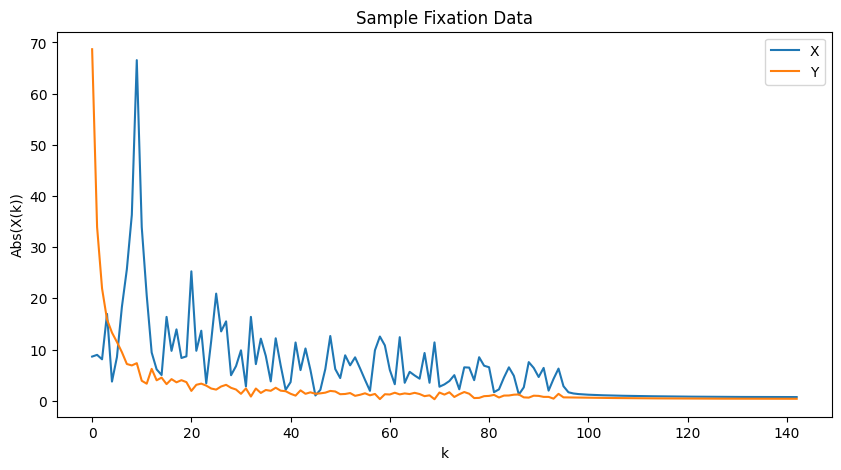

In [404]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42
)

print(f"Length one channel features: {train_features.shape[1]}")

plt.figure(figsize=(10, 5))
plt.plot(train_features[0, :, 0], label='X')
plt.plot(train_features[0, :, 1], label='Y')
plt.xlabel('k')
plt.ylabel('Abs(X(k))')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()


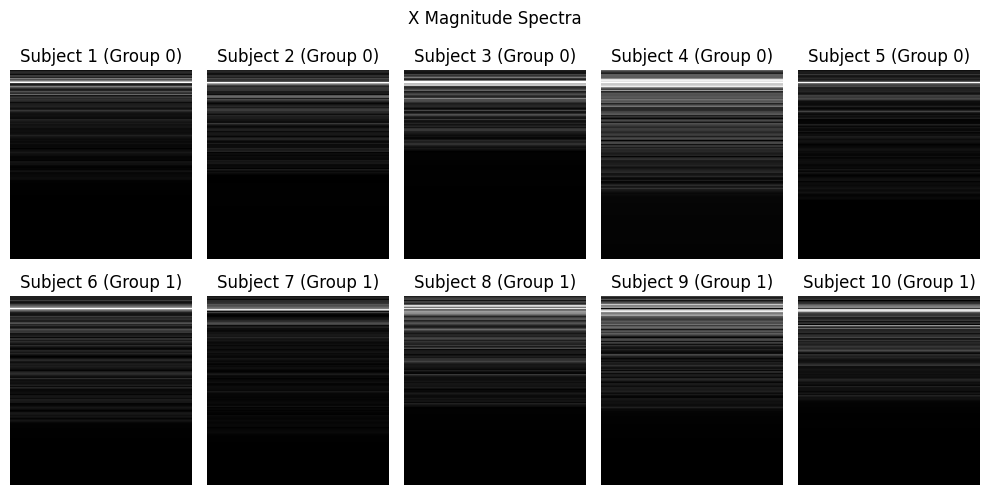

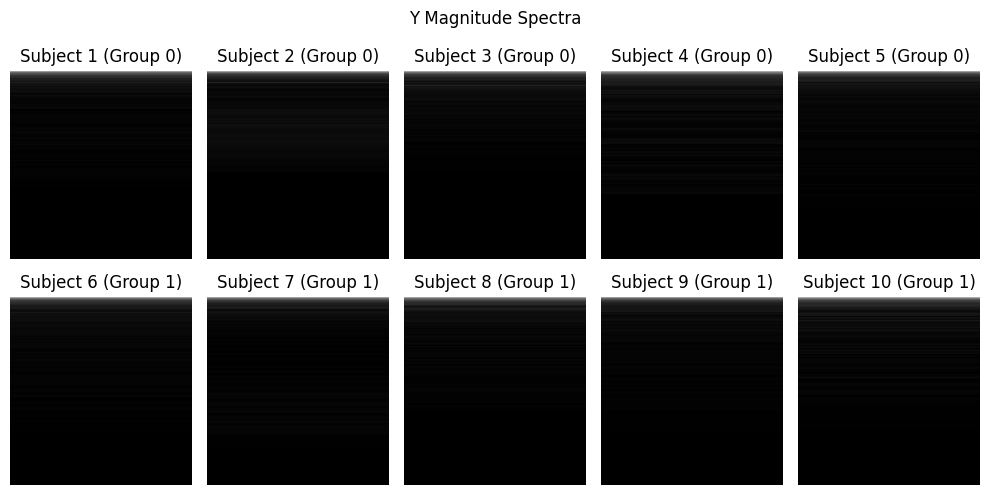

In [405]:
def plot_group_spectra(features, labels, title, channel):
    """
    Plots magnitude spectra for 5 subjects with label 0 vs. 5 subjects with label 1
    in a vertical grayscale heatmap.
    """
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(features[labels.squeeze() == 0][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+1} (Group 0)')
        plt.axis('off')

    for i in range(5):
        plt.subplot(2, 5, i + 6)
        plt.imshow(features[labels.squeeze() == 1][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+6} (Group 1)')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
# Plot for X and Y magnitudes
plot_group_spectra(train_features, train_labels, 'X Magnitude Spectra', channel=0)
plot_group_spectra(train_features, train_labels, 'Y Magnitude Spectra', channel=1)

In [21]:
class CNN(nn.Module):
    def __init__(self, num_classes: int, input_channels: int = 2, input_length: int = 248,
                 hidden_fc: int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    def forward(self, x):
        if x.shape[1] != 2: 
            x = x.transpose(1, 2)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [22]:
# ---------------------
# Setup training
# ---------------------

def train_test(stimulus, batch_size=8, momentum=1, lr=0.01):
    torch.manual_seed(42)
    np.random.seed(42)

    # Determine device to use (GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    accuracy = []

    for i in range(5):
        # Load data
        train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data(
        stim=stimulus, split_size=0.1, batch_size=batch_size, random_state=i
        )
        input_len = train_features.shape[1]
        num_epochs = 50
        # Determine number of classes from training labels.
        # Here we assume train_labels is a tensor containing integer class labels.
        num_classes = len(torch.unique(train_labels))
        model = CNN(num_classes, input_length=input_len).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            for x, y in train_loader:
                x, y = x.to(device), y.squeeze().long().to(device)
                optimizer.zero_grad()
                loss = criterion(model(x), y)
                loss.backward()
                optimizer.step()

                
                running_loss += loss.item() * x.size(0)
            
            epoch_loss = running_loss / len(train_loader.dataset)
            # print every 10 epochs
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

        # ---------------------
        # Evaluation
        # ---------------------
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in test_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze()
                outputs = model(features)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy.append(100 * correct / total)
        
    print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
    print(f"Standard Deviation: {np.std(accuracy):.2f}")

In [23]:
stimulus = DyslexiaDat.stimuli[0]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t1.jpg
Batch size: 8
Epoch 5/50, Loss: 0.6182
Epoch 10/50, Loss: 0.4313
Epoch 15/50, Loss: 0.4227
Epoch 20/50, Loss: 0.4064
Epoch 25/50, Loss: 0.3960
Epoch 30/50, Loss: 0.5661
Epoch 35/50, Loss: 0.6182
Epoch 40/50, Loss: 0.5534
Epoch 45/50, Loss: 0.6712
Epoch 50/50, Loss: 0.7221
Epoch 5/50, Loss: 0.5671
Epoch 10/50, Loss: 0.5005
Epoch 15/50, Loss: 0.1725
Epoch 20/50, Loss: 0.0499
Epoch 25/50, Loss: 0.5660
Epoch 30/50, Loss: 0.1433
Epoch 35/50, Loss: 0.4110
Epoch 40/50, Loss: 0.2905
Epoch 45/50, Loss: 0.8915
Epoch 50/50, Loss: 0.7608
Epoch 5/50, Loss: 0.4684
Epoch 10/50, Loss: 0.6130
Epoch 15/50, Loss: 0.6276
Epoch 20/50, Loss: 0.4514
Epoch 25/50, Loss: 0.6133
Epoch 30/50, Loss: 0.3215
Epoch 35/50, Loss: 0.2683
Epoch 40/50, Loss: 1.9098
Epoch 45/50, Loss: 0.7202
Epoch 50/50, Loss: 1.1532
Epoch 5/50, Loss: 0.6813
Epoch 10/50, Loss: 0.4659
Epoch 15/50, Loss: 0.3314
Epoch 20/50, Loss: 0.8879
Epoch 25/50, Loss: 0.8687
Epoch 30/50, Loss: 0.5159
Ep

In [24]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t1.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.7503
Epoch 10/50, Loss: 0.9300
Epoch 15/50, Loss: 1.1309
Epoch 20/50, Loss: 1.2892
Epoch 25/50, Loss: 0.7409
Epoch 30/50, Loss: 1.2327
Epoch 35/50, Loss: 0.9015
Epoch 40/50, Loss: 0.9118
Epoch 45/50, Loss: 0.8208
Epoch 50/50, Loss: 0.9640
Epoch 5/50, Loss: 0.8012
Epoch 10/50, Loss: 1.9842
Epoch 15/50, Loss: 0.7124
Epoch 20/50, Loss: 0.7223
Epoch 25/50, Loss: 0.7295
Epoch 30/50, Loss: 0.7361
Epoch 35/50, Loss: 0.7595
Epoch 40/50, Loss: 338.2744
Epoch 45/50, Loss: nan
Epoch 50/50, Loss: nan
Epoch 5/50, Loss: 0.7991
Epoch 10/50, Loss: 1.0783
Epoch 15/50, Loss: 0.8114
Epoch 20/50, Loss: 0.7246
Epoch 25/50, Loss: 0.8222
Epoch 30/50, Loss: 0.7765
Epoch 35/50, Loss: 0.7539
Epoch 40/50, Loss: 0.7254
Epoch 45/50, Loss: 0.7285
Epoch 50/50, Loss: 0.7976
Epoch 5/50, Loss: 1.2981
Epoch 10/50, Loss: 0.7011
Epoch 15/50, Loss: 0.6978
Epoch 20/50, Loss: 0.7467
Epoch 25/50, Loss: 0.7720
Epoch 30/

In [25]:
stimulus = DyslexiaDat.stimuli[1]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t4.jpg
Batch size: 8
Epoch 5/50, Loss: 0.8074
Epoch 10/50, Loss: 0.6742
Epoch 15/50, Loss: 0.5622
Epoch 20/50, Loss: 0.4315
Epoch 25/50, Loss: 0.5065
Epoch 30/50, Loss: 0.5200
Epoch 35/50, Loss: 5.7585
Epoch 40/50, Loss: 0.7035
Epoch 45/50, Loss: 0.6999
Epoch 50/50, Loss: 0.6921
Epoch 5/50, Loss: 0.4657
Epoch 10/50, Loss: 0.6409
Epoch 15/50, Loss: 0.8625
Epoch 20/50, Loss: 0.6330
Epoch 25/50, Loss: 0.5945
Epoch 30/50, Loss: 0.9393
Epoch 35/50, Loss: 0.9683
Epoch 40/50, Loss: 0.8784
Epoch 45/50, Loss: 0.7698
Epoch 50/50, Loss: 0.6969
Epoch 5/50, Loss: 0.5146
Epoch 10/50, Loss: 0.5415
Epoch 15/50, Loss: 0.5309
Epoch 20/50, Loss: 0.7084
Epoch 25/50, Loss: 0.8889
Epoch 30/50, Loss: 0.6177
Epoch 35/50, Loss: 1.0349
Epoch 40/50, Loss: 1.1711
Epoch 45/50, Loss: 1.1141
Epoch 50/50, Loss: 0.8163
Epoch 5/50, Loss: 0.5113
Epoch 10/50, Loss: 0.5991
Epoch 15/50, Loss: 0.7155
Epoch 20/50, Loss: 0.5429
Epoch 25/50, Loss: 0.4390
Epoch 30/50, Loss: 0.8491
Ep

In [26]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t4.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.7051
Epoch 10/50, Loss: 0.6947
Epoch 15/50, Loss: 0.7026
Epoch 20/50, Loss: 0.7241
Epoch 25/50, Loss: 0.8631
Epoch 30/50, Loss: 0.7531
Epoch 35/50, Loss: 0.8488
Epoch 40/50, Loss: 0.7560
Epoch 45/50, Loss: 0.7451
Epoch 50/50, Loss: 0.7376
Epoch 5/50, Loss: 0.8304
Epoch 10/50, Loss: 0.8355
Epoch 15/50, Loss: 0.6890
Epoch 20/50, Loss: 7.8412
Epoch 25/50, Loss: 1.1676
Epoch 30/50, Loss: 0.9612
Epoch 35/50, Loss: 1.2248
Epoch 40/50, Loss: 0.9509
Epoch 45/50, Loss: 1.1813
Epoch 50/50, Loss: 1.3696
Epoch 5/50, Loss: 1.1337
Epoch 10/50, Loss: 0.9273
Epoch 15/50, Loss: 1.2664
Epoch 20/50, Loss: 1.6547
Epoch 25/50, Loss: 1.3825
Epoch 30/50, Loss: 0.6916
Epoch 35/50, Loss: 1.1421
Epoch 40/50, Loss: 1.5807
Epoch 45/50, Loss: 0.9321
Epoch 50/50, Loss: 0.9104
Epoch 5/50, Loss: 0.8437
Epoch 10/50, Loss: 0.9676
Epoch 15/50, Loss: 63.7583
Epoch 20/50, Loss: 0.8289
Epoch 25/50, Loss: 0.9832
Epoc

In [27]:
stimulus = DyslexiaDat.stimuli[2]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t5.jpg
Batch size: 8
Epoch 5/50, Loss: 0.6296
Epoch 10/50, Loss: 0.7135
Epoch 15/50, Loss: 0.6721
Epoch 20/50, Loss: 0.8917
Epoch 25/50, Loss: 0.8313
Epoch 30/50, Loss: 0.7886
Epoch 35/50, Loss: 0.7189
Epoch 40/50, Loss: 0.7016
Epoch 45/50, Loss: 0.7818
Epoch 50/50, Loss: 0.8779
Epoch 5/50, Loss: 0.5804
Epoch 10/50, Loss: 0.9120
Epoch 15/50, Loss: 0.5271
Epoch 20/50, Loss: 0.7409
Epoch 25/50, Loss: 1.0327
Epoch 30/50, Loss: 0.7737
Epoch 35/50, Loss: 0.7202
Epoch 40/50, Loss: 0.7166
Epoch 45/50, Loss: 0.8118
Epoch 50/50, Loss: 0.9079
Epoch 5/50, Loss: 0.7171
Epoch 10/50, Loss: 0.4559
Epoch 15/50, Loss: 0.7787
Epoch 20/50, Loss: 0.5488
Epoch 25/50, Loss: 0.6667
Epoch 30/50, Loss: 2.0944
Epoch 35/50, Loss: 0.7438
Epoch 40/50, Loss: 0.7407
Epoch 45/50, Loss: 0.7155
Epoch 50/50, Loss: 0.7103
Epoch 5/50, Loss: 0.6126
Epoch 10/50, Loss: 0.5003
Epoch 15/50, Loss: 0.5359
Epoch 20/50, Loss: 0.7445
Epoch 25/50, Loss: 0.7677
Epoch 30/50, Loss: 0.7955
Ep

In [28]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t5.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 1.0583
Epoch 10/50, Loss: 0.8275
Epoch 15/50, Loss: 0.9644
Epoch 20/50, Loss: 0.7883
Epoch 25/50, Loss: 0.7367
Epoch 30/50, Loss: 0.8757
Epoch 35/50, Loss: 0.7496
Epoch 40/50, Loss: 0.7833
Epoch 45/50, Loss: 0.8238
Epoch 50/50, Loss: 0.7485
Epoch 5/50, Loss: 0.8805
Epoch 10/50, Loss: 0.7216
Epoch 15/50, Loss: 0.8862
Epoch 20/50, Loss: 0.8587
Epoch 25/50, Loss: 0.9925
Epoch 30/50, Loss: 1.0666
Epoch 35/50, Loss: 0.8010
Epoch 40/50, Loss: 0.8895
Epoch 45/50, Loss: 0.9458
Epoch 50/50, Loss: 0.8643
Epoch 5/50, Loss: 0.6652
Epoch 10/50, Loss: 0.7236
Epoch 15/50, Loss: 0.7216
Epoch 20/50, Loss: 0.7812
Epoch 25/50, Loss: 0.7191
Epoch 30/50, Loss: 0.7749
Epoch 35/50, Loss: 0.9096
Epoch 40/50, Loss: 0.8023
Epoch 45/50, Loss: 0.9480
Epoch 50/50, Loss: 0.9662
Epoch 5/50, Loss: 1.1788
Epoch 10/50, Loss: 0.9080
Epoch 15/50, Loss: 0.7625
Epoch 20/50, Loss: 0.8036
Epoch 25/50, Loss: 0.7136
Epoch

In [29]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,
                 num_classes: int,
                 input_channels: int = 2,
                 input_length:   int = 248,
                 hidden_fc:      int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8,  kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    # --------------------------------------
    def forward(self, x):
        if x.dim() == 3 and x.size(1) != 2:
            x = x.transpose(1, 2)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [30]:
stimulus = DyslexiaDat.stimuli[0]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t1.jpg
Batch size: 8
Epoch 5/50, Loss: 0.5809
Epoch 10/50, Loss: 0.4433
Epoch 15/50, Loss: 0.5921
Epoch 20/50, Loss: 0.4916
Epoch 25/50, Loss: 0.9635
Epoch 30/50, Loss: 0.9380
Epoch 35/50, Loss: 0.8194
Epoch 40/50, Loss: 1.1502
Epoch 45/50, Loss: 0.9852
Epoch 50/50, Loss: 1.0483
Epoch 5/50, Loss: 0.4599
Epoch 10/50, Loss: 0.5454
Epoch 15/50, Loss: 0.1349
Epoch 20/50, Loss: 0.2768
Epoch 25/50, Loss: 0.5447
Epoch 30/50, Loss: 0.1275
Epoch 35/50, Loss: 0.0929
Epoch 40/50, Loss: 1.0956
Epoch 45/50, Loss: 1.4249
Epoch 50/50, Loss: 1.0853
Epoch 5/50, Loss: 0.6188
Epoch 10/50, Loss: 0.8236
Epoch 15/50, Loss: 0.6842
Epoch 20/50, Loss: 0.8512
Epoch 25/50, Loss: 0.7151
Epoch 30/50, Loss: 0.5326
Epoch 35/50, Loss: 0.4998
Epoch 40/50, Loss: 0.5625
Epoch 45/50, Loss: 0.6151
Epoch 50/50, Loss: 0.9995
Epoch 5/50, Loss: 0.5905
Epoch 10/50, Loss: 0.4830
Epoch 15/50, Loss: 0.2495
Epoch 20/50, Loss: 0.2468
Epoch 25/50, Loss: 0.9379
Epoch 30/50, Loss: 0.4094
Ep

In [31]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t1.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.7660
Epoch 10/50, Loss: 0.7004
Epoch 15/50, Loss: 0.7089
Epoch 20/50, Loss: 0.8064
Epoch 25/50, Loss: 0.7689
Epoch 30/50, Loss: 0.7063
Epoch 35/50, Loss: 0.7231
Epoch 40/50, Loss: 0.7109
Epoch 45/50, Loss: 0.7003
Epoch 50/50, Loss: 0.7330
Epoch 5/50, Loss: 0.8677
Epoch 10/50, Loss: 0.9213
Epoch 15/50, Loss: 7.3459
Epoch 20/50, Loss: 0.7250
Epoch 25/50, Loss: 0.8395
Epoch 30/50, Loss: 0.7350
Epoch 35/50, Loss: 0.7235
Epoch 40/50, Loss: 0.6965
Epoch 45/50, Loss: 0.8459
Epoch 50/50, Loss: 0.7654
Epoch 5/50, Loss: 0.7084
Epoch 10/50, Loss: 0.8487
Epoch 15/50, Loss: 0.9203
Epoch 20/50, Loss: 1.2428
Epoch 25/50, Loss: 0.8776
Epoch 30/50, Loss: 0.8211
Epoch 35/50, Loss: 0.9083
Epoch 40/50, Loss: 0.7850
Epoch 45/50, Loss: 0.7540
Epoch 50/50, Loss: 0.8671
Epoch 5/50, Loss: 0.6936
Epoch 10/50, Loss: 0.7409
Epoch 15/50, Loss: 0.7113
Epoch 20/50, Loss: 0.8243
Epoch 25/50, Loss: 0.7790
Epoch

In [32]:
stimulus = DyslexiaDat.stimuli[1]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t4.jpg
Batch size: 8
Epoch 5/50, Loss: 1.1284
Epoch 10/50, Loss: 1.2099
Epoch 15/50, Loss: 0.6272
Epoch 20/50, Loss: 0.6916
Epoch 25/50, Loss: 0.7057
Epoch 30/50, Loss: 0.7151
Epoch 35/50, Loss: 0.7190
Epoch 40/50, Loss: 0.7090
Epoch 45/50, Loss: 0.7062
Epoch 50/50, Loss: 0.7048
Epoch 5/50, Loss: 0.9140
Epoch 10/50, Loss: 0.6122
Epoch 15/50, Loss: 0.5941
Epoch 20/50, Loss: 0.9108
Epoch 25/50, Loss: 1.0247
Epoch 30/50, Loss: 1.9215
Epoch 35/50, Loss: 1.2654
Epoch 40/50, Loss: 1.2965
Epoch 45/50, Loss: 1.9829
Epoch 50/50, Loss: 1.2487
Epoch 5/50, Loss: 0.6708
Epoch 10/50, Loss: 0.6033
Epoch 15/50, Loss: 0.4142
Epoch 20/50, Loss: 0.4832
Epoch 25/50, Loss: 3.0082
Epoch 30/50, Loss: 1.1162
Epoch 35/50, Loss: 0.8053
Epoch 40/50, Loss: 1.7137
Epoch 45/50, Loss: 1.6014
Epoch 50/50, Loss: 0.6995
Epoch 5/50, Loss: 0.6232
Epoch 10/50, Loss: 0.6716
Epoch 15/50, Loss: 0.5573
Epoch 20/50, Loss: 0.7017
Epoch 25/50, Loss: 1.4318
Epoch 30/50, Loss: 0.7130
Ep

In [33]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t4.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.7713
Epoch 10/50, Loss: 3.9004
Epoch 15/50, Loss: 0.7340
Epoch 20/50, Loss: 0.7505
Epoch 25/50, Loss: 0.7574
Epoch 30/50, Loss: 0.7759
Epoch 35/50, Loss: 0.7063
Epoch 40/50, Loss: 0.9184
Epoch 45/50, Loss: 0.8915
Epoch 50/50, Loss: 0.8547
Epoch 5/50, Loss: 1.1042
Epoch 10/50, Loss: 1.4780
Epoch 15/50, Loss: 0.9645
Epoch 20/50, Loss: 1.2249
Epoch 25/50, Loss: 1.3751
Epoch 30/50, Loss: 0.9341
Epoch 35/50, Loss: 0.9109
Epoch 40/50, Loss: 1.2966
Epoch 45/50, Loss: 1.9786
Epoch 50/50, Loss: 1.7377
Epoch 5/50, Loss: 0.7366
Epoch 10/50, Loss: 0.7373
Epoch 15/50, Loss: 0.7281
Epoch 20/50, Loss: 0.7170
Epoch 25/50, Loss: 0.7653
Epoch 30/50, Loss: 0.7277
Epoch 35/50, Loss: 0.7100
Epoch 40/50, Loss: 0.7128
Epoch 45/50, Loss: 0.8262
Epoch 50/50, Loss: 0.7284
Epoch 5/50, Loss: 0.6159
Epoch 10/50, Loss: 0.7388
Epoch 15/50, Loss: 0.8439
Epoch 20/50, Loss: 0.8479
Epoch 25/50, Loss: 0.9386
Epoch

In [34]:
stimulus = DyslexiaDat.stimuli[2]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t5.jpg
Batch size: 8
Epoch 5/50, Loss: 0.5264
Epoch 10/50, Loss: 0.5580
Epoch 15/50, Loss: 0.6328
Epoch 20/50, Loss: 0.5347
Epoch 25/50, Loss: 0.6185
Epoch 30/50, Loss: 0.6215
Epoch 35/50, Loss: 0.6329
Epoch 40/50, Loss: 0.5139
Epoch 45/50, Loss: 1.1001
Epoch 50/50, Loss: 1.1978
Epoch 5/50, Loss: 0.7614
Epoch 10/50, Loss: 0.6624
Epoch 15/50, Loss: 0.6020
Epoch 20/50, Loss: 0.6897
Epoch 25/50, Loss: 0.7329
Epoch 30/50, Loss: 0.6777
Epoch 35/50, Loss: 1.4372
Epoch 40/50, Loss: 0.9390
Epoch 45/50, Loss: 0.6763
Epoch 50/50, Loss: 1.0421
Epoch 5/50, Loss: 0.6603
Epoch 10/50, Loss: 0.4607
Epoch 15/50, Loss: 0.7383
Epoch 20/50, Loss: 0.6534
Epoch 25/50, Loss: 0.5627
Epoch 30/50, Loss: 0.7853
Epoch 35/50, Loss: 0.6776
Epoch 40/50, Loss: 0.5256
Epoch 45/50, Loss: 0.7893
Epoch 50/50, Loss: 0.9844
Epoch 5/50, Loss: 0.6791
Epoch 10/50, Loss: 0.4386
Epoch 15/50, Loss: 0.8267
Epoch 20/50, Loss: 0.7284
Epoch 25/50, Loss: 0.6945
Epoch 30/50, Loss: 0.6454
Ep

In [35]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t5.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.7901
Epoch 10/50, Loss: 0.7337
Epoch 15/50, Loss: 0.7068
Epoch 20/50, Loss: 0.6915
Epoch 25/50, Loss: 0.7293
Epoch 30/50, Loss: 0.7887
Epoch 35/50, Loss: 0.7389
Epoch 40/50, Loss: 0.7097
Epoch 45/50, Loss: 0.8086
Epoch 50/50, Loss: 0.8591
Epoch 5/50, Loss: 0.7062
Epoch 10/50, Loss: 0.7054
Epoch 15/50, Loss: 0.9168
Epoch 20/50, Loss: 0.8982
Epoch 25/50, Loss: 1.0142
Epoch 30/50, Loss: 1.0218
Epoch 35/50, Loss: 1.0807
Epoch 40/50, Loss: 0.8463
Epoch 45/50, Loss: 0.8715
Epoch 50/50, Loss: 0.8950
Epoch 5/50, Loss: 1.9794
Epoch 10/50, Loss: 0.9909
Epoch 15/50, Loss: 0.8539
Epoch 20/50, Loss: 0.9497
Epoch 25/50, Loss: 0.6753
Epoch 30/50, Loss: 0.7658
Epoch 35/50, Loss: 0.7339
Epoch 40/50, Loss: 0.7128
Epoch 45/50, Loss: 0.7043
Epoch 50/50, Loss: 0.6998
Epoch 5/50, Loss: 0.8036
Epoch 10/50, Loss: 0.9786
Epoch 15/50, Loss: 0.7880
Epoch 20/50, Loss: 0.7607
Epoch 25/50, Loss: 0.9973
Epoch

In [36]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,
                 num_classes:   int,
                 input_channels:int = 2,
                 input_length:  int = 248,
                 hidden_fc:     int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels,  8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes) 
        )

    def forward(self, x):
        if x.dim() == 3 and x.size(1) != 2:
            x = x.transpose(1, 2)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [37]:
stimulus = DyslexiaDat.stimuli[0]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t1.jpg
Batch size: 8
Epoch 5/50, Loss: 1.0219
Epoch 10/50, Loss: 0.6061
Epoch 15/50, Loss: 0.3054
Epoch 20/50, Loss: 0.7525
Epoch 25/50, Loss: 0.8314
Epoch 30/50, Loss: 0.5321
Epoch 35/50, Loss: 0.6555
Epoch 40/50, Loss: 0.5319
Epoch 45/50, Loss: 0.5887
Epoch 50/50, Loss: 0.5544
Epoch 5/50, Loss: 0.4390
Epoch 10/50, Loss: 0.5211
Epoch 15/50, Loss: 0.4595
Epoch 20/50, Loss: 0.2894
Epoch 25/50, Loss: 0.6278
Epoch 30/50, Loss: 0.3486
Epoch 35/50, Loss: 1.2138
Epoch 40/50, Loss: 5.6230
Epoch 45/50, Loss: 6.1436
Epoch 50/50, Loss: 10.2158
Epoch 5/50, Loss: 0.4297
Epoch 10/50, Loss: 0.8653
Epoch 15/50, Loss: 0.5750
Epoch 20/50, Loss: 0.4959
Epoch 25/50, Loss: 0.4565
Epoch 30/50, Loss: 0.5593
Epoch 35/50, Loss: 0.9854
Epoch 40/50, Loss: 0.7112
Epoch 45/50, Loss: 0.7106
Epoch 50/50, Loss: 0.7648
Epoch 5/50, Loss: 0.5199
Epoch 10/50, Loss: 0.6232
Epoch 15/50, Loss: 0.3609
Epoch 20/50, Loss: 0.4936
Epoch 25/50, Loss: 0.2203
Epoch 30/50, Loss: 0.9985
E

In [38]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t1.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.6961
Epoch 10/50, Loss: 0.7167
Epoch 15/50, Loss: 0.6925
Epoch 20/50, Loss: 0.8030
Epoch 25/50, Loss: 0.7779
Epoch 30/50, Loss: 0.7092
Epoch 35/50, Loss: 0.6998
Epoch 40/50, Loss: 0.7024
Epoch 45/50, Loss: 0.6964
Epoch 50/50, Loss: 0.7383
Epoch 5/50, Loss: 0.8119
Epoch 10/50, Loss: 0.9205
Epoch 15/50, Loss: 0.7326
Epoch 20/50, Loss: 0.7504
Epoch 25/50, Loss: 0.8672
Epoch 30/50, Loss: 0.7514
Epoch 35/50, Loss: 0.6970
Epoch 40/50, Loss: 0.7473
Epoch 45/50, Loss: 0.7548
Epoch 50/50, Loss: 0.7159
Epoch 5/50, Loss: 0.6697
Epoch 10/50, Loss: 0.8908
Epoch 15/50, Loss: 0.8210
Epoch 20/50, Loss: 0.9036
Epoch 25/50, Loss: 0.7404
Epoch 30/50, Loss: 0.8859
Epoch 35/50, Loss: 1.0175
Epoch 40/50, Loss: 0.8720
Epoch 45/50, Loss: 0.7634
Epoch 50/50, Loss: 1.0698
Epoch 5/50, Loss: 0.8768
Epoch 10/50, Loss: 0.9062
Epoch 15/50, Loss: 1.0699
Epoch 20/50, Loss: 1.2865
Epoch 25/50, Loss: 1.1556
Epoch

In [39]:
stimulus = DyslexiaDat.stimuli[1]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t4.jpg
Batch size: 8
Epoch 5/50, Loss: 0.5716
Epoch 10/50, Loss: 0.6412
Epoch 15/50, Loss: 1.0265
Epoch 20/50, Loss: 0.4668
Epoch 25/50, Loss: 0.6075
Epoch 30/50, Loss: 0.4274
Epoch 35/50, Loss: 0.5055
Epoch 40/50, Loss: 1.4306
Epoch 45/50, Loss: 1.2894
Epoch 50/50, Loss: 0.7112
Epoch 5/50, Loss: 0.6012
Epoch 10/50, Loss: 0.8828
Epoch 15/50, Loss: 0.3799
Epoch 20/50, Loss: 0.5997
Epoch 25/50, Loss: 0.8897
Epoch 30/50, Loss: 0.5095
Epoch 35/50, Loss: 0.6423
Epoch 40/50, Loss: 0.4594
Epoch 45/50, Loss: 0.4728
Epoch 50/50, Loss: 0.6710
Epoch 5/50, Loss: 1.3316
Epoch 10/50, Loss: 0.4649
Epoch 15/50, Loss: 0.5205
Epoch 20/50, Loss: 0.4251
Epoch 25/50, Loss: 0.4434
Epoch 30/50, Loss: 0.4244
Epoch 35/50, Loss: 0.8014
Epoch 40/50, Loss: 0.6780
Epoch 45/50, Loss: 0.5897
Epoch 50/50, Loss: 0.6532
Epoch 5/50, Loss: 0.5596
Epoch 10/50, Loss: 0.8130
Epoch 15/50, Loss: 0.8584
Epoch 20/50, Loss: 1.6706
Epoch 25/50, Loss: 1.1421
Epoch 30/50, Loss: 1.4053
Ep

In [40]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t4.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.8396
Epoch 10/50, Loss: 0.7634
Epoch 15/50, Loss: 0.8166
Epoch 20/50, Loss: 0.8073
Epoch 25/50, Loss: 0.7599
Epoch 30/50, Loss: 0.8634
Epoch 35/50, Loss: 0.7096
Epoch 40/50, Loss: 0.7341
Epoch 45/50, Loss: 0.7361
Epoch 50/50, Loss: 0.7582
Epoch 5/50, Loss: 0.9765
Epoch 10/50, Loss: 0.7689
Epoch 15/50, Loss: 0.6971
Epoch 20/50, Loss: 0.7251
Epoch 25/50, Loss: 0.7560
Epoch 30/50, Loss: 0.7000
Epoch 35/50, Loss: 0.7052
Epoch 40/50, Loss: 0.7164
Epoch 45/50, Loss: 0.7162
Epoch 50/50, Loss: 0.7853
Epoch 5/50, Loss: 0.8215
Epoch 10/50, Loss: 0.7447
Epoch 15/50, Loss: 0.9737
Epoch 20/50, Loss: 0.8594
Epoch 25/50, Loss: 0.8084
Epoch 30/50, Loss: 0.9184
Epoch 35/50, Loss: 0.8173
Epoch 40/50, Loss: 0.7376
Epoch 45/50, Loss: 0.7609
Epoch 50/50, Loss: 0.7960
Epoch 5/50, Loss: 1.0869
Epoch 10/50, Loss: 0.9818
Epoch 15/50, Loss: 0.9198
Epoch 20/50, Loss: 0.9044
Epoch 25/50, Loss: 0.9267
Epoch

In [41]:
stimulus = DyslexiaDat.stimuli[2]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)
print(f"Training and testing on stimulus: {stimulus} with momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5)

Training and testing on stimulus: s7_stimuli_t5.jpg
Batch size: 8
Epoch 5/50, Loss: 0.7233
Epoch 10/50, Loss: 1.3060
Epoch 15/50, Loss: 0.9002
Epoch 20/50, Loss: 0.7240
Epoch 25/50, Loss: 0.8186
Epoch 30/50, Loss: 0.7890
Epoch 35/50, Loss: 0.7208
Epoch 40/50, Loss: 0.7149
Epoch 45/50, Loss: 0.7094
Epoch 50/50, Loss: 0.7457
Epoch 5/50, Loss: 0.7135
Epoch 10/50, Loss: 0.5769
Epoch 15/50, Loss: 0.5446
Epoch 20/50, Loss: 0.5283
Epoch 25/50, Loss: 0.8498
Epoch 30/50, Loss: 0.9148
Epoch 35/50, Loss: 0.7593
Epoch 40/50, Loss: 0.7013
Epoch 45/50, Loss: 0.7785
Epoch 50/50, Loss: 0.8472
Epoch 5/50, Loss: 0.4750
Epoch 10/50, Loss: 0.6643
Epoch 15/50, Loss: 0.6153
Epoch 20/50, Loss: 0.7608
Epoch 25/50, Loss: 0.6690
Epoch 30/50, Loss: 0.6119
Epoch 35/50, Loss: 0.7743
Epoch 40/50, Loss: 0.6815
Epoch 45/50, Loss: 0.7288
Epoch 50/50, Loss: 0.7899
Epoch 5/50, Loss: 0.5908
Epoch 10/50, Loss: 0.7997
Epoch 15/50, Loss: 0.8654
Epoch 20/50, Loss: 0.4609
Epoch 25/50, Loss: 0.6105
Epoch 30/50, Loss: 0.7912
Ep

In [42]:
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, lr=0.1)
print(f"Training and testing on stimulus: {stimulus} with learning rate 0.1 and momentum 0.5")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8, momentum=0.5, lr=0.1)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16, momentum=0.5, lr=0.1)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32, momentum=0.5, lr=0.1)

Training and testing on stimulus: s7_stimuli_t5.jpg with learning rate 0.1
Batch size: 8
Epoch 5/50, Loss: 0.6982
Epoch 10/50, Loss: 0.6734
Epoch 15/50, Loss: 0.7838
Epoch 20/50, Loss: 0.9805
Epoch 25/50, Loss: 0.9137
Epoch 30/50, Loss: 0.9061
Epoch 35/50, Loss: 0.9570
Epoch 40/50, Loss: 0.7289
Epoch 45/50, Loss: 1.0590
Epoch 50/50, Loss: 0.8875
Epoch 5/50, Loss: 0.7348
Epoch 10/50, Loss: 0.8498
Epoch 15/50, Loss: 0.8735
Epoch 20/50, Loss: 0.7354
Epoch 25/50, Loss: 0.7799
Epoch 30/50, Loss: 0.8196
Epoch 35/50, Loss: 0.7983
Epoch 40/50, Loss: 0.8115
Epoch 45/50, Loss: 0.7747
Epoch 50/50, Loss: 0.8096
Epoch 5/50, Loss: 0.7903
Epoch 10/50, Loss: 0.8079
Epoch 15/50, Loss: 1.0232
Epoch 20/50, Loss: 0.9267
Epoch 25/50, Loss: 0.8077
Epoch 30/50, Loss: 0.7865
Epoch 35/50, Loss: 0.9445
Epoch 40/50, Loss: 0.8253
Epoch 45/50, Loss: 0.8498
Epoch 50/50, Loss: 0.7588
Epoch 5/50, Loss: 0.6524
Epoch 10/50, Loss: 0.6964
Epoch 15/50, Loss: 0.6650
Epoch 20/50, Loss: 0.7730
Epoch 25/50, Loss: 0.7973
Epoch